# FER

In [1]:
### Dataset locations

#http://grail.cs.washington.edu/projects/deepexpr/FERG_DB_256.zip   - FERG-DB animated image dataset
#http://download.visgraf.impa.br/roopesh.p@predmac.com_20190709_0823.zip  - FacesDB dataset of human
#https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data  - FER2013 dataset from kaggle


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model
from keras.applications import VGG16
from sklearn.metrics import accuracy_score, confusion_matrix
import torch
from tqdm import tqdm

Using TensorFlow backend.


## Data preperation 

### Trainset and Testset prep

In [2]:
# 0-neutral, 1-happy, 2-sad, 3-surprise, 4-angry, 5-disguest, 6-fear 

In [3]:
full_df = pd.DataFrame()

for i in range(1,39):
    human_reaction = glob.glob("./data2/facedb/s0"+str(i).zfill(2)+"/tif/*")
    tmp = pd.DataFrame({'location':human_reaction,
                        'labels':[int(human_reaction[i].split('/')[-1].split('-')[1][0:2]) for i in range(len(human_reaction))]},
                       index =range(len(human_reaction)) )
    full_df = full_df.append(tmp)
    
full_df['labels'] = full_df.labels.astype('int')
full_df.head()

,location,labels
0,./data2/facedb/s001/tif/s001-00_img.tif,0
1,./data2/facedb/s001/tif/s001-00_img_aug0.tif,0
2,./data2/facedb/s001/tif/s001-00_img_aug1.tif,0
3,./data2/facedb/s001/tif/s001-00_img_aug2.tif,0
4,./data2/facedb/s001/tif/s001-00_img_aug3.tif,0


In [4]:
full_df.tail()

,location,labels
72,./data2/facedb/s038/tif/s038-06_img_aug8.tif,6
73,./data2/facedb/s038/tif/s038-06_img_aug9.tif,6
74,./data2/facedb/s038/tif/s038-01_img_aug4.tif,1
75,./data2/facedb/s038/tif/s038-03_img.tif,3
76,./data2/facedb/s038/tif/s038-04_img_aug4.tif,4


In [5]:
full_df.shape

(2772, 2)

In [6]:
full_df = full_df.sample(len(full_df))
full_df.shape
full_df.head()

,location,labels
20,./data2/facedb/s023/tif/s023-01_img_aug9.tif,1
40,./data2/facedb/s027/tif/s027-03_img_aug8.tif,3
71,./data2/facedb/s017/tif/s017-06_img_aug7.tif,6
52,./data2/facedb/s029/tif/s029-05_img.tif,5
1,./data2/facedb/s016/tif/s016-00_img_aug0.tif,0


In [7]:

def emotion_label(x):
    if x=='NE':
        return 0
    if x=='HA':
        return 1
    if x=='SA':
        return 2
    if x=='SU':
        return 3
    if x=='AN':
        return 4
    if x=='DI':
        return 5
    if x=='FE':
        return 6


In [8]:
full_df2 = pd.DataFrame()

#for i in range(1,39):
human_reaction = glob.glob("./data2/japanese_women/*")
tmp = pd.DataFrame({'location':human_reaction,
                    'labels':[emotion_label(human_reaction[i].split('/')[-1].split('.')[1][0:2]) for i in range(len(human_reaction))]},
                   index =range(len(human_reaction)) )
full_df2 = full_df2.append(tmp)
#full_df2 = full_df2.dropna()    
full_df2['labels'] = full_df2.labels.astype('int')
full_df2.head()

,location,labels
0,./data2/japanese_women/KA.AN1.39.tiff,4
1,./data2/japanese_women/KA.AN1.39_aug0.tiff,4
2,./data2/japanese_women/KA.AN1.39_aug1.tiff,4
3,./data2/japanese_women/KA.AN1.39_aug2.tiff,4
4,./data2/japanese_women/KA.AN1.39_aug3.tiff,4


In [9]:
full_df2.tail()

,location,labels
2338,./data2/japanese_women/KM.NE2.2_aug5.tiff,0
2339,./data2/japanese_women/KM.NE2.2_aug6.tiff,0
2340,./data2/japanese_women/KM.NE2.2_aug7.tiff,0
2341,./data2/japanese_women/KM.NE2.2_aug8.tiff,0
2342,./data2/japanese_women/KM.NE2.2_aug9.tiff,0


In [10]:
human_reaction[20].split('/')[-1].split('.')[1][0:2]

'SU'

In [11]:
full_df2.shape

(2343, 2)

In [12]:
def emotion_label2(x):
    if x=='neutral':
        return 0
    if x=='happy':
        return 1
    if x=='sadness':
        return 2
    if x=='surprise':
        return 3
    if x=='anger':
        return 4
    if x=='disgust':
        return 5
    if x=='fear':
        return 6


In [13]:
full_df3 = pd.DataFrame()

#for i in range(1,39):
human_reaction = glob.glob("./data2/CK+_modified/*/*")
tmp = pd.DataFrame({'location':human_reaction,
                    'labels':[emotion_label2(human_reaction[i].split('/')[-2]) for i in range(len(human_reaction))]},
                   index =range(len(human_reaction)) )
full_df3 = full_df3.append(tmp)
full_df3 = full_df3.dropna()    
full_df3['labels'] = full_df3.labels.astype('int')
full_df3.head()

,location,labels
0,./data2/CK+_modified/anger/S010_004_00000017.png,4
1,./data2/CK+_modified/anger/S010_004_00000017_a...,4
2,./data2/CK+_modified/anger/S010_004_00000017_a...,4
3,./data2/CK+_modified/anger/S010_004_00000017_a...,4
4,./data2/CK+_modified/anger/S010_004_00000017_a...,4


In [14]:
full_df3.shape

(13838, 2)

In [111]:
full_df4 = pd.DataFrame()

#for i in range(1,39):
human_reaction = glob.glob("./data2/search_faces/*/*")
tmp = pd.DataFrame({'location':human_reaction,
                    'labels':[emotion_label2(human_reaction[i].split('/')[-2]) for i in range(len(human_reaction))]},
                   index =range(len(human_reaction)) )
full_df4 = full_df4.append(tmp)
full_df4 = full_df4.dropna()    
full_df4['labels'] = full_df4.labels.astype('int')
full_df4.head()

,location,labels
0,./data2/search_faces/anger/human_angry_faces_2...,4
1,./data2/search_faces/anger/human_angry_faces_3...,4
2,./data2/search_faces/anger/human_angry_faces_1...,4
3,./data2/search_faces/anger/human_angry_faces_1...,4
4,./data2/search_faces/anger/human_angry_faces_1...,4


In [108]:
full_df4.tail()

,location,labels
243,./data2/search_faces/surprise/human_surprise_f...,3
244,./data2/search_faces/surprise/human_surprise_f...,3
245,./data2/search_faces/surprise/human_surprise_f...,3
246,./data2/search_faces/surprise/human_surprise_f...,3
247,./data2/search_faces/surprise/human_surprise_f...,3


In [15]:
full_df3.labels.unique()

array([4, 5, 6, 1, 0, 2, 3])

In [16]:
full_df.labels.nunique(), full_df2.labels.nunique(), full_df3.labels.nunique()

(7, 7, 7)

In [17]:
#full_df = full_df3.copy()

In [18]:
full_df2.labels.value_counts()

6    352
1    341
2    341
3    330
4    330
0    330
5    319
Name: labels, dtype: int64

In [19]:
full_df3.labels.value_counts()

3    2816
0    2739
1    2398
5    2167
4    1617
2    1221
6     880
Name: labels, dtype: int64

In [74]:
full_df4.labels.value_counts()

1    75
4    60
3    38
2    38
0    38
Name: labels, dtype: int64

In [20]:
full_df2.labels.value_counts()

6    352
1    341
2    341
3    330
4    330
0    330
5    319
Name: labels, dtype: int64

In [21]:
full_df = full_df.append(full_df2)
full_df = full_df.append(full_df3)
full_df.labels.value_counts()

3    3542
0    3465
1    3135
5    2882
4    2343
2    1958
6    1628
Name: labels, dtype: int64

In [22]:
tmp1 = full_df[full_df.labels==0].iloc[0:1958,]
tmp2 = full_df[full_df.labels==1].iloc[0:1958,]
tmp3 = full_df[full_df.labels==2].iloc[0:1958,]
tmp4 = full_df[full_df.labels==3].iloc[0:1958,]
tmp5 = full_df[full_df.labels==4].iloc[0:1958,]
full_df = pd.DataFrame()
full_df = full_df.append(tmp1)
full_df = full_df.append(tmp2)
full_df = full_df.append(tmp3)
full_df = full_df.append(tmp4)
full_df = full_df.append(tmp5)

In [23]:
full_df = full_df.sample(len(full_df))
split = int(len(full_df)*.8)
train_df = full_df.iloc[0:split,]
test_df  = full_df.iloc[split:len(full_df),] 

In [24]:
train_df.shape, test_df.shape

((7832, 2), (1958, 2))

## Converting images to grayscale

In [113]:
def convt_to_gray(df):
    count = 0
    for i in range(len(df)):
        #print(i)
        path1 = df["location"].iloc[i]
        img = cv2.imread(path1)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(path1, gray)
        count += 1
    print("Total number of images converted and saved = "+str(count))

In [114]:
def convt_to_gray_by_path(img_path):
    #for i in range(len(df)):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(img_path, gray)

In [115]:
#convt_to_gray_by_path('./data2/CK+_modified/anger/S010_004_00000019.png')

In [116]:
#convt_to_gray(train_df)

In [117]:
#convt_to_gray(test_df)

In [118]:
convt_to_gray(full_df4)

Total number of images converted and saved = 247


In [119]:
full_df4.loc[109,'location']

'./data2/search_faces/happy/human_happy_faces_6.jpg'

In [120]:
#cv2.imshow('a',img)
#cv2.waitKey(0)

##  Detecting face in image using HAAR then crop it then resize then save the image

In [121]:
#detect the face in image using HAAR cascade then crop it then resize it and finally save it.
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
#download this xml file from link: https://github.com/opencv/opencv/tree/master/data/haarcascades.
def face_det_crop_resize(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]  #cropping the face in image
        cv2.imwrite(img_path, cv2.resize(face_clip, (350, 350)))  #resizing image then saving it
    if(len(faces)==0):
        cv2.imwrite(img_path, cv2.resize(img, (350, 350)))  #resizing image then saving it

In [33]:
#face_det_crop_resize('./data2/CK+_modified/anger/S010_004_00000017.png')

In [34]:
# for i in tqdm(range(len(train_df))):
#     img_path = train_df.location.iloc[i]
#     face_det_crop_resize(img_path)

In [35]:
# for i in tqdm(range(len(test_df))):
#     img_path = test_df.location.iloc[i]
#     face_det_crop_resize(img_path)


In [123]:
# for i in tqdm(range(len(full_df4))):
#     img_path = full_df4.location.iloc[i]
#     face_det_crop_resize(img_path)


## Bottleneck features for Train Data

In [43]:
TrainCombined_Labels = pd.get_dummies(train_df["labels"]).as_matrix()
TrainCombined_Labels.shape

/home/gpu1/anaconda3/envs/fer_env/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


(7832, 5)

In [44]:
TrainCombined_batch_pointer = 0

In [45]:
def loadCombinedTrainBatch(batch_size):
    global TrainCombined_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = train_df.iloc[TrainCombined_batch_pointer + i]["location"]
        read_image = cv2.imread(path1)
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TrainCombined_Labels[TrainCombined_batch_pointer + i]) #appending corresponding labels
        
    TrainCombined_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels),read_image_final

In [46]:
TrainCombined_batch_pointer

0

In [47]:
# batch_size = 10
# x, y,read_image_final = loadCombinedTrainBatch(batch_size)

In [48]:
#creating bottleneck features for train data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "./outputs_facedb/Bottleneck_Features/"
SAVEDIR_LABELS = "./outputs_facedb/Bottleneck_Labels/"
batch_size = 10
for i in tqdm(range(int(len(train_df)/batch_size)-1)):
    #try:
    x, y,_ = loadCombinedTrainBatch(batch_size)
    print("Batch {} loaded".format(i+1))

    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)

    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))
    #except:
    #    continue

  0%|          | 0/782 [00:00<?, ?it/s]

Batch 1 loaded
Creating bottleneck features for batch 1


  0%|          | 1/782 [00:01<18:22,  1.41s/it]

Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2


  0%|          | 2/782 [00:02<18:34,  1.43s/it]

Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3


  0%|          | 3/782 [00:04<18:41,  1.44s/it]

Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4


  1%|          | 4/782 [00:05<18:43,  1.44s/it]

Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5


  1%|          | 5/782 [00:07<18:43,  1.45s/it]

Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6


  1%|          | 6/782 [00:08<19:32,  1.51s/it]

Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7


  1%|          | 7/782 [00:10<20:44,  1.61s/it]

Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8


  1%|          | 8/782 [00:12<21:26,  1.66s/it]

Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9


  1%|          | 9/782 [00:14<21:47,  1.69s/it]

Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck features for batch 10


  1%|▏         | 10/782 [00:16<22:08,  1.72s/it]

Bottleneck features for batch 10 created and saved

Batch 11 loaded
Creating bottleneck features for batch 11


  1%|▏         | 11/782 [00:17<22:03,  1.72s/it]

Bottleneck features for batch 11 created and saved

Batch 12 loaded
Creating bottleneck features for batch 12


  2%|▏         | 12/782 [00:19<22:18,  1.74s/it]

Bottleneck features for batch 12 created and saved

Batch 13 loaded
Creating bottleneck features for batch 13


  2%|▏         | 13/782 [00:21<22:26,  1.75s/it]

Bottleneck features for batch 13 created and saved

Batch 14 loaded
Creating bottleneck features for batch 14


  2%|▏         | 14/782 [00:23<23:05,  1.80s/it]

Bottleneck features for batch 14 created and saved

Batch 15 loaded
Creating bottleneck features for batch 15


  2%|▏         | 15/782 [00:25<23:26,  1.83s/it]

Bottleneck features for batch 15 created and saved

Batch 16 loaded
Creating bottleneck features for batch 16


  2%|▏         | 16/782 [00:26<23:18,  1.83s/it]

Bottleneck features for batch 16 created and saved

Batch 17 loaded
Creating bottleneck features for batch 17


  2%|▏         | 17/782 [00:28<23:09,  1.82s/it]

Bottleneck features for batch 17 created and saved

Batch 18 loaded
Creating bottleneck features for batch 18


  2%|▏         | 18/782 [00:30<22:54,  1.80s/it]

Bottleneck features for batch 18 created and saved

Batch 19 loaded
Creating bottleneck features for batch 19


  2%|▏         | 19/782 [00:32<22:56,  1.80s/it]

Bottleneck features for batch 19 created and saved

Batch 20 loaded
Creating bottleneck features for batch 20


  3%|▎         | 20/782 [00:34<23:04,  1.82s/it]

Bottleneck features for batch 20 created and saved

Batch 21 loaded
Creating bottleneck features for batch 21


  3%|▎         | 21/782 [00:35<22:46,  1.80s/it]

Bottleneck features for batch 21 created and saved

Batch 22 loaded
Creating bottleneck features for batch 22


  3%|▎         | 22/782 [00:37<22:37,  1.79s/it]

Bottleneck features for batch 22 created and saved

Batch 23 loaded
Creating bottleneck features for batch 23


  3%|▎         | 23/782 [00:39<22:20,  1.77s/it]

Bottleneck features for batch 23 created and saved

Batch 24 loaded
Creating bottleneck features for batch 24


  3%|▎         | 24/782 [00:41<22:16,  1.76s/it]

Bottleneck features for batch 24 created and saved

Batch 25 loaded
Creating bottleneck features for batch 25


  3%|▎         | 25/782 [00:42<22:13,  1.76s/it]

Bottleneck features for batch 25 created and saved

Batch 26 loaded
Creating bottleneck features for batch 26


  3%|▎         | 26/782 [00:44<22:17,  1.77s/it]

Bottleneck features for batch 26 created and saved

Batch 27 loaded
Creating bottleneck features for batch 27


  3%|▎         | 27/782 [00:46<22:27,  1.79s/it]

Bottleneck features for batch 27 created and saved

Batch 28 loaded
Creating bottleneck features for batch 28


  4%|▎         | 28/782 [00:48<22:51,  1.82s/it]

Bottleneck features for batch 28 created and saved

Batch 29 loaded
Creating bottleneck features for batch 29


  4%|▎         | 29/782 [00:50<22:29,  1.79s/it]

Bottleneck features for batch 29 created and saved

Batch 30 loaded
Creating bottleneck features for batch 30


  4%|▍         | 30/782 [00:52<22:35,  1.80s/it]

Bottleneck features for batch 30 created and saved

Batch 31 loaded
Creating bottleneck features for batch 31


  4%|▍         | 31/782 [00:53<22:36,  1.81s/it]

Bottleneck features for batch 31 created and saved

Batch 32 loaded
Creating bottleneck features for batch 32


  4%|▍         | 32/782 [00:55<22:30,  1.80s/it]

Bottleneck features for batch 32 created and saved

Batch 33 loaded
Creating bottleneck features for batch 33


  4%|▍         | 33/782 [00:57<22:54,  1.83s/it]

Bottleneck features for batch 33 created and saved

Batch 34 loaded
Creating bottleneck features for batch 34


  4%|▍         | 34/782 [00:59<22:46,  1.83s/it]

Bottleneck features for batch 34 created and saved

Batch 35 loaded
Creating bottleneck features for batch 35


  4%|▍         | 35/782 [01:01<22:36,  1.82s/it]

Bottleneck features for batch 35 created and saved

Batch 36 loaded
Creating bottleneck features for batch 36


  5%|▍         | 36/782 [01:02<22:16,  1.79s/it]

Bottleneck features for batch 36 created and saved

Batch 37 loaded
Creating bottleneck features for batch 37


  5%|▍         | 37/782 [01:04<22:04,  1.78s/it]

Bottleneck features for batch 37 created and saved

Batch 38 loaded
Creating bottleneck features for batch 38


  5%|▍         | 38/782 [01:06<22:00,  1.77s/it]

Bottleneck features for batch 38 created and saved

Batch 39 loaded
Creating bottleneck features for batch 39


  5%|▍         | 39/782 [01:08<21:55,  1.77s/it]

Bottleneck features for batch 39 created and saved

Batch 40 loaded
Creating bottleneck features for batch 40


  5%|▌         | 40/782 [01:09<22:03,  1.78s/it]

Bottleneck features for batch 40 created and saved

Batch 41 loaded
Creating bottleneck features for batch 41


  5%|▌         | 41/782 [01:11<22:00,  1.78s/it]

Bottleneck features for batch 41 created and saved

Batch 42 loaded
Creating bottleneck features for batch 42


  5%|▌         | 42/782 [01:13<21:45,  1.76s/it]

Bottleneck features for batch 42 created and saved

Batch 43 loaded
Creating bottleneck features for batch 43


  5%|▌         | 43/782 [01:15<21:37,  1.76s/it]

Bottleneck features for batch 43 created and saved

Batch 44 loaded
Creating bottleneck features for batch 44


  6%|▌         | 44/782 [01:16<21:34,  1.75s/it]

Bottleneck features for batch 44 created and saved

Batch 45 loaded
Creating bottleneck features for batch 45


  6%|▌         | 45/782 [01:18<21:28,  1.75s/it]

Bottleneck features for batch 45 created and saved

Batch 46 loaded
Creating bottleneck features for batch 46


  6%|▌         | 46/782 [01:20<21:31,  1.75s/it]

Bottleneck features for batch 46 created and saved

Batch 47 loaded
Creating bottleneck features for batch 47


  6%|▌         | 47/782 [01:22<21:57,  1.79s/it]

Bottleneck features for batch 47 created and saved

Batch 48 loaded
Creating bottleneck features for batch 48


  6%|▌         | 48/782 [01:24<21:57,  1.80s/it]

Bottleneck features for batch 48 created and saved

Batch 49 loaded
Creating bottleneck features for batch 49


  6%|▋         | 49/782 [01:26<22:54,  1.87s/it]

Bottleneck features for batch 49 created and saved

Batch 50 loaded
Creating bottleneck features for batch 50


  6%|▋         | 50/782 [01:27<22:32,  1.85s/it]

Bottleneck features for batch 50 created and saved

Batch 51 loaded
Creating bottleneck features for batch 51


  7%|▋         | 51/782 [01:29<22:12,  1.82s/it]

Bottleneck features for batch 51 created and saved

Batch 52 loaded
Creating bottleneck features for batch 52


  7%|▋         | 52/782 [01:31<22:00,  1.81s/it]

Bottleneck features for batch 52 created and saved

Batch 53 loaded
Creating bottleneck features for batch 53


  7%|▋         | 53/782 [01:33<21:47,  1.79s/it]

Bottleneck features for batch 53 created and saved

Batch 54 loaded
Creating bottleneck features for batch 54


  7%|▋         | 54/782 [01:34<21:28,  1.77s/it]

Bottleneck features for batch 54 created and saved

Batch 55 loaded
Creating bottleneck features for batch 55


  7%|▋         | 55/782 [01:36<21:26,  1.77s/it]

Bottleneck features for batch 55 created and saved

Batch 56 loaded
Creating bottleneck features for batch 56


  7%|▋         | 56/782 [01:38<21:19,  1.76s/it]

Bottleneck features for batch 56 created and saved

Batch 57 loaded
Creating bottleneck features for batch 57


  7%|▋         | 57/782 [01:40<21:12,  1.76s/it]

Bottleneck features for batch 57 created and saved

Batch 58 loaded
Creating bottleneck features for batch 58


  7%|▋         | 58/782 [01:42<21:14,  1.76s/it]

Bottleneck features for batch 58 created and saved

Batch 59 loaded
Creating bottleneck features for batch 59


  8%|▊         | 59/782 [01:43<21:11,  1.76s/it]

Bottleneck features for batch 59 created and saved

Batch 60 loaded
Creating bottleneck features for batch 60


  8%|▊         | 60/782 [01:45<21:14,  1.77s/it]

Bottleneck features for batch 60 created and saved

Batch 61 loaded
Creating bottleneck features for batch 61


  8%|▊         | 61/782 [01:47<21:28,  1.79s/it]

Bottleneck features for batch 61 created and saved

Batch 62 loaded
Creating bottleneck features for batch 62


  8%|▊         | 62/782 [01:49<21:17,  1.77s/it]

Bottleneck features for batch 62 created and saved

Batch 63 loaded
Creating bottleneck features for batch 63


  8%|▊         | 63/782 [01:50<21:29,  1.79s/it]

Bottleneck features for batch 63 created and saved

Batch 64 loaded
Creating bottleneck features for batch 64


  8%|▊         | 64/782 [01:52<21:23,  1.79s/it]

Bottleneck features for batch 64 created and saved

Batch 65 loaded
Creating bottleneck features for batch 65


  8%|▊         | 65/782 [01:54<21:19,  1.78s/it]

Bottleneck features for batch 65 created and saved

Batch 66 loaded
Creating bottleneck features for batch 66


  8%|▊         | 66/782 [01:56<21:09,  1.77s/it]

Bottleneck features for batch 66 created and saved

Batch 67 loaded
Creating bottleneck features for batch 67


  9%|▊         | 67/782 [01:58<21:13,  1.78s/it]

Bottleneck features for batch 67 created and saved

Batch 68 loaded
Creating bottleneck features for batch 68


  9%|▊         | 68/782 [01:59<21:17,  1.79s/it]

Bottleneck features for batch 68 created and saved

Batch 69 loaded
Creating bottleneck features for batch 69


  9%|▉         | 69/782 [02:01<21:13,  1.79s/it]

Bottleneck features for batch 69 created and saved

Batch 70 loaded
Creating bottleneck features for batch 70


  9%|▉         | 70/782 [02:03<21:12,  1.79s/it]

Bottleneck features for batch 70 created and saved

Batch 71 loaded
Creating bottleneck features for batch 71


  9%|▉         | 71/782 [02:05<21:10,  1.79s/it]

Bottleneck features for batch 71 created and saved

Batch 72 loaded
Creating bottleneck features for batch 72


  9%|▉         | 72/782 [02:06<21:03,  1.78s/it]

Bottleneck features for batch 72 created and saved

Batch 73 loaded
Creating bottleneck features for batch 73


  9%|▉         | 73/782 [02:08<20:57,  1.77s/it]

Bottleneck features for batch 73 created and saved

Batch 74 loaded
Creating bottleneck features for batch 74


  9%|▉         | 74/782 [02:10<20:54,  1.77s/it]

Bottleneck features for batch 74 created and saved

Batch 75 loaded
Creating bottleneck features for batch 75


 10%|▉         | 75/782 [02:12<20:52,  1.77s/it]

Bottleneck features for batch 75 created and saved

Batch 76 loaded
Creating bottleneck features for batch 76


 10%|▉         | 76/782 [02:14<20:52,  1.77s/it]

Bottleneck features for batch 76 created and saved

Batch 77 loaded
Creating bottleneck features for batch 77


 10%|▉         | 77/782 [02:15<20:51,  1.78s/it]

Bottleneck features for batch 77 created and saved

Batch 78 loaded
Creating bottleneck features for batch 78


 10%|▉         | 78/782 [02:17<20:47,  1.77s/it]

Bottleneck features for batch 78 created and saved

Batch 79 loaded
Creating bottleneck features for batch 79


 10%|█         | 79/782 [02:19<20:46,  1.77s/it]

Bottleneck features for batch 79 created and saved

Batch 80 loaded
Creating bottleneck features for batch 80


 10%|█         | 80/782 [02:21<20:35,  1.76s/it]

Bottleneck features for batch 80 created and saved

Batch 81 loaded
Creating bottleneck features for batch 81


 10%|█         | 81/782 [02:22<20:35,  1.76s/it]

Bottleneck features for batch 81 created and saved

Batch 82 loaded
Creating bottleneck features for batch 82


 10%|█         | 82/782 [02:24<20:37,  1.77s/it]

Bottleneck features for batch 82 created and saved

Batch 83 loaded
Creating bottleneck features for batch 83


 11%|█         | 83/782 [02:26<20:44,  1.78s/it]

Bottleneck features for batch 83 created and saved

Batch 84 loaded
Creating bottleneck features for batch 84


 11%|█         | 84/782 [02:28<21:28,  1.85s/it]

Bottleneck features for batch 84 created and saved

Batch 85 loaded
Creating bottleneck features for batch 85


 11%|█         | 85/782 [02:30<21:37,  1.86s/it]

Bottleneck features for batch 85 created and saved

Batch 86 loaded
Creating bottleneck features for batch 86


 11%|█         | 86/782 [02:32<21:24,  1.85s/it]

Bottleneck features for batch 86 created and saved

Batch 87 loaded
Creating bottleneck features for batch 87


 11%|█         | 87/782 [02:33<21:14,  1.83s/it]

Bottleneck features for batch 87 created and saved

Batch 88 loaded
Creating bottleneck features for batch 88


 11%|█▏        | 88/782 [02:35<21:06,  1.82s/it]

Bottleneck features for batch 88 created and saved

Batch 89 loaded
Creating bottleneck features for batch 89


 11%|█▏        | 89/782 [02:37<20:55,  1.81s/it]

Bottleneck features for batch 89 created and saved

Batch 90 loaded
Creating bottleneck features for batch 90


 12%|█▏        | 90/782 [02:39<20:47,  1.80s/it]

Bottleneck features for batch 90 created and saved

Batch 91 loaded
Creating bottleneck features for batch 91


 12%|█▏        | 91/782 [02:41<20:45,  1.80s/it]

Bottleneck features for batch 91 created and saved

Batch 92 loaded
Creating bottleneck features for batch 92


 12%|█▏        | 92/782 [02:43<21:04,  1.83s/it]

Bottleneck features for batch 92 created and saved

Batch 93 loaded
Creating bottleneck features for batch 93


 12%|█▏        | 93/782 [02:44<20:53,  1.82s/it]

Bottleneck features for batch 93 created and saved

Batch 94 loaded
Creating bottleneck features for batch 94


 12%|█▏        | 94/782 [02:46<20:46,  1.81s/it]

Bottleneck features for batch 94 created and saved

Batch 95 loaded
Creating bottleneck features for batch 95


 12%|█▏        | 95/782 [02:48<20:53,  1.82s/it]

Bottleneck features for batch 95 created and saved

Batch 96 loaded
Creating bottleneck features for batch 96


 12%|█▏        | 96/782 [02:50<20:42,  1.81s/it]

Bottleneck features for batch 96 created and saved

Batch 97 loaded
Creating bottleneck features for batch 97


 12%|█▏        | 97/782 [02:52<20:25,  1.79s/it]

Bottleneck features for batch 97 created and saved

Batch 98 loaded
Creating bottleneck features for batch 98


 13%|█▎        | 98/782 [02:53<20:26,  1.79s/it]

Bottleneck features for batch 98 created and saved

Batch 99 loaded
Creating bottleneck features for batch 99


 13%|█▎        | 99/782 [02:55<20:23,  1.79s/it]

Bottleneck features for batch 99 created and saved

Batch 100 loaded
Creating bottleneck features for batch 100


 13%|█▎        | 100/782 [02:57<20:19,  1.79s/it]

Bottleneck features for batch 100 created and saved

Batch 101 loaded
Creating bottleneck features for batch 101


 13%|█▎        | 101/782 [02:59<20:20,  1.79s/it]

Bottleneck features for batch 101 created and saved

Batch 102 loaded
Creating bottleneck features for batch 102


 13%|█▎        | 102/782 [03:01<20:36,  1.82s/it]

Bottleneck features for batch 102 created and saved

Batch 103 loaded
Creating bottleneck features for batch 103
Bottleneck features for batch 167 created and saved

Batch 168 loaded
Creating bottleneck features for batch 168


 21%|██▏       | 168/782 [04:58<17:55,  1.75s/it]

Bottleneck features for batch 168 created and saved

Batch 169 loaded
Creating bottleneck features for batch 169


 22%|██▏       | 169/782 [05:00<17:57,  1.76s/it]

Bottleneck features for batch 169 created and saved

Batch 170 loaded
Creating bottleneck features for batch 170


 22%|██▏       | 170/782 [05:02<17:57,  1.76s/it]

Bottleneck features for batch 170 created and saved

Batch 171 loaded
Creating bottleneck features for batch 171


 22%|██▏       | 171/782 [05:04<17:50,  1.75s/it]

Bottleneck features for batch 171 created and saved

Batch 172 loaded
Creating bottleneck features for batch 172


 22%|██▏       | 172/782 [05:06<18:08,  1.79s/it]

Bottleneck features for batch 172 created and saved

Batch 173 loaded
Creating bottleneck features for batch 173


 22%|██▏       | 173/782 [05:07<17:54,  1.76s/it]

Bottleneck features for batch 173 created and saved

Batch 174 loaded
Creating bottleneck features for batch 174


 22%|██▏       | 174/782 [05:09<17:54,  1.77s/it]

Bottleneck features for batch 174 created and saved

Batch 175 loaded
Creating bottleneck features for batch 175


 22%|██▏       | 175/782 [05:11<17:50,  1.76s/it]

Bottleneck features for batch 175 created and saved

Batch 176 loaded
Creating bottleneck features for batch 176


 23%|██▎       | 176/782 [05:13<17:48,  1.76s/it]

Bottleneck features for batch 176 created and saved

Batch 177 loaded
Creating bottleneck features for batch 177


 23%|██▎       | 177/782 [05:14<17:50,  1.77s/it]

Bottleneck features for batch 177 created and saved

Batch 178 loaded
Creating bottleneck features for batch 178


 23%|██▎       | 178/782 [05:16<17:46,  1.77s/it]

Bottleneck features for batch 178 created and saved

Batch 179 loaded
Creating bottleneck features for batch 179


 23%|██▎       | 179/782 [05:18<17:36,  1.75s/it]

Bottleneck features for batch 179 created and saved

Batch 180 loaded
Creating bottleneck features for batch 180


 23%|██▎       | 180/782 [05:20<17:36,  1.76s/it]

Bottleneck features for batch 180 created and saved

Batch 181 loaded
Creating bottleneck features for batch 181


 23%|██▎       | 181/782 [05:21<17:18,  1.73s/it]

Bottleneck features for batch 181 created and saved

Batch 182 loaded
Creating bottleneck features for batch 182


 23%|██▎       | 182/782 [05:23<17:14,  1.72s/it]

Bottleneck features for batch 182 created and saved

Batch 183 loaded
Creating bottleneck features for batch 183


 23%|██▎       | 183/782 [05:25<17:19,  1.73s/it]

Bottleneck features for batch 183 created and saved

Batch 184 loaded
Creating bottleneck features for batch 184


 24%|██▎       | 184/782 [05:26<17:19,  1.74s/it]

Bottleneck features for batch 184 created and saved

Batch 185 loaded
Creating bottleneck features for batch 185


 24%|██▎       | 185/782 [05:28<17:11,  1.73s/it]

Bottleneck features for batch 185 created and saved

Batch 186 loaded
Creating bottleneck features for batch 186


 24%|██▍       | 186/782 [05:30<17:16,  1.74s/it]

Bottleneck features for batch 186 created and saved

Batch 187 loaded
Creating bottleneck features for batch 187


 24%|██▍       | 187/782 [05:32<17:27,  1.76s/it]

Bottleneck features for batch 187 created and saved

Batch 188 loaded
Creating bottleneck features for batch 188


 24%|██▍       | 188/782 [05:33<17:21,  1.75s/it]

Bottleneck features for batch 188 created and saved

Batch 189 loaded
Creating bottleneck features for batch 189


 24%|██▍       | 189/782 [05:35<17:37,  1.78s/it]

Bottleneck features for batch 189 created and saved

Batch 190 loaded
Creating bottleneck features for batch 190


 24%|██▍       | 190/782 [05:37<17:22,  1.76s/it]

Bottleneck features for batch 190 created and saved

Batch 191 loaded
Creating bottleneck features for batch 191


 24%|██▍       | 191/782 [05:39<17:20,  1.76s/it]

Bottleneck features for batch 191 created and saved

Batch 192 loaded
Creating bottleneck features for batch 192


 25%|██▍       | 192/782 [05:41<17:22,  1.77s/it]

Bottleneck features for batch 192 created and saved

Batch 193 loaded
Creating bottleneck features for batch 193


 25%|██▍       | 193/782 [05:42<17:19,  1.76s/it]

Bottleneck features for batch 193 created and saved

Batch 194 loaded
Creating bottleneck features for batch 194


 25%|██▍       | 194/782 [05:44<17:17,  1.76s/it]

Bottleneck features for batch 194 created and saved

Batch 195 loaded
Creating bottleneck features for batch 195


 25%|██▍       | 195/782 [05:46<17:18,  1.77s/it]

Bottleneck features for batch 195 created and saved

Batch 196 loaded
Creating bottleneck features for batch 196


 25%|██▌       | 196/782 [05:48<17:09,  1.76s/it]

Bottleneck features for batch 196 created and saved

Batch 197 loaded
Creating bottleneck features for batch 197


 25%|██▌       | 197/782 [05:49<17:16,  1.77s/it]

Bottleneck features for batch 197 created and saved

Batch 198 loaded
Creating bottleneck features for batch 198


 25%|██▌       | 198/782 [05:51<17:18,  1.78s/it]

Bottleneck features for batch 198 created and saved

Batch 199 loaded
Creating bottleneck features for batch 199


 25%|██▌       | 199/782 [05:53<17:14,  1.78s/it]

Bottleneck features for batch 199 created and saved

Batch 200 loaded
Creating bottleneck features for batch 200


 26%|██▌       | 200/782 [05:55<17:10,  1.77s/it]

Bottleneck features for batch 200 created and saved

Batch 201 loaded
Creating bottleneck features for batch 201


 26%|██▌       | 201/782 [05:57<17:22,  1.79s/it]

Bottleneck features for batch 201 created and saved

Batch 202 loaded
Creating bottleneck features for batch 202


 26%|██▌       | 202/782 [05:58<17:14,  1.78s/it]

Bottleneck features for batch 202 created and saved

Batch 203 loaded
Creating bottleneck features for batch 203


 26%|██▌       | 203/782 [06:00<17:08,  1.78s/it]

Bottleneck features for batch 203 created and saved

Batch 204 loaded
Creating bottleneck features for batch 204


 26%|██▌       | 204/782 [06:02<17:06,  1.78s/it]

Bottleneck features for batch 204 created and saved

Batch 205 loaded
Creating bottleneck features for batch 205


 26%|██▌       | 205/782 [06:04<16:54,  1.76s/it]

Bottleneck features for batch 205 created and saved

Batch 206 loaded
Creating bottleneck features for batch 206


 26%|██▋       | 206/782 [06:05<16:48,  1.75s/it]

Bottleneck features for batch 206 created and saved

Batch 207 loaded
Creating bottleneck features for batch 207


 26%|██▋       | 207/782 [06:07<16:51,  1.76s/it]

Bottleneck features for batch 207 created and saved

Batch 208 loaded
Creating bottleneck features for batch 208


 27%|██▋       | 208/782 [06:09<16:49,  1.76s/it]

Bottleneck features for batch 208 created and saved

Batch 209 loaded
Creating bottleneck features for batch 209


 27%|██▋       | 209/782 [06:11<16:51,  1.76s/it]

Bottleneck features for batch 209 created and saved

Batch 210 loaded
Creating bottleneck features for batch 210


 27%|██▋       | 210/782 [06:12<16:36,  1.74s/it]

Bottleneck features for batch 210 created and saved

Batch 211 loaded
Creating bottleneck features for batch 211


 27%|██▋       | 211/782 [06:14<16:23,  1.72s/it]

Bottleneck features for batch 211 created and saved

Batch 212 loaded
Creating bottleneck features for batch 212


 27%|██▋       | 212/782 [06:16<16:29,  1.74s/it]

Bottleneck features for batch 212 created and saved

Batch 213 loaded
Creating bottleneck features for batch 213


 27%|██▋       | 213/782 [06:18<16:32,  1.74s/it]

Bottleneck features for batch 213 created and saved

Batch 214 loaded
Creating bottleneck features for batch 214


 27%|██▋       | 214/782 [06:19<16:41,  1.76s/it]

Bottleneck features for batch 214 created and saved

Batch 215 loaded
Creating bottleneck features for batch 215


 27%|██▋       | 215/782 [06:21<16:45,  1.77s/it]

Bottleneck features for batch 215 created and saved

Batch 216 loaded
Creating bottleneck features for batch 216


 28%|██▊       | 216/782 [06:23<16:32,  1.75s/it]

Bottleneck features for batch 216 created and saved

Batch 217 loaded
Creating bottleneck features for batch 217


 28%|██▊       | 217/782 [06:25<16:27,  1.75s/it]

Bottleneck features for batch 217 created and saved

Batch 218 loaded
Creating bottleneck features for batch 218


 28%|██▊       | 218/782 [06:26<16:17,  1.73s/it]

Bottleneck features for batch 218 created and saved

Batch 219 loaded
Creating bottleneck features for batch 219


 28%|██▊       | 219/782 [06:28<16:27,  1.75s/it]

Bottleneck features for batch 219 created and saved

Batch 220 loaded
Creating bottleneck features for batch 220


 28%|██▊       | 220/782 [06:30<16:23,  1.75s/it]

Bottleneck features for batch 220 created and saved

Batch 221 loaded
Creating bottleneck features for batch 221


 28%|██▊       | 221/782 [06:32<16:13,  1.74s/it]

Bottleneck features for batch 221 created and saved

Batch 222 loaded
Creating bottleneck features for batch 222


 28%|██▊       | 222/782 [06:33<16:04,  1.72s/it]

Bottleneck features for batch 222 created and saved

Batch 223 loaded
Creating bottleneck features for batch 223


 29%|██▊       | 223/782 [06:35<15:58,  1.71s/it]

Bottleneck features for batch 223 created and saved

Batch 224 loaded
Creating bottleneck features for batch 224


 29%|██▊       | 224/782 [06:37<15:56,  1.71s/it]

Bottleneck features for batch 224 created and saved

Batch 225 loaded
Creating bottleneck features for batch 225


 29%|██▉       | 225/782 [06:38<16:05,  1.73s/it]

Bottleneck features for batch 225 created and saved

Batch 226 loaded
Creating bottleneck features for batch 226


 29%|██▉       | 226/782 [06:40<16:09,  1.74s/it]

Bottleneck features for batch 226 created and saved

Batch 227 loaded
Creating bottleneck features for batch 227


 29%|██▉       | 227/782 [06:42<16:08,  1.74s/it]

Bottleneck features for batch 227 created and saved

Batch 228 loaded
Creating bottleneck features for batch 228


 29%|██▉       | 228/782 [06:44<16:09,  1.75s/it]

Bottleneck features for batch 228 created and saved

Batch 229 loaded
Creating bottleneck features for batch 229


 29%|██▉       | 229/782 [06:45<16:08,  1.75s/it]

Bottleneck features for batch 229 created and saved

Batch 230 loaded
Creating bottleneck features for batch 230


 29%|██▉       | 230/782 [06:47<16:02,  1.74s/it]

Bottleneck features for batch 230 created and saved

Batch 231 loaded
Creating bottleneck features for batch 231


 30%|██▉       | 231/782 [06:49<15:50,  1.72s/it]

Bottleneck features for batch 231 created and saved

Batch 232 loaded
Creating bottleneck features for batch 232


 30%|██▉       | 232/782 [06:51<16:00,  1.75s/it]

Bottleneck features for batch 232 created and saved

Batch 233 loaded
Creating bottleneck features for batch 233


 30%|██▉       | 233/782 [06:52<16:09,  1.77s/it]

Bottleneck features for batch 233 created and saved

Batch 234 loaded
Creating bottleneck features for batch 234


 30%|██▉       | 234/782 [06:54<15:51,  1.74s/it]

Bottleneck features for batch 234 created and saved

Batch 235 loaded
Creating bottleneck features for batch 235


 30%|███       | 235/782 [06:56<15:54,  1.75s/it]

Bottleneck features for batch 235 created and saved

Batch 236 loaded
Creating bottleneck features for batch 236


 30%|███       | 236/782 [06:58<16:07,  1.77s/it]

Bottleneck features for batch 236 created and saved

Batch 237 loaded
Creating bottleneck features for batch 237


 30%|███       | 237/782 [06:59<15:58,  1.76s/it]

Bottleneck features for batch 237 created and saved

Batch 238 loaded
Creating bottleneck features for batch 238


 30%|███       | 238/782 [07:01<15:49,  1.75s/it]

Bottleneck features for batch 238 created and saved

Batch 239 loaded
Creating bottleneck features for batch 239


 31%|███       | 239/782 [07:03<15:45,  1.74s/it]

Bottleneck features for batch 239 created and saved

Batch 240 loaded
Creating bottleneck features for batch 240


 31%|███       | 240/782 [07:05<15:47,  1.75s/it]

Bottleneck features for batch 240 created and saved

Batch 241 loaded
Creating bottleneck features for batch 241


 31%|███       | 241/782 [07:06<15:45,  1.75s/it]

Bottleneck features for batch 241 created and saved

Batch 242 loaded
Creating bottleneck features for batch 242


 31%|███       | 242/782 [07:08<15:46,  1.75s/it]

Bottleneck features for batch 242 created and saved

Batch 243 loaded
Creating bottleneck features for batch 243


 31%|███       | 243/782 [07:10<15:45,  1.75s/it]

Bottleneck features for batch 243 created and saved

Batch 244 loaded
Creating bottleneck features for batch 244


 31%|███       | 244/782 [07:12<15:40,  1.75s/it]

Bottleneck features for batch 244 created and saved

Batch 245 loaded
Creating bottleneck features for batch 245


 31%|███▏      | 245/782 [07:13<15:36,  1.74s/it]

Bottleneck features for batch 245 created and saved

Batch 246 loaded
Creating bottleneck features for batch 246


 31%|███▏      | 246/782 [07:15<15:39,  1.75s/it]

Bottleneck features for batch 246 created and saved

Batch 247 loaded
Creating bottleneck features for batch 247


 32%|███▏      | 247/782 [07:17<15:35,  1.75s/it]

Bottleneck features for batch 247 created and saved

Batch 248 loaded
Creating bottleneck features for batch 248


 32%|███▏      | 248/782 [07:19<15:43,  1.77s/it]

Bottleneck features for batch 248 created and saved

Batch 249 loaded
Creating bottleneck features for batch 249


 32%|███▏      | 249/782 [07:20<15:36,  1.76s/it]

Bottleneck features for batch 249 created and saved

Batch 250 loaded
Creating bottleneck features for batch 250


 32%|███▏      | 250/782 [07:22<15:32,  1.75s/it]

Bottleneck features for batch 250 created and saved

Batch 251 loaded
Creating bottleneck features for batch 251


 32%|███▏      | 251/782 [07:24<15:27,  1.75s/it]

Bottleneck features for batch 251 created and saved

Batch 252 loaded
Creating bottleneck features for batch 252


 32%|███▏      | 252/782 [07:26<15:18,  1.73s/it]

Bottleneck features for batch 252 created and saved

Batch 253 loaded
Creating bottleneck features for batch 253


 32%|███▏      | 253/782 [07:27<15:14,  1.73s/it]

Bottleneck features for batch 253 created and saved

Batch 254 loaded
Creating bottleneck features for batch 254


 32%|███▏      | 254/782 [07:29<15:19,  1.74s/it]

Bottleneck features for batch 254 created and saved

Batch 255 loaded
Creating bottleneck features for batch 255


 33%|███▎      | 255/782 [07:31<15:18,  1.74s/it]

Bottleneck features for batch 255 created and saved

Batch 256 loaded
Creating bottleneck features for batch 256


 33%|███▎      | 256/782 [07:33<15:27,  1.76s/it]

Bottleneck features for batch 256 created and saved

Batch 257 loaded
Creating bottleneck features for batch 257


 33%|███▎      | 257/782 [07:34<15:31,  1.77s/it]

Bottleneck features for batch 257 created and saved

Batch 258 loaded
Creating bottleneck features for batch 258


 33%|███▎      | 258/782 [07:36<15:12,  1.74s/it]

Bottleneck features for batch 258 created and saved

Batch 259 loaded
Creating bottleneck features for batch 259


 33%|███▎      | 259/782 [07:38<15:02,  1.73s/it]

Bottleneck features for batch 259 created and saved

Batch 260 loaded
Creating bottleneck features for batch 260


 33%|███▎      | 260/782 [07:40<15:00,  1.73s/it]

Bottleneck features for batch 260 created and saved

Batch 261 loaded
Creating bottleneck features for batch 261


 33%|███▎      | 261/782 [07:41<15:11,  1.75s/it]

Bottleneck features for batch 261 created and saved

Batch 262 loaded
Creating bottleneck features for batch 262


 34%|███▎      | 262/782 [07:43<15:10,  1.75s/it]

Bottleneck features for batch 262 created and saved

Batch 263 loaded
Creating bottleneck features for batch 263


 34%|███▎      | 263/782 [07:45<15:08,  1.75s/it]

Bottleneck features for batch 263 created and saved

Batch 264 loaded
Creating bottleneck features for batch 264


 34%|███▍      | 264/782 [07:47<15:03,  1.75s/it]

Bottleneck features for batch 264 created and saved

Batch 265 loaded
Creating bottleneck features for batch 265


 34%|███▍      | 265/782 [07:48<14:58,  1.74s/it]

Bottleneck features for batch 265 created and saved

Batch 266 loaded
Creating bottleneck features for batch 266


 34%|███▍      | 266/782 [07:50<14:57,  1.74s/it]

Bottleneck features for batch 266 created and saved

Batch 267 loaded
Creating bottleneck features for batch 267


 34%|███▍      | 267/782 [07:52<14:57,  1.74s/it]

Bottleneck features for batch 267 created and saved

Batch 268 loaded
Creating bottleneck features for batch 268


 34%|███▍      | 268/782 [07:54<15:01,  1.75s/it]

Bottleneck features for batch 268 created and saved

Batch 269 loaded
Creating bottleneck features for batch 269


 34%|███▍      | 269/782 [07:55<15:04,  1.76s/it]

Bottleneck features for batch 269 created and saved

Batch 270 loaded
Creating bottleneck features for batch 270


 35%|███▍      | 270/782 [07:57<15:07,  1.77s/it]

Bottleneck features for batch 270 created and saved

Batch 271 loaded
Creating bottleneck features for batch 271


 35%|███▍      | 271/782 [07:59<15:05,  1.77s/it]

Bottleneck features for batch 271 created and saved

Batch 272 loaded
Creating bottleneck features for batch 272


 35%|███▍      | 272/782 [08:01<14:53,  1.75s/it]

Bottleneck features for batch 272 created and saved

Batch 273 loaded
Creating bottleneck features for batch 273


 35%|███▍      | 273/782 [08:02<14:42,  1.73s/it]

Bottleneck features for batch 273 created and saved

Batch 274 loaded
Creating bottleneck features for batch 274


 35%|███▌      | 274/782 [08:04<14:31,  1.72s/it]

Bottleneck features for batch 274 created and saved

Batch 275 loaded
Creating bottleneck features for batch 275


 35%|███▌      | 275/782 [08:06<14:29,  1.71s/it]

Bottleneck features for batch 275 created and saved

Batch 276 loaded
Creating bottleneck features for batch 276


 35%|███▌      | 276/782 [08:08<14:41,  1.74s/it]

Bottleneck features for batch 276 created and saved

Batch 277 loaded
Creating bottleneck features for batch 277


 35%|███▌      | 277/782 [08:09<14:32,  1.73s/it]

Bottleneck features for batch 277 created and saved

Batch 278 loaded
Creating bottleneck features for batch 278


 36%|███▌      | 278/782 [08:11<14:32,  1.73s/it]

Bottleneck features for batch 278 created and saved

Batch 279 loaded
Creating bottleneck features for batch 279


 36%|███▌      | 279/782 [08:13<14:31,  1.73s/it]

Bottleneck features for batch 279 created and saved

Batch 280 loaded
Creating bottleneck features for batch 280


 36%|███▌      | 280/782 [08:14<14:29,  1.73s/it]

Bottleneck features for batch 280 created and saved

Batch 281 loaded
Creating bottleneck features for batch 281


 36%|███▌      | 281/782 [08:16<14:23,  1.72s/it]

Bottleneck features for batch 281 created and saved

Batch 282 loaded
Creating bottleneck features for batch 282


 36%|███▌      | 282/782 [08:18<14:16,  1.71s/it]

Bottleneck features for batch 282 created and saved

Batch 283 loaded
Creating bottleneck features for batch 283


 36%|███▌      | 283/782 [08:20<14:18,  1.72s/it]

Bottleneck features for batch 283 created and saved

Batch 284 loaded
Creating bottleneck features for batch 284


 36%|███▋      | 284/782 [08:21<14:15,  1.72s/it]

Bottleneck features for batch 284 created and saved

Batch 285 loaded
Creating bottleneck features for batch 285


 36%|███▋      | 285/782 [08:23<14:19,  1.73s/it]

Bottleneck features for batch 285 created and saved

Batch 286 loaded
Creating bottleneck features for batch 286


 37%|███▋      | 286/782 [08:25<14:24,  1.74s/it]

Bottleneck features for batch 286 created and saved

Batch 287 loaded
Creating bottleneck features for batch 287


 37%|███▋      | 287/782 [08:27<14:30,  1.76s/it]

Bottleneck features for batch 287 created and saved

Batch 288 loaded
Creating bottleneck features for batch 288


 37%|███▋      | 288/782 [08:28<14:18,  1.74s/it]

Bottleneck features for batch 288 created and saved

Batch 289 loaded
Creating bottleneck features for batch 289


 37%|███▋      | 289/782 [08:30<14:23,  1.75s/it]

Bottleneck features for batch 289 created and saved

Batch 290 loaded
Creating bottleneck features for batch 290


 37%|███▋      | 290/782 [08:32<14:20,  1.75s/it]

Bottleneck features for batch 290 created and saved

Batch 291 loaded
Creating bottleneck features for batch 291


 37%|███▋      | 291/782 [08:34<14:18,  1.75s/it]

Bottleneck features for batch 291 created and saved

Batch 292 loaded
Creating bottleneck features for batch 292


 37%|███▋      | 292/782 [08:35<14:14,  1.74s/it]

Bottleneck features for batch 292 created and saved

Batch 293 loaded
Creating bottleneck features for batch 293


 37%|███▋      | 293/782 [08:37<14:05,  1.73s/it]

Bottleneck features for batch 293 created and saved

Batch 294 loaded
Creating bottleneck features for batch 294


 38%|███▊      | 294/782 [08:39<13:53,  1.71s/it]

Bottleneck features for batch 294 created and saved

Batch 295 loaded
Creating bottleneck features for batch 295


 38%|███▊      | 295/782 [08:40<13:54,  1.71s/it]

Bottleneck features for batch 295 created and saved

Batch 296 loaded
Creating bottleneck features for batch 296


 38%|███▊      | 296/782 [08:42<13:52,  1.71s/it]

Bottleneck features for batch 296 created and saved

Batch 297 loaded
Creating bottleneck features for batch 297


 38%|███▊      | 297/782 [08:44<13:51,  1.71s/it]

Bottleneck features for batch 297 created and saved

Batch 298 loaded
Creating bottleneck features for batch 298


 38%|███▊      | 298/782 [08:46<13:53,  1.72s/it]

Bottleneck features for batch 298 created and saved

Batch 299 loaded
Creating bottleneck features for batch 299


 38%|███▊      | 299/782 [08:47<13:59,  1.74s/it]

Bottleneck features for batch 299 created and saved

Batch 300 loaded
Creating bottleneck features for batch 300


 38%|███▊      | 300/782 [08:49<13:49,  1.72s/it]

Bottleneck features for batch 300 created and saved

Batch 301 loaded
Creating bottleneck features for batch 301


 38%|███▊      | 301/782 [08:51<13:57,  1.74s/it]

Bottleneck features for batch 301 created and saved

Batch 302 loaded
Creating bottleneck features for batch 302


 39%|███▊      | 302/782 [08:53<14:00,  1.75s/it]

Bottleneck features for batch 302 created and saved

Batch 303 loaded
Creating bottleneck features for batch 303


 39%|███▊      | 303/782 [08:54<14:01,  1.76s/it]

Bottleneck features for batch 303 created and saved

Batch 304 loaded
Creating bottleneck features for batch 304


 39%|███▉      | 304/782 [08:56<13:44,  1.72s/it]

Bottleneck features for batch 304 created and saved

Batch 305 loaded
Creating bottleneck features for batch 305


 39%|███▉      | 305/782 [08:58<13:32,  1.70s/it]

Bottleneck features for batch 305 created and saved

Batch 306 loaded
Creating bottleneck features for batch 306


 39%|███▉      | 306/782 [08:59<13:26,  1.69s/it]

Bottleneck features for batch 306 created and saved

Batch 307 loaded
Creating bottleneck features for batch 307


 39%|███▉      | 307/782 [09:01<13:30,  1.71s/it]

Bottleneck features for batch 307 created and saved

Batch 308 loaded
Creating bottleneck features for batch 308


 39%|███▉      | 308/782 [09:03<13:30,  1.71s/it]

Bottleneck features for batch 308 created and saved

Batch 309 loaded
Creating bottleneck features for batch 309


 40%|███▉      | 309/782 [09:04<13:10,  1.67s/it]

Bottleneck features for batch 309 created and saved

Batch 310 loaded
Creating bottleneck features for batch 310


 40%|███▉      | 310/782 [09:06<13:16,  1.69s/it]

Bottleneck features for batch 310 created and saved

Batch 311 loaded
Creating bottleneck features for batch 311


 40%|███▉      | 311/782 [09:08<13:11,  1.68s/it]

Bottleneck features for batch 311 created and saved

Batch 312 loaded
Creating bottleneck features for batch 312


 40%|███▉      | 312/782 [09:09<13:18,  1.70s/it]

Bottleneck features for batch 312 created and saved

Batch 313 loaded
Creating bottleneck features for batch 313


 40%|████      | 313/782 [09:11<13:20,  1.71s/it]

Bottleneck features for batch 313 created and saved

Batch 314 loaded
Creating bottleneck features for batch 314


 40%|████      | 314/782 [09:13<13:21,  1.71s/it]

Bottleneck features for batch 314 created and saved

Batch 315 loaded
Creating bottleneck features for batch 315


 40%|████      | 315/782 [09:15<13:19,  1.71s/it]

Bottleneck features for batch 315 created and saved

Batch 316 loaded
Creating bottleneck features for batch 316


 40%|████      | 316/782 [09:16<13:33,  1.75s/it]

Bottleneck features for batch 316 created and saved

Batch 317 loaded
Creating bottleneck features for batch 317


 41%|████      | 317/782 [09:18<13:37,  1.76s/it]

Bottleneck features for batch 317 created and saved

Batch 318 loaded
Creating bottleneck features for batch 318


 41%|████      | 318/782 [09:20<13:35,  1.76s/it]

Bottleneck features for batch 318 created and saved

Batch 319 loaded
Creating bottleneck features for batch 319


 41%|████      | 319/782 [09:22<13:25,  1.74s/it]

Bottleneck features for batch 319 created and saved

Batch 320 loaded
Creating bottleneck features for batch 320


 41%|████      | 320/782 [09:23<13:19,  1.73s/it]

Bottleneck features for batch 320 created and saved

Batch 321 loaded
Creating bottleneck features for batch 321


 41%|████      | 321/782 [09:25<13:19,  1.73s/it]

Bottleneck features for batch 321 created and saved

Batch 322 loaded
Creating bottleneck features for batch 322


 41%|████      | 322/782 [09:27<13:13,  1.72s/it]

Bottleneck features for batch 322 created and saved

Batch 323 loaded
Creating bottleneck features for batch 323


 41%|████▏     | 323/782 [09:29<13:06,  1.71s/it]

Bottleneck features for batch 323 created and saved

Batch 324 loaded
Creating bottleneck features for batch 324


 41%|████▏     | 324/782 [09:30<13:11,  1.73s/it]

Bottleneck features for batch 324 created and saved

Batch 325 loaded
Creating bottleneck features for batch 325


 42%|████▏     | 325/782 [09:32<13:09,  1.73s/it]

Bottleneck features for batch 325 created and saved

Batch 326 loaded
Creating bottleneck features for batch 326


 42%|████▏     | 326/782 [09:34<12:57,  1.70s/it]

Bottleneck features for batch 326 created and saved

Batch 327 loaded
Creating bottleneck features for batch 327


 42%|████▏     | 327/782 [09:35<12:48,  1.69s/it]

Bottleneck features for batch 327 created and saved

Batch 328 loaded
Creating bottleneck features for batch 328


 42%|████▏     | 328/782 [09:37<12:58,  1.72s/it]

Bottleneck features for batch 328 created and saved

Batch 329 loaded
Creating bottleneck features for batch 329


 42%|████▏     | 329/782 [09:39<12:57,  1.72s/it]

Bottleneck features for batch 329 created and saved

Batch 330 loaded
Creating bottleneck features for batch 330


 42%|████▏     | 330/782 [09:41<12:57,  1.72s/it]

Bottleneck features for batch 330 created and saved

Batch 331 loaded
Creating bottleneck features for batch 331


 42%|████▏     | 331/782 [09:42<12:53,  1.71s/it]

Bottleneck features for batch 331 created and saved

Batch 332 loaded
Creating bottleneck features for batch 332


 42%|████▏     | 332/782 [09:44<12:59,  1.73s/it]

Bottleneck features for batch 332 created and saved

Batch 333 loaded
Creating bottleneck features for batch 333


 43%|████▎     | 333/782 [09:46<12:53,  1.72s/it]

Bottleneck features for batch 333 created and saved

Batch 334 loaded
Creating bottleneck features for batch 334


 43%|████▎     | 334/782 [09:48<14:05,  1.89s/it]

Bottleneck features for batch 334 created and saved

Batch 335 loaded
Creating bottleneck features for batch 335


 43%|████▎     | 335/782 [09:50<13:35,  1.82s/it]

Bottleneck features for batch 335 created and saved

Batch 336 loaded
Creating bottleneck features for batch 336


 43%|████▎     | 336/782 [09:51<13:21,  1.80s/it]

Bottleneck features for batch 336 created and saved

Batch 337 loaded
Creating bottleneck features for batch 337


 43%|████▎     | 337/782 [09:53<13:09,  1.77s/it]

Bottleneck features for batch 337 created and saved

Batch 338 loaded
Creating bottleneck features for batch 338


 43%|████▎     | 338/782 [09:55<13:04,  1.77s/it]

Bottleneck features for batch 338 created and saved

Batch 339 loaded
Creating bottleneck features for batch 339


 43%|████▎     | 339/782 [09:57<12:52,  1.74s/it]

Bottleneck features for batch 339 created and saved

Batch 340 loaded
Creating bottleneck features for batch 340


 43%|████▎     | 340/782 [09:58<12:45,  1.73s/it]

Bottleneck features for batch 340 created and saved

Batch 341 loaded
Creating bottleneck features for batch 341


 44%|████▎     | 341/782 [10:00<12:38,  1.72s/it]

Bottleneck features for batch 341 created and saved

Batch 342 loaded
Creating bottleneck features for batch 342


 44%|████▎     | 342/782 [10:02<12:37,  1.72s/it]

Bottleneck features for batch 342 created and saved

Batch 343 loaded
Creating bottleneck features for batch 343


 44%|████▍     | 343/782 [10:03<12:30,  1.71s/it]

Bottleneck features for batch 343 created and saved

Batch 344 loaded
Creating bottleneck features for batch 344


 44%|████▍     | 344/782 [10:05<12:33,  1.72s/it]

Bottleneck features for batch 344 created and saved

Batch 345 loaded
Creating bottleneck features for batch 345


 44%|████▍     | 345/782 [10:07<12:27,  1.71s/it]

Bottleneck features for batch 345 created and saved

Batch 346 loaded
Creating bottleneck features for batch 346


 44%|████▍     | 346/782 [10:09<12:29,  1.72s/it]

Bottleneck features for batch 346 created and saved

Batch 347 loaded
Creating bottleneck features for batch 347


 44%|████▍     | 347/782 [10:10<12:29,  1.72s/it]

Bottleneck features for batch 347 created and saved

Batch 348 loaded
Creating bottleneck features for batch 348


 45%|████▍     | 348/782 [10:12<12:29,  1.73s/it]

Bottleneck features for batch 348 created and saved

Batch 349 loaded
Creating bottleneck features for batch 349


 45%|████▍     | 349/782 [10:14<12:37,  1.75s/it]

Bottleneck features for batch 349 created and saved

Batch 350 loaded
Creating bottleneck features for batch 350


 45%|████▍     | 350/782 [10:16<12:29,  1.74s/it]

Bottleneck features for batch 350 created and saved

Batch 351 loaded
Creating bottleneck features for batch 351


 45%|████▍     | 351/782 [10:17<12:31,  1.74s/it]

Bottleneck features for batch 351 created and saved

Batch 352 loaded
Creating bottleneck features for batch 352


 45%|████▌     | 352/782 [10:19<12:54,  1.80s/it]

Bottleneck features for batch 352 created and saved

Batch 353 loaded
Creating bottleneck features for batch 353


 45%|████▌     | 353/782 [10:21<12:40,  1.77s/it]

Bottleneck features for batch 353 created and saved

Batch 354 loaded
Creating bottleneck features for batch 354


 45%|████▌     | 354/782 [10:23<12:25,  1.74s/it]

Bottleneck features for batch 354 created and saved

Batch 355 loaded
Creating bottleneck features for batch 355


 45%|████▌     | 355/782 [10:24<12:24,  1.74s/it]

Bottleneck features for batch 355 created and saved

Batch 356 loaded
Creating bottleneck features for batch 356


 46%|████▌     | 356/782 [10:26<12:19,  1.73s/it]

Bottleneck features for batch 356 created and saved

Batch 357 loaded
Creating bottleneck features for batch 357


 46%|████▌     | 357/782 [10:28<12:09,  1.72s/it]

Bottleneck features for batch 357 created and saved

Batch 358 loaded
Creating bottleneck features for batch 358


 46%|████▌     | 358/782 [10:30<12:15,  1.73s/it]

Bottleneck features for batch 358 created and saved

Batch 359 loaded
Creating bottleneck features for batch 359


 46%|████▌     | 359/782 [10:31<12:15,  1.74s/it]

Bottleneck features for batch 359 created and saved

Batch 360 loaded
Creating bottleneck features for batch 360


 46%|████▌     | 360/782 [10:33<12:21,  1.76s/it]

Bottleneck features for batch 360 created and saved

Batch 361 loaded
Creating bottleneck features for batch 361


 46%|████▌     | 361/782 [10:35<12:17,  1.75s/it]

Bottleneck features for batch 361 created and saved

Batch 362 loaded
Creating bottleneck features for batch 362


 46%|████▋     | 362/782 [10:37<12:11,  1.74s/it]

Bottleneck features for batch 362 created and saved

Batch 363 loaded
Creating bottleneck features for batch 363


 46%|████▋     | 363/782 [10:38<12:11,  1.75s/it]

Bottleneck features for batch 363 created and saved

Batch 364 loaded
Creating bottleneck features for batch 364


 47%|████▋     | 364/782 [10:40<12:09,  1.75s/it]

Bottleneck features for batch 364 created and saved

Batch 365 loaded
Creating bottleneck features for batch 365


 47%|████▋     | 365/782 [10:42<11:58,  1.72s/it]

Bottleneck features for batch 365 created and saved

Batch 366 loaded
Creating bottleneck features for batch 366


 47%|████▋     | 366/782 [10:43<11:57,  1.72s/it]

Bottleneck features for batch 366 created and saved

Batch 367 loaded
Creating bottleneck features for batch 367


 47%|████▋     | 367/782 [10:45<11:47,  1.71s/it]

Bottleneck features for batch 367 created and saved

Batch 368 loaded
Creating bottleneck features for batch 368


 47%|████▋     | 368/782 [10:47<11:42,  1.70s/it]

Bottleneck features for batch 368 created and saved

Batch 369 loaded
Creating bottleneck features for batch 369


 47%|████▋     | 369/782 [10:48<11:41,  1.70s/it]

Bottleneck features for batch 369 created and saved

Batch 370 loaded
Creating bottleneck features for batch 370


 47%|████▋     | 370/782 [10:52<15:02,  2.19s/it]

Bottleneck features for batch 370 created and saved

Batch 371 loaded
Creating bottleneck features for batch 371


 47%|████▋     | 371/782 [10:54<14:07,  2.06s/it]

Bottleneck features for batch 371 created and saved

Batch 372 loaded
Creating bottleneck features for batch 372


 48%|████▊     | 372/782 [10:55<13:18,  1.95s/it]

Bottleneck features for batch 372 created and saved

Batch 373 loaded
Creating bottleneck features for batch 373


 48%|████▊     | 373/782 [10:57<12:48,  1.88s/it]

Bottleneck features for batch 373 created and saved

Batch 374 loaded
Creating bottleneck features for batch 374


 48%|████▊     | 374/782 [10:59<12:24,  1.82s/it]

Bottleneck features for batch 374 created and saved

Batch 375 loaded
Creating bottleneck features for batch 375


 48%|████▊     | 375/782 [11:00<12:07,  1.79s/it]

Bottleneck features for batch 375 created and saved

Batch 376 loaded
Creating bottleneck features for batch 376


 48%|████▊     | 376/782 [11:02<11:49,  1.75s/it]

Bottleneck features for batch 376 created and saved

Batch 377 loaded
Creating bottleneck features for batch 377


 48%|████▊     | 377/782 [11:04<11:49,  1.75s/it]

Bottleneck features for batch 377 created and saved

Batch 378 loaded
Creating bottleneck features for batch 378


 48%|████▊     | 378/782 [11:05<11:40,  1.73s/it]

Bottleneck features for batch 378 created and saved

Batch 379 loaded
Creating bottleneck features for batch 379


 48%|████▊     | 379/782 [11:07<11:30,  1.71s/it]

Bottleneck features for batch 379 created and saved

Batch 380 loaded
Creating bottleneck features for batch 380


 49%|████▊     | 380/782 [11:09<11:29,  1.72s/it]

Bottleneck features for batch 380 created and saved

Batch 381 loaded
Creating bottleneck features for batch 381


 49%|████▊     | 381/782 [11:11<11:26,  1.71s/it]

Bottleneck features for batch 381 created and saved

Batch 382 loaded
Creating bottleneck features for batch 382


 49%|████▉     | 382/782 [11:12<11:29,  1.72s/it]

Bottleneck features for batch 382 created and saved

Batch 383 loaded
Creating bottleneck features for batch 383


 49%|████▉     | 383/782 [11:14<11:19,  1.70s/it]

Bottleneck features for batch 383 created and saved

Batch 384 loaded
Creating bottleneck features for batch 384


 49%|████▉     | 384/782 [11:16<11:16,  1.70s/it]

Bottleneck features for batch 384 created and saved

Batch 385 loaded
Creating bottleneck features for batch 385


 49%|████▉     | 385/782 [11:17<11:21,  1.72s/it]

Bottleneck features for batch 385 created and saved

Batch 386 loaded
Creating bottleneck features for batch 386


 49%|████▉     | 386/782 [11:19<11:16,  1.71s/it]

Bottleneck features for batch 386 created and saved

Batch 387 loaded
Creating bottleneck features for batch 387


 49%|████▉     | 387/782 [11:21<11:15,  1.71s/it]

Bottleneck features for batch 387 created and saved

Batch 388 loaded
Creating bottleneck features for batch 388


 50%|████▉     | 388/782 [11:23<11:10,  1.70s/it]

Bottleneck features for batch 388 created and saved

Batch 389 loaded
Creating bottleneck features for batch 389


 50%|████▉     | 389/782 [11:24<11:19,  1.73s/it]

Bottleneck features for batch 389 created and saved

Batch 390 loaded
Creating bottleneck features for batch 390


 50%|████▉     | 390/782 [11:26<11:18,  1.73s/it]

Bottleneck features for batch 390 created and saved

Batch 391 loaded
Creating bottleneck features for batch 391


 50%|█████     | 391/782 [11:28<11:13,  1.72s/it]

Bottleneck features for batch 391 created and saved

Batch 392 loaded
Creating bottleneck features for batch 392


 50%|█████     | 392/782 [11:29<11:12,  1.72s/it]

Bottleneck features for batch 392 created and saved

Batch 393 loaded
Creating bottleneck features for batch 393


 50%|█████     | 393/782 [11:31<11:11,  1.73s/it]

Bottleneck features for batch 393 created and saved

Batch 394 loaded
Creating bottleneck features for batch 394


 50%|█████     | 394/782 [11:33<11:14,  1.74s/it]

Bottleneck features for batch 394 created and saved

Batch 395 loaded
Creating bottleneck features for batch 395


 51%|█████     | 395/782 [11:35<11:07,  1.72s/it]

Bottleneck features for batch 395 created and saved

Batch 396 loaded
Creating bottleneck features for batch 396


 51%|█████     | 396/782 [11:36<11:05,  1.72s/it]

Bottleneck features for batch 396 created and saved

Batch 397 loaded
Creating bottleneck features for batch 397


 51%|█████     | 397/782 [11:38<11:05,  1.73s/it]

Bottleneck features for batch 397 created and saved

Batch 398 loaded
Creating bottleneck features for batch 398


 51%|█████     | 398/782 [11:40<11:05,  1.73s/it]

Bottleneck features for batch 398 created and saved

Batch 399 loaded
Creating bottleneck features for batch 399


 51%|█████     | 399/782 [11:42<10:58,  1.72s/it]

Bottleneck features for batch 399 created and saved

Batch 400 loaded
Creating bottleneck features for batch 400


 51%|█████     | 400/782 [11:43<10:49,  1.70s/it]

Bottleneck features for batch 400 created and saved

Batch 401 loaded
Creating bottleneck features for batch 401


 51%|█████▏    | 401/782 [11:45<10:46,  1.70s/it]

Bottleneck features for batch 401 created and saved

Batch 402 loaded
Creating bottleneck features for batch 402


 51%|█████▏    | 402/782 [11:47<10:45,  1.70s/it]

Bottleneck features for batch 402 created and saved

Batch 403 loaded
Creating bottleneck features for batch 403


 52%|█████▏    | 403/782 [11:48<10:46,  1.71s/it]

Bottleneck features for batch 403 created and saved

Batch 404 loaded
Creating bottleneck features for batch 404


 52%|█████▏    | 404/782 [11:50<10:45,  1.71s/it]

Bottleneck features for batch 404 created and saved

Batch 405 loaded
Creating bottleneck features for batch 405


 52%|█████▏    | 405/782 [11:52<10:46,  1.72s/it]

Bottleneck features for batch 405 created and saved

Batch 406 loaded
Creating bottleneck features for batch 406


 52%|█████▏    | 406/782 [11:53<10:42,  1.71s/it]

Bottleneck features for batch 406 created and saved

Batch 407 loaded
Creating bottleneck features for batch 407


 52%|█████▏    | 407/782 [11:55<10:39,  1.71s/it]

Bottleneck features for batch 407 created and saved

Batch 408 loaded
Creating bottleneck features for batch 408


 52%|█████▏    | 408/782 [11:57<10:35,  1.70s/it]

Bottleneck features for batch 408 created and saved

Batch 409 loaded
Creating bottleneck features for batch 409


 52%|█████▏    | 409/782 [11:59<10:43,  1.73s/it]

Bottleneck features for batch 409 created and saved

Batch 410 loaded
Creating bottleneck features for batch 410


 52%|█████▏    | 410/782 [12:00<10:42,  1.73s/it]

Bottleneck features for batch 410 created and saved

Batch 411 loaded
Creating bottleneck features for batch 411


 53%|█████▎    | 411/782 [12:02<10:35,  1.71s/it]

Bottleneck features for batch 411 created and saved

Batch 412 loaded
Creating bottleneck features for batch 412


 53%|█████▎    | 412/782 [12:04<10:32,  1.71s/it]

Bottleneck features for batch 412 created and saved

Batch 413 loaded
Creating bottleneck features for batch 413


 53%|█████▎    | 413/782 [12:05<10:32,  1.71s/it]

Bottleneck features for batch 413 created and saved

Batch 414 loaded
Creating bottleneck features for batch 414


 53%|█████▎    | 414/782 [12:07<10:38,  1.74s/it]

Bottleneck features for batch 414 created and saved

Batch 415 loaded
Creating bottleneck features for batch 415


 53%|█████▎    | 415/782 [12:09<10:32,  1.72s/it]

Bottleneck features for batch 415 created and saved

Batch 416 loaded
Creating bottleneck features for batch 416


 53%|█████▎    | 416/782 [12:11<10:33,  1.73s/it]

Bottleneck features for batch 416 created and saved

Batch 417 loaded
Creating bottleneck features for batch 417


 53%|█████▎    | 417/782 [12:12<10:32,  1.73s/it]

Bottleneck features for batch 417 created and saved

Batch 418 loaded
Creating bottleneck features for batch 418


 53%|█████▎    | 418/782 [12:14<10:34,  1.74s/it]

Bottleneck features for batch 418 created and saved

Batch 419 loaded
Creating bottleneck features for batch 419


 54%|█████▎    | 419/782 [12:16<10:25,  1.72s/it]

Bottleneck features for batch 419 created and saved

Batch 420 loaded
Creating bottleneck features for batch 420


 54%|█████▎    | 420/782 [12:18<10:20,  1.71s/it]

Bottleneck features for batch 420 created and saved

Batch 421 loaded
Creating bottleneck features for batch 421


 54%|█████▍    | 421/782 [12:19<10:23,  1.73s/it]

Bottleneck features for batch 421 created and saved

Batch 422 loaded
Creating bottleneck features for batch 422


 54%|█████▍    | 422/782 [12:21<10:22,  1.73s/it]

Bottleneck features for batch 422 created and saved

Batch 423 loaded
Creating bottleneck features for batch 423


 54%|█████▍    | 423/782 [12:23<10:23,  1.74s/it]

Bottleneck features for batch 423 created and saved

Batch 424 loaded
Creating bottleneck features for batch 424


 54%|█████▍    | 424/782 [12:24<10:13,  1.71s/it]

Bottleneck features for batch 424 created and saved

Batch 425 loaded
Creating bottleneck features for batch 425


 54%|█████▍    | 425/782 [12:27<12:09,  2.04s/it]

Bottleneck features for batch 425 created and saved

Batch 426 loaded
Creating bottleneck features for batch 426


 54%|█████▍    | 426/782 [12:29<11:35,  1.95s/it]

Bottleneck features for batch 426 created and saved

Batch 427 loaded
Creating bottleneck features for batch 427


 55%|█████▍    | 427/782 [12:31<11:09,  1.89s/it]

Bottleneck features for batch 427 created and saved

Batch 428 loaded
Creating bottleneck features for batch 428


 55%|█████▍    | 428/782 [12:33<10:51,  1.84s/it]

Bottleneck features for batch 428 created and saved

Batch 429 loaded
Creating bottleneck features for batch 429


 55%|█████▍    | 429/782 [12:34<10:41,  1.82s/it]

Bottleneck features for batch 429 created and saved

Batch 430 loaded
Creating bottleneck features for batch 430


 55%|█████▍    | 430/782 [12:36<10:29,  1.79s/it]

Bottleneck features for batch 430 created and saved

Batch 431 loaded
Creating bottleneck features for batch 431


 55%|█████▌    | 431/782 [12:38<10:27,  1.79s/it]

Bottleneck features for batch 431 created and saved

Batch 432 loaded
Creating bottleneck features for batch 432


 55%|█████▌    | 432/782 [12:39<10:17,  1.76s/it]

Bottleneck features for batch 432 created and saved

Batch 433 loaded
Creating bottleneck features for batch 433


 55%|█████▌    | 433/782 [12:41<10:07,  1.74s/it]

Bottleneck features for batch 433 created and saved

Batch 434 loaded
Creating bottleneck features for batch 434


 55%|█████▌    | 434/782 [12:43<10:01,  1.73s/it]

Bottleneck features for batch 434 created and saved

Batch 435 loaded
Creating bottleneck features for batch 435


 56%|█████▌    | 435/782 [12:45<09:59,  1.73s/it]

Bottleneck features for batch 435 created and saved

Batch 436 loaded
Creating bottleneck features for batch 436


 56%|█████▌    | 436/782 [12:46<09:52,  1.71s/it]

Bottleneck features for batch 436 created and saved

Batch 437 loaded
Creating bottleneck features for batch 437


 56%|█████▌    | 437/782 [12:48<09:51,  1.72s/it]

Bottleneck features for batch 437 created and saved

Batch 438 loaded
Creating bottleneck features for batch 438


 56%|█████▌    | 438/782 [12:50<09:51,  1.72s/it]

Bottleneck features for batch 438 created and saved

Batch 439 loaded
Creating bottleneck features for batch 439


 56%|█████▌    | 439/782 [12:51<09:51,  1.72s/it]

Bottleneck features for batch 439 created and saved

Batch 440 loaded
Creating bottleneck features for batch 440


 56%|█████▋    | 440/782 [12:53<09:56,  1.75s/it]

Bottleneck features for batch 440 created and saved

Batch 441 loaded
Creating bottleneck features for batch 441


 56%|█████▋    | 441/782 [12:55<09:47,  1.72s/it]

Bottleneck features for batch 441 created and saved

Batch 442 loaded
Creating bottleneck features for batch 442


 57%|█████▋    | 442/782 [12:57<09:46,  1.73s/it]

Bottleneck features for batch 442 created and saved

Batch 443 loaded
Creating bottleneck features for batch 443


 57%|█████▋    | 443/782 [12:58<09:51,  1.74s/it]

Bottleneck features for batch 443 created and saved

Batch 444 loaded
Creating bottleneck features for batch 444


 57%|█████▋    | 444/782 [13:00<09:46,  1.74s/it]

Bottleneck features for batch 444 created and saved

Batch 445 loaded
Creating bottleneck features for batch 445


 57%|█████▋    | 445/782 [13:02<09:45,  1.74s/it]

Bottleneck features for batch 445 created and saved

Batch 446 loaded
Creating bottleneck features for batch 446


 57%|█████▋    | 446/782 [13:04<09:38,  1.72s/it]

Bottleneck features for batch 446 created and saved

Batch 447 loaded
Creating bottleneck features for batch 447


 57%|█████▋    | 447/782 [13:05<09:35,  1.72s/it]

Bottleneck features for batch 447 created and saved

Batch 448 loaded
Creating bottleneck features for batch 448


 57%|█████▋    | 448/782 [13:07<09:37,  1.73s/it]

Bottleneck features for batch 448 created and saved

Batch 449 loaded
Creating bottleneck features for batch 449


 57%|█████▋    | 449/782 [13:09<09:38,  1.74s/it]

Bottleneck features for batch 449 created and saved

Batch 450 loaded
Creating bottleneck features for batch 450


 58%|█████▊    | 450/782 [13:11<09:40,  1.75s/it]

Bottleneck features for batch 450 created and saved

Batch 451 loaded
Creating bottleneck features for batch 451


 58%|█████▊    | 451/782 [13:12<09:31,  1.73s/it]

Bottleneck features for batch 451 created and saved

Batch 452 loaded
Creating bottleneck features for batch 452


 58%|█████▊    | 452/782 [13:14<09:29,  1.73s/it]

Bottleneck features for batch 452 created and saved

Batch 453 loaded
Creating bottleneck features for batch 453


 58%|█████▊    | 453/782 [13:16<09:25,  1.72s/it]

Bottleneck features for batch 453 created and saved

Batch 454 loaded
Creating bottleneck features for batch 454


 58%|█████▊    | 454/782 [13:17<09:21,  1.71s/it]

Bottleneck features for batch 454 created and saved

Batch 455 loaded
Creating bottleneck features for batch 455


 58%|█████▊    | 455/782 [13:19<09:17,  1.71s/it]

Bottleneck features for batch 455 created and saved

Batch 456 loaded
Creating bottleneck features for batch 456


 58%|█████▊    | 456/782 [13:21<09:09,  1.69s/it]

Bottleneck features for batch 456 created and saved

Batch 457 loaded
Creating bottleneck features for batch 457


 58%|█████▊    | 457/782 [13:22<09:09,  1.69s/it]

Bottleneck features for batch 457 created and saved

Batch 458 loaded
Creating bottleneck features for batch 458


 59%|█████▊    | 458/782 [13:24<09:09,  1.69s/it]

Bottleneck features for batch 458 created and saved

Batch 459 loaded
Creating bottleneck features for batch 459


 59%|█████▊    | 459/782 [13:26<09:05,  1.69s/it]

Bottleneck features for batch 459 created and saved

Batch 460 loaded
Creating bottleneck features for batch 460


 59%|█████▉    | 460/782 [13:27<09:04,  1.69s/it]

Bottleneck features for batch 460 created and saved

Batch 461 loaded
Creating bottleneck features for batch 461


 59%|█████▉    | 461/782 [13:29<09:14,  1.73s/it]

Bottleneck features for batch 461 created and saved

Batch 462 loaded
Creating bottleneck features for batch 462


 59%|█████▉    | 462/782 [13:31<09:07,  1.71s/it]

Bottleneck features for batch 462 created and saved

Batch 463 loaded
Creating bottleneck features for batch 463


 59%|█████▉    | 463/782 [13:33<09:04,  1.71s/it]

Bottleneck features for batch 463 created and saved

Batch 464 loaded
Creating bottleneck features for batch 464


 59%|█████▉    | 464/782 [13:34<09:07,  1.72s/it]

Bottleneck features for batch 464 created and saved

Batch 465 loaded
Creating bottleneck features for batch 465


 59%|█████▉    | 465/782 [13:36<09:01,  1.71s/it]

Bottleneck features for batch 465 created and saved

Batch 466 loaded
Creating bottleneck features for batch 466


 60%|█████▉    | 466/782 [13:38<09:00,  1.71s/it]

Bottleneck features for batch 466 created and saved

Batch 467 loaded
Creating bottleneck features for batch 467


 60%|█████▉    | 467/782 [13:39<08:54,  1.70s/it]

Bottleneck features for batch 467 created and saved

Batch 468 loaded
Creating bottleneck features for batch 468


 60%|█████▉    | 468/782 [13:41<08:55,  1.71s/it]

Bottleneck features for batch 468 created and saved

Batch 469 loaded
Creating bottleneck features for batch 469


 60%|█████▉    | 469/782 [13:43<09:00,  1.73s/it]

Bottleneck features for batch 469 created and saved

Batch 470 loaded
Creating bottleneck features for batch 470


 60%|██████    | 470/782 [13:45<08:56,  1.72s/it]

Bottleneck features for batch 470 created and saved

Batch 471 loaded
Creating bottleneck features for batch 471


 60%|██████    | 471/782 [13:46<08:53,  1.72s/it]

Bottleneck features for batch 471 created and saved

Batch 472 loaded
Creating bottleneck features for batch 472


 60%|██████    | 472/782 [13:48<08:47,  1.70s/it]

Bottleneck features for batch 472 created and saved

Batch 473 loaded
Creating bottleneck features for batch 473


 60%|██████    | 473/782 [13:50<08:39,  1.68s/it]

Bottleneck features for batch 473 created and saved

Batch 474 loaded
Creating bottleneck features for batch 474


 61%|██████    | 474/782 [13:51<08:34,  1.67s/it]

Bottleneck features for batch 474 created and saved

Batch 475 loaded
Creating bottleneck features for batch 475


 61%|██████    | 475/782 [13:53<08:42,  1.70s/it]

Bottleneck features for batch 475 created and saved

Batch 476 loaded
Creating bottleneck features for batch 476


 61%|██████    | 476/782 [13:55<08:40,  1.70s/it]

Bottleneck features for batch 476 created and saved

Batch 477 loaded
Creating bottleneck features for batch 477


 61%|██████    | 477/782 [13:57<08:42,  1.71s/it]

Bottleneck features for batch 477 created and saved

Batch 478 loaded
Creating bottleneck features for batch 478


 61%|██████    | 478/782 [13:58<08:44,  1.72s/it]

Bottleneck features for batch 478 created and saved

Batch 479 loaded
Creating bottleneck features for batch 479


 61%|██████▏   | 479/782 [14:00<08:38,  1.71s/it]

Bottleneck features for batch 479 created and saved

Batch 480 loaded
Creating bottleneck features for batch 480


 61%|██████▏   | 480/782 [14:02<08:41,  1.73s/it]

Bottleneck features for batch 480 created and saved

Batch 481 loaded
Creating bottleneck features for batch 481


 62%|██████▏   | 481/782 [14:03<08:39,  1.73s/it]

Bottleneck features for batch 481 created and saved

Batch 482 loaded
Creating bottleneck features for batch 482


 62%|██████▏   | 482/782 [14:05<08:33,  1.71s/it]

Bottleneck features for batch 482 created and saved

Batch 483 loaded
Creating bottleneck features for batch 483


 62%|██████▏   | 483/782 [14:07<08:29,  1.70s/it]

Bottleneck features for batch 483 created and saved

Batch 484 loaded
Creating bottleneck features for batch 484


 62%|██████▏   | 484/782 [14:09<08:32,  1.72s/it]

Bottleneck features for batch 484 created and saved

Batch 485 loaded
Creating bottleneck features for batch 485


 62%|██████▏   | 485/782 [14:10<08:27,  1.71s/it]

Bottleneck features for batch 485 created and saved

Batch 486 loaded
Creating bottleneck features for batch 486


 62%|██████▏   | 486/782 [14:12<08:30,  1.72s/it]

Bottleneck features for batch 486 created and saved

Batch 487 loaded
Creating bottleneck features for batch 487


 62%|██████▏   | 487/782 [14:14<08:22,  1.70s/it]

Bottleneck features for batch 487 created and saved

Batch 488 loaded
Creating bottleneck features for batch 488


 62%|██████▏   | 488/782 [14:15<08:24,  1.72s/it]

Bottleneck features for batch 488 created and saved

Batch 489 loaded
Creating bottleneck features for batch 489


 63%|██████▎   | 489/782 [14:17<08:27,  1.73s/it]

Bottleneck features for batch 489 created and saved

Batch 490 loaded
Creating bottleneck features for batch 490


 63%|██████▎   | 490/782 [14:19<08:27,  1.74s/it]

Bottleneck features for batch 490 created and saved

Batch 491 loaded
Creating bottleneck features for batch 491


 63%|██████▎   | 491/782 [14:21<08:17,  1.71s/it]

Bottleneck features for batch 491 created and saved

Batch 492 loaded
Creating bottleneck features for batch 492


 63%|██████▎   | 492/782 [14:22<08:11,  1.70s/it]

Bottleneck features for batch 492 created and saved

Batch 493 loaded
Creating bottleneck features for batch 493


 63%|██████▎   | 493/782 [14:24<08:01,  1.67s/it]

Bottleneck features for batch 493 created and saved

Batch 494 loaded
Creating bottleneck features for batch 494


 63%|██████▎   | 494/782 [14:26<08:04,  1.68s/it]

Bottleneck features for batch 494 created and saved

Batch 495 loaded
Creating bottleneck features for batch 495


 63%|██████▎   | 495/782 [14:27<08:04,  1.69s/it]

Bottleneck features for batch 495 created and saved

Batch 496 loaded
Creating bottleneck features for batch 496


 63%|██████▎   | 496/782 [14:29<08:08,  1.71s/it]

Bottleneck features for batch 496 created and saved

Batch 497 loaded
Creating bottleneck features for batch 497


 64%|██████▎   | 497/782 [14:31<08:08,  1.71s/it]

Bottleneck features for batch 497 created and saved

Batch 498 loaded
Creating bottleneck features for batch 498


 64%|██████▎   | 498/782 [14:32<08:06,  1.71s/it]

Bottleneck features for batch 498 created and saved

Batch 499 loaded
Creating bottleneck features for batch 499


 64%|██████▍   | 499/782 [14:34<07:59,  1.70s/it]

Bottleneck features for batch 499 created and saved

Batch 500 loaded
Creating bottleneck features for batch 500


 64%|██████▍   | 500/782 [14:36<08:01,  1.71s/it]

Bottleneck features for batch 500 created and saved

Batch 501 loaded
Creating bottleneck features for batch 501


 64%|██████▍   | 501/782 [14:38<07:59,  1.71s/it]

Bottleneck features for batch 501 created and saved

Batch 502 loaded
Creating bottleneck features for batch 502


 64%|██████▍   | 502/782 [14:39<08:01,  1.72s/it]

Bottleneck features for batch 502 created and saved

Batch 503 loaded
Creating bottleneck features for batch 503


 64%|██████▍   | 503/782 [14:41<08:05,  1.74s/it]

Bottleneck features for batch 503 created and saved

Batch 504 loaded
Creating bottleneck features for batch 504


 64%|██████▍   | 504/782 [14:43<08:00,  1.73s/it]

Bottleneck features for batch 504 created and saved

Batch 505 loaded
Creating bottleneck features for batch 505


 65%|██████▍   | 505/782 [14:45<08:03,  1.75s/it]

Bottleneck features for batch 505 created and saved

Batch 506 loaded
Creating bottleneck features for batch 506


 65%|██████▍   | 506/782 [14:46<07:56,  1.73s/it]

Bottleneck features for batch 506 created and saved

Batch 507 loaded
Creating bottleneck features for batch 507


 65%|██████▍   | 507/782 [14:48<07:50,  1.71s/it]

Bottleneck features for batch 507 created and saved

Batch 508 loaded
Creating bottleneck features for batch 508


 65%|██████▍   | 508/782 [14:50<07:44,  1.70s/it]

Bottleneck features for batch 508 created and saved

Batch 509 loaded
Creating bottleneck features for batch 509


 65%|██████▌   | 509/782 [14:51<07:42,  1.70s/it]

Bottleneck features for batch 509 created and saved

Batch 510 loaded
Creating bottleneck features for batch 510


 65%|██████▌   | 510/782 [14:53<07:41,  1.70s/it]

Bottleneck features for batch 510 created and saved

Batch 511 loaded
Creating bottleneck features for batch 511


 65%|██████▌   | 511/782 [14:55<07:39,  1.69s/it]

Bottleneck features for batch 511 created and saved

Batch 512 loaded
Creating bottleneck features for batch 512


 65%|██████▌   | 512/782 [14:56<07:42,  1.71s/it]

Bottleneck features for batch 512 created and saved

Batch 513 loaded
Creating bottleneck features for batch 513


 66%|██████▌   | 513/782 [14:58<07:36,  1.70s/it]

Bottleneck features for batch 513 created and saved

Batch 514 loaded
Creating bottleneck features for batch 514


 66%|██████▌   | 514/782 [15:00<07:40,  1.72s/it]

Bottleneck features for batch 514 created and saved

Batch 515 loaded
Creating bottleneck features for batch 515


 66%|██████▌   | 515/782 [15:02<07:36,  1.71s/it]

Bottleneck features for batch 515 created and saved

Batch 516 loaded
Creating bottleneck features for batch 516


 66%|██████▌   | 516/782 [15:03<07:35,  1.71s/it]

Bottleneck features for batch 516 created and saved

Batch 517 loaded
Creating bottleneck features for batch 517


 66%|██████▌   | 517/782 [15:05<07:31,  1.70s/it]

Bottleneck features for batch 517 created and saved

Batch 518 loaded
Creating bottleneck features for batch 518


 66%|██████▌   | 518/782 [15:07<07:27,  1.69s/it]

Bottleneck features for batch 518 created and saved

Batch 519 loaded
Creating bottleneck features for batch 519


 66%|██████▋   | 519/782 [15:08<07:28,  1.70s/it]

Bottleneck features for batch 519 created and saved

Batch 520 loaded
Creating bottleneck features for batch 520


 66%|██████▋   | 520/782 [15:10<07:26,  1.70s/it]

Bottleneck features for batch 520 created and saved

Batch 521 loaded
Creating bottleneck features for batch 521


 67%|██████▋   | 521/782 [15:12<07:21,  1.69s/it]

Bottleneck features for batch 521 created and saved

Batch 522 loaded
Creating bottleneck features for batch 522


 67%|██████▋   | 522/782 [15:13<07:19,  1.69s/it]

Bottleneck features for batch 522 created and saved

Batch 523 loaded
Creating bottleneck features for batch 523


 67%|██████▋   | 523/782 [15:15<07:17,  1.69s/it]

Bottleneck features for batch 523 created and saved

Batch 524 loaded
Creating bottleneck features for batch 524


 67%|██████▋   | 524/782 [15:17<07:15,  1.69s/it]

Bottleneck features for batch 524 created and saved

Batch 525 loaded
Creating bottleneck features for batch 525


 67%|██████▋   | 525/782 [15:18<07:15,  1.69s/it]

Bottleneck features for batch 525 created and saved

Batch 526 loaded
Creating bottleneck features for batch 526


 67%|██████▋   | 526/782 [15:20<07:19,  1.72s/it]

Bottleneck features for batch 526 created and saved

Batch 527 loaded
Creating bottleneck features for batch 527


 67%|██████▋   | 527/782 [15:22<07:13,  1.70s/it]

Bottleneck features for batch 527 created and saved

Batch 528 loaded
Creating bottleneck features for batch 528


 68%|██████▊   | 528/782 [15:24<07:12,  1.70s/it]

Bottleneck features for batch 528 created and saved

Batch 529 loaded
Creating bottleneck features for batch 529


 68%|██████▊   | 529/782 [15:25<07:17,  1.73s/it]

Bottleneck features for batch 529 created and saved

Batch 530 loaded
Creating bottleneck features for batch 530


 68%|██████▊   | 530/782 [15:27<07:14,  1.72s/it]

Bottleneck features for batch 530 created and saved

Batch 531 loaded
Creating bottleneck features for batch 531


 68%|██████▊   | 531/782 [15:29<07:06,  1.70s/it]

Bottleneck features for batch 531 created and saved

Batch 532 loaded
Creating bottleneck features for batch 532


 68%|██████▊   | 532/782 [15:31<07:08,  1.72s/it]

Bottleneck features for batch 532 created and saved

Batch 533 loaded
Creating bottleneck features for batch 533


 68%|██████▊   | 533/782 [15:32<07:05,  1.71s/it]

Bottleneck features for batch 533 created and saved

Batch 534 loaded
Creating bottleneck features for batch 534


 68%|██████▊   | 534/782 [15:34<07:05,  1.71s/it]

Bottleneck features for batch 534 created and saved

Batch 535 loaded
Creating bottleneck features for batch 535


 68%|██████▊   | 535/782 [15:36<07:00,  1.70s/it]

Bottleneck features for batch 535 created and saved

Batch 536 loaded
Creating bottleneck features for batch 536


 69%|██████▊   | 536/782 [15:37<07:06,  1.73s/it]

Bottleneck features for batch 536 created and saved

Batch 537 loaded
Creating bottleneck features for batch 537


 69%|██████▊   | 537/782 [15:39<07:04,  1.73s/it]

Bottleneck features for batch 537 created and saved

Batch 538 loaded
Creating bottleneck features for batch 538


 69%|██████▉   | 538/782 [15:41<07:00,  1.72s/it]

Bottleneck features for batch 538 created and saved

Batch 539 loaded
Creating bottleneck features for batch 539


 69%|██████▉   | 539/782 [15:43<06:57,  1.72s/it]

Bottleneck features for batch 539 created and saved

Batch 540 loaded
Creating bottleneck features for batch 540


 69%|██████▉   | 540/782 [15:44<06:51,  1.70s/it]

Bottleneck features for batch 540 created and saved

Batch 541 loaded
Creating bottleneck features for batch 541


 69%|██████▉   | 541/782 [15:46<06:54,  1.72s/it]

Bottleneck features for batch 541 created and saved

Batch 542 loaded
Creating bottleneck features for batch 542


 69%|██████▉   | 542/782 [15:48<06:51,  1.71s/it]

Bottleneck features for batch 542 created and saved

Batch 543 loaded
Creating bottleneck features for batch 543


 69%|██████▉   | 543/782 [15:49<06:50,  1.72s/it]

Bottleneck features for batch 543 created and saved

Batch 544 loaded
Creating bottleneck features for batch 544


 70%|██████▉   | 544/782 [15:51<06:50,  1.72s/it]

Bottleneck features for batch 544 created and saved

Batch 545 loaded
Creating bottleneck features for batch 545


 70%|██████▉   | 545/782 [15:53<06:45,  1.71s/it]

Bottleneck features for batch 545 created and saved

Batch 546 loaded
Creating bottleneck features for batch 546


 70%|██████▉   | 546/782 [15:55<06:41,  1.70s/it]

Bottleneck features for batch 546 created and saved

Batch 547 loaded
Creating bottleneck features for batch 547


 70%|██████▉   | 547/782 [15:56<06:39,  1.70s/it]

Bottleneck features for batch 547 created and saved

Batch 548 loaded
Creating bottleneck features for batch 548


 70%|███████   | 548/782 [15:58<06:38,  1.70s/it]

Bottleneck features for batch 548 created and saved

Batch 549 loaded
Creating bottleneck features for batch 549


 70%|███████   | 549/782 [16:00<06:35,  1.70s/it]

Bottleneck features for batch 549 created and saved

Batch 550 loaded
Creating bottleneck features for batch 550


 70%|███████   | 550/782 [16:01<06:30,  1.68s/it]

Bottleneck features for batch 550 created and saved

Batch 551 loaded
Creating bottleneck features for batch 551


 70%|███████   | 551/782 [16:03<06:25,  1.67s/it]

Bottleneck features for batch 551 created and saved

Batch 552 loaded
Creating bottleneck features for batch 552


 71%|███████   | 552/782 [16:05<06:29,  1.69s/it]

Bottleneck features for batch 552 created and saved

Batch 553 loaded
Creating bottleneck features for batch 553


 71%|███████   | 553/782 [16:06<06:24,  1.68s/it]

Bottleneck features for batch 553 created and saved

Batch 554 loaded
Creating bottleneck features for batch 554


 71%|███████   | 554/782 [16:08<06:28,  1.70s/it]

Bottleneck features for batch 554 created and saved

Batch 555 loaded
Creating bottleneck features for batch 555


 71%|███████   | 555/782 [16:10<06:31,  1.72s/it]

Bottleneck features for batch 555 created and saved

Batch 556 loaded
Creating bottleneck features for batch 556


 71%|███████   | 556/782 [16:11<06:26,  1.71s/it]

Bottleneck features for batch 556 created and saved

Batch 557 loaded
Creating bottleneck features for batch 557


 71%|███████   | 557/782 [16:13<06:26,  1.72s/it]

Bottleneck features for batch 557 created and saved

Batch 558 loaded
Creating bottleneck features for batch 558


 71%|███████▏  | 558/782 [16:15<06:27,  1.73s/it]

Bottleneck features for batch 558 created and saved

Batch 559 loaded
Creating bottleneck features for batch 559


 71%|███████▏  | 559/782 [16:17<06:28,  1.74s/it]

Bottleneck features for batch 559 created and saved

Batch 560 loaded
Creating bottleneck features for batch 560


 72%|███████▏  | 560/782 [16:18<06:25,  1.74s/it]

Bottleneck features for batch 560 created and saved

Batch 561 loaded
Creating bottleneck features for batch 561


 72%|███████▏  | 561/782 [16:20<06:20,  1.72s/it]

Bottleneck features for batch 561 created and saved

Batch 562 loaded
Creating bottleneck features for batch 562


 72%|███████▏  | 562/782 [16:22<06:20,  1.73s/it]

Bottleneck features for batch 562 created and saved

Batch 563 loaded
Creating bottleneck features for batch 563


 72%|███████▏  | 563/782 [16:24<06:14,  1.71s/it]

Bottleneck features for batch 563 created and saved

Batch 564 loaded
Creating bottleneck features for batch 564


 72%|███████▏  | 564/782 [16:25<06:11,  1.71s/it]

Bottleneck features for batch 564 created and saved

Batch 565 loaded
Creating bottleneck features for batch 565


 72%|███████▏  | 565/782 [16:27<06:10,  1.71s/it]

Bottleneck features for batch 565 created and saved

Batch 566 loaded
Creating bottleneck features for batch 566


 72%|███████▏  | 566/782 [16:29<06:08,  1.71s/it]

Bottleneck features for batch 566 created and saved

Batch 567 loaded
Creating bottleneck features for batch 567


 73%|███████▎  | 567/782 [16:30<06:06,  1.70s/it]

Bottleneck features for batch 567 created and saved

Batch 568 loaded
Creating bottleneck features for batch 568


 73%|███████▎  | 568/782 [16:32<06:05,  1.71s/it]

Bottleneck features for batch 568 created and saved

Batch 569 loaded
Creating bottleneck features for batch 569


 73%|███████▎  | 569/782 [16:34<06:04,  1.71s/it]

Bottleneck features for batch 569 created and saved

Batch 570 loaded
Creating bottleneck features for batch 570


 73%|███████▎  | 570/782 [16:36<06:24,  1.81s/it]

Bottleneck features for batch 570 created and saved

Batch 571 loaded
Creating bottleneck features for batch 571


 73%|███████▎  | 571/782 [16:38<06:18,  1.79s/it]

Bottleneck features for batch 571 created and saved

Batch 572 loaded
Creating bottleneck features for batch 572


 73%|███████▎  | 572/782 [16:39<06:12,  1.77s/it]

Bottleneck features for batch 572 created and saved

Batch 573 loaded
Creating bottleneck features for batch 573


 73%|███████▎  | 573/782 [16:41<06:08,  1.76s/it]

Bottleneck features for batch 573 created and saved

Batch 574 loaded
Creating bottleneck features for batch 574


 73%|███████▎  | 574/782 [16:43<06:02,  1.74s/it]

Bottleneck features for batch 574 created and saved

Batch 575 loaded
Creating bottleneck features for batch 575


 74%|███████▎  | 575/782 [16:45<06:05,  1.77s/it]

Bottleneck features for batch 575 created and saved

Batch 576 loaded
Creating bottleneck features for batch 576


 74%|███████▎  | 576/782 [16:46<06:02,  1.76s/it]

Bottleneck features for batch 576 created and saved

Batch 577 loaded
Creating bottleneck features for batch 577


 74%|███████▍  | 577/782 [16:48<06:00,  1.76s/it]

Bottleneck features for batch 577 created and saved

Batch 578 loaded
Creating bottleneck features for batch 578


 74%|███████▍  | 578/782 [16:50<05:59,  1.76s/it]

Bottleneck features for batch 578 created and saved

Batch 579 loaded
Creating bottleneck features for batch 579


 74%|███████▍  | 579/782 [16:52<05:55,  1.75s/it]

Bottleneck features for batch 579 created and saved

Batch 580 loaded
Creating bottleneck features for batch 580


 74%|███████▍  | 580/782 [16:53<05:51,  1.74s/it]

Bottleneck features for batch 580 created and saved

Batch 581 loaded
Creating bottleneck features for batch 581


 74%|███████▍  | 581/782 [16:55<05:46,  1.72s/it]

Bottleneck features for batch 581 created and saved

Batch 582 loaded
Creating bottleneck features for batch 582


 74%|███████▍  | 582/782 [16:57<05:48,  1.74s/it]

Bottleneck features for batch 582 created and saved

Batch 583 loaded
Creating bottleneck features for batch 583


 75%|███████▍  | 583/782 [16:58<05:45,  1.73s/it]

Bottleneck features for batch 583 created and saved

Batch 584 loaded
Creating bottleneck features for batch 584


 75%|███████▍  | 584/782 [17:00<05:41,  1.73s/it]

Bottleneck features for batch 584 created and saved

Batch 585 loaded
Creating bottleneck features for batch 585


 75%|███████▍  | 585/782 [17:02<05:38,  1.72s/it]

Bottleneck features for batch 585 created and saved

Batch 586 loaded
Creating bottleneck features for batch 586


 75%|███████▍  | 586/782 [17:04<05:33,  1.70s/it]

Bottleneck features for batch 586 created and saved

Batch 587 loaded
Creating bottleneck features for batch 587


 75%|███████▌  | 587/782 [17:05<05:33,  1.71s/it]

Bottleneck features for batch 587 created and saved

Batch 588 loaded
Creating bottleneck features for batch 588


 75%|███████▌  | 588/782 [17:07<05:46,  1.78s/it]

Bottleneck features for batch 588 created and saved

Batch 589 loaded
Creating bottleneck features for batch 589


 75%|███████▌  | 589/782 [17:09<05:39,  1.76s/it]

Bottleneck features for batch 589 created and saved

Batch 590 loaded
Creating bottleneck features for batch 590


 75%|███████▌  | 590/782 [17:11<05:37,  1.76s/it]

Bottleneck features for batch 590 created and saved

Batch 591 loaded
Creating bottleneck features for batch 591


 76%|███████▌  | 591/782 [17:12<05:33,  1.75s/it]

Bottleneck features for batch 591 created and saved

Batch 592 loaded
Creating bottleneck features for batch 592


 76%|███████▌  | 592/782 [17:14<05:27,  1.72s/it]

Bottleneck features for batch 592 created and saved

Batch 593 loaded
Creating bottleneck features for batch 593


 76%|███████▌  | 593/782 [17:16<05:23,  1.71s/it]

Bottleneck features for batch 593 created and saved

Batch 594 loaded
Creating bottleneck features for batch 594


 76%|███████▌  | 594/782 [17:17<05:18,  1.69s/it]

Bottleneck features for batch 594 created and saved

Batch 595 loaded
Creating bottleneck features for batch 595


 76%|███████▌  | 595/782 [17:19<05:19,  1.71s/it]

Bottleneck features for batch 595 created and saved

Batch 596 loaded
Creating bottleneck features for batch 596


 76%|███████▌  | 596/782 [17:21<05:21,  1.73s/it]

Bottleneck features for batch 596 created and saved

Batch 597 loaded
Creating bottleneck features for batch 597


 76%|███████▋  | 597/782 [17:23<05:15,  1.71s/it]

Bottleneck features for batch 597 created and saved

Batch 598 loaded
Creating bottleneck features for batch 598


 76%|███████▋  | 598/782 [17:24<05:17,  1.73s/it]

Bottleneck features for batch 598 created and saved

Batch 599 loaded
Creating bottleneck features for batch 599


 77%|███████▋  | 599/782 [17:26<05:18,  1.74s/it]

Bottleneck features for batch 599 created and saved

Batch 600 loaded
Creating bottleneck features for batch 600


 77%|███████▋  | 600/782 [17:28<05:13,  1.72s/it]

Bottleneck features for batch 600 created and saved

Batch 601 loaded
Creating bottleneck features for batch 601


 77%|███████▋  | 601/782 [17:30<05:10,  1.72s/it]

Bottleneck features for batch 601 created and saved

Batch 602 loaded
Creating bottleneck features for batch 602


 77%|███████▋  | 602/782 [17:31<05:07,  1.71s/it]

Bottleneck features for batch 602 created and saved

Batch 603 loaded
Creating bottleneck features for batch 603


 77%|███████▋  | 603/782 [17:33<05:04,  1.70s/it]

Bottleneck features for batch 603 created and saved

Batch 604 loaded
Creating bottleneck features for batch 604


 77%|███████▋  | 604/782 [17:35<05:05,  1.72s/it]

Bottleneck features for batch 604 created and saved

Batch 605 loaded
Creating bottleneck features for batch 605


 77%|███████▋  | 605/782 [17:36<05:05,  1.73s/it]

Bottleneck features for batch 605 created and saved

Batch 606 loaded
Creating bottleneck features for batch 606


 77%|███████▋  | 606/782 [17:38<05:22,  1.83s/it]

Bottleneck features for batch 606 created and saved

Batch 607 loaded
Creating bottleneck features for batch 607


 78%|███████▊  | 607/782 [17:40<05:11,  1.78s/it]

Bottleneck features for batch 607 created and saved

Batch 608 loaded
Creating bottleneck features for batch 608


 78%|███████▊  | 608/782 [17:42<05:05,  1.75s/it]

Bottleneck features for batch 608 created and saved

Batch 609 loaded
Creating bottleneck features for batch 609


 78%|███████▊  | 609/782 [17:44<05:00,  1.74s/it]

Bottleneck features for batch 609 created and saved

Batch 610 loaded
Creating bottleneck features for batch 610


 78%|███████▊  | 610/782 [17:45<04:55,  1.72s/it]

Bottleneck features for batch 610 created and saved

Batch 611 loaded
Creating bottleneck features for batch 611


 78%|███████▊  | 611/782 [17:47<04:53,  1.72s/it]

Bottleneck features for batch 611 created and saved

Batch 612 loaded
Creating bottleneck features for batch 612


 78%|███████▊  | 612/782 [17:49<04:51,  1.72s/it]

Bottleneck features for batch 612 created and saved

Batch 613 loaded
Creating bottleneck features for batch 613


 78%|███████▊  | 613/782 [17:50<04:51,  1.72s/it]

Bottleneck features for batch 613 created and saved

Batch 614 loaded
Creating bottleneck features for batch 614


 79%|███████▊  | 614/782 [17:52<04:45,  1.70s/it]

Bottleneck features for batch 614 created and saved

Batch 615 loaded
Creating bottleneck features for batch 615


 79%|███████▊  | 615/782 [17:54<04:44,  1.70s/it]

Bottleneck features for batch 615 created and saved

Batch 616 loaded
Creating bottleneck features for batch 616


 79%|███████▉  | 616/782 [17:55<04:41,  1.69s/it]

Bottleneck features for batch 616 created and saved

Batch 617 loaded
Creating bottleneck features for batch 617


 79%|███████▉  | 617/782 [17:57<04:43,  1.72s/it]

Bottleneck features for batch 617 created and saved

Batch 618 loaded
Creating bottleneck features for batch 618


 79%|███████▉  | 618/782 [17:59<04:38,  1.70s/it]

Bottleneck features for batch 618 created and saved

Batch 619 loaded
Creating bottleneck features for batch 619


 79%|███████▉  | 619/782 [18:01<04:39,  1.71s/it]

Bottleneck features for batch 619 created and saved

Batch 620 loaded
Creating bottleneck features for batch 620


 79%|███████▉  | 620/782 [18:02<04:36,  1.71s/it]

Bottleneck features for batch 620 created and saved

Batch 621 loaded
Creating bottleneck features for batch 621


 79%|███████▉  | 621/782 [18:04<04:35,  1.71s/it]

Bottleneck features for batch 621 created and saved

Batch 622 loaded
Creating bottleneck features for batch 622


 80%|███████▉  | 622/782 [18:06<04:31,  1.70s/it]

Bottleneck features for batch 622 created and saved

Batch 623 loaded
Creating bottleneck features for batch 623


 80%|███████▉  | 623/782 [18:07<04:29,  1.69s/it]

Bottleneck features for batch 623 created and saved

Batch 624 loaded
Creating bottleneck features for batch 624


 80%|███████▉  | 624/782 [18:09<04:38,  1.76s/it]

Bottleneck features for batch 624 created and saved

Batch 625 loaded
Creating bottleneck features for batch 625


 80%|███████▉  | 625/782 [18:11<04:37,  1.77s/it]

Bottleneck features for batch 625 created and saved

Batch 626 loaded
Creating bottleneck features for batch 626


 80%|████████  | 626/782 [18:13<04:30,  1.73s/it]

Bottleneck features for batch 626 created and saved

Batch 627 loaded
Creating bottleneck features for batch 627


 80%|████████  | 627/782 [18:14<04:27,  1.72s/it]

Bottleneck features for batch 627 created and saved

Batch 628 loaded
Creating bottleneck features for batch 628


 80%|████████  | 628/782 [18:16<04:26,  1.73s/it]

Bottleneck features for batch 628 created and saved

Batch 629 loaded
Creating bottleneck features for batch 629


 80%|████████  | 629/782 [18:18<04:22,  1.72s/it]

Bottleneck features for batch 629 created and saved

Batch 630 loaded
Creating bottleneck features for batch 630


 81%|████████  | 630/782 [18:20<04:20,  1.71s/it]

Bottleneck features for batch 630 created and saved

Batch 631 loaded
Creating bottleneck features for batch 631


 81%|████████  | 631/782 [18:21<04:19,  1.72s/it]

Bottleneck features for batch 631 created and saved

Batch 632 loaded
Creating bottleneck features for batch 632


 81%|████████  | 632/782 [18:23<04:14,  1.70s/it]

Bottleneck features for batch 632 created and saved

Batch 633 loaded
Creating bottleneck features for batch 633


 81%|████████  | 633/782 [18:25<04:14,  1.71s/it]

Bottleneck features for batch 633 created and saved

Batch 634 loaded
Creating bottleneck features for batch 634


 81%|████████  | 634/782 [18:27<04:19,  1.75s/it]

Bottleneck features for batch 634 created and saved

Batch 635 loaded
Creating bottleneck features for batch 635


 81%|████████  | 635/782 [18:28<04:14,  1.73s/it]

Bottleneck features for batch 635 created and saved

Batch 636 loaded
Creating bottleneck features for batch 636


 81%|████████▏ | 636/782 [18:30<04:12,  1.73s/it]

Bottleneck features for batch 636 created and saved

Batch 637 loaded
Creating bottleneck features for batch 637


 81%|████████▏ | 637/782 [18:32<04:10,  1.73s/it]

Bottleneck features for batch 637 created and saved

Batch 638 loaded
Creating bottleneck features for batch 638


 82%|████████▏ | 638/782 [18:33<04:11,  1.75s/it]

Bottleneck features for batch 638 created and saved

Batch 639 loaded
Creating bottleneck features for batch 639


 82%|████████▏ | 639/782 [18:35<04:05,  1.72s/it]

Bottleneck features for batch 639 created and saved

Batch 640 loaded
Creating bottleneck features for batch 640


 82%|████████▏ | 640/782 [18:37<04:06,  1.74s/it]

Bottleneck features for batch 640 created and saved

Batch 641 loaded
Creating bottleneck features for batch 641


 82%|████████▏ | 641/782 [18:39<04:06,  1.75s/it]

Bottleneck features for batch 641 created and saved

Batch 642 loaded
Creating bottleneck features for batch 642


 82%|████████▏ | 642/782 [18:40<04:01,  1.73s/it]

Bottleneck features for batch 642 created and saved

Batch 643 loaded
Creating bottleneck features for batch 643


 82%|████████▏ | 643/782 [18:42<03:59,  1.72s/it]

Bottleneck features for batch 643 created and saved

Batch 644 loaded
Creating bottleneck features for batch 644


 82%|████████▏ | 644/782 [18:44<03:58,  1.73s/it]

Bottleneck features for batch 644 created and saved

Batch 645 loaded
Creating bottleneck features for batch 645


 82%|████████▏ | 645/782 [18:45<03:55,  1.72s/it]

Bottleneck features for batch 645 created and saved

Batch 646 loaded
Creating bottleneck features for batch 646


 83%|████████▎ | 646/782 [18:48<04:42,  2.08s/it]

Bottleneck features for batch 646 created and saved

Batch 647 loaded
Creating bottleneck features for batch 647


 83%|████████▎ | 647/782 [18:50<04:23,  1.95s/it]

Bottleneck features for batch 647 created and saved

Batch 648 loaded
Creating bottleneck features for batch 648


 83%|████████▎ | 648/782 [18:52<04:10,  1.87s/it]

Bottleneck features for batch 648 created and saved

Batch 649 loaded
Creating bottleneck features for batch 649


 83%|████████▎ | 649/782 [18:53<04:02,  1.82s/it]

Bottleneck features for batch 649 created and saved

Batch 650 loaded
Creating bottleneck features for batch 650


 83%|████████▎ | 650/782 [18:55<03:57,  1.80s/it]

Bottleneck features for batch 650 created and saved

Batch 651 loaded
Creating bottleneck features for batch 651


 83%|████████▎ | 651/782 [18:57<03:51,  1.77s/it]

Bottleneck features for batch 651 created and saved

Batch 652 loaded
Creating bottleneck features for batch 652


 83%|████████▎ | 652/782 [18:59<03:48,  1.76s/it]

Bottleneck features for batch 652 created and saved

Batch 653 loaded
Creating bottleneck features for batch 653


 84%|████████▎ | 653/782 [19:00<03:43,  1.73s/it]

Bottleneck features for batch 653 created and saved

Batch 654 loaded
Creating bottleneck features for batch 654


 84%|████████▎ | 654/782 [19:02<03:39,  1.72s/it]

Bottleneck features for batch 654 created and saved

Batch 655 loaded
Creating bottleneck features for batch 655


 84%|████████▍ | 655/782 [19:04<03:35,  1.70s/it]

Bottleneck features for batch 655 created and saved

Batch 656 loaded
Creating bottleneck features for batch 656


 84%|████████▍ | 656/782 [19:05<03:35,  1.71s/it]

Bottleneck features for batch 656 created and saved

Batch 657 loaded
Creating bottleneck features for batch 657


 84%|████████▍ | 657/782 [19:07<03:33,  1.70s/it]

Bottleneck features for batch 657 created and saved

Batch 658 loaded
Creating bottleneck features for batch 658


 84%|████████▍ | 658/782 [19:09<03:32,  1.71s/it]

Bottleneck features for batch 658 created and saved

Batch 659 loaded
Creating bottleneck features for batch 659


 84%|████████▍ | 659/782 [19:11<03:30,  1.71s/it]

Bottleneck features for batch 659 created and saved

Batch 660 loaded
Creating bottleneck features for batch 660


 84%|████████▍ | 660/782 [19:12<03:30,  1.72s/it]

Bottleneck features for batch 660 created and saved

Batch 661 loaded
Creating bottleneck features for batch 661


 85%|████████▍ | 661/782 [19:14<03:28,  1.72s/it]

Bottleneck features for batch 661 created and saved

Batch 662 loaded
Creating bottleneck features for batch 662


 85%|████████▍ | 662/782 [19:16<03:22,  1.68s/it]

Bottleneck features for batch 662 created and saved

Batch 663 loaded
Creating bottleneck features for batch 663


 85%|████████▍ | 663/782 [19:17<03:22,  1.71s/it]

Bottleneck features for batch 663 created and saved

Batch 664 loaded
Creating bottleneck features for batch 664


 85%|████████▍ | 664/782 [19:19<03:30,  1.78s/it]

Bottleneck features for batch 664 created and saved

Batch 665 loaded
Creating bottleneck features for batch 665


 85%|████████▌ | 665/782 [19:21<03:25,  1.76s/it]

Bottleneck features for batch 665 created and saved

Batch 666 loaded
Creating bottleneck features for batch 666


 85%|████████▌ | 666/782 [19:23<03:21,  1.74s/it]

Bottleneck features for batch 666 created and saved

Batch 667 loaded
Creating bottleneck features for batch 667


 85%|████████▌ | 667/782 [19:24<03:19,  1.74s/it]

Bottleneck features for batch 667 created and saved

Batch 668 loaded
Creating bottleneck features for batch 668


 85%|████████▌ | 668/782 [19:26<03:15,  1.71s/it]

Bottleneck features for batch 668 created and saved

Batch 669 loaded
Creating bottleneck features for batch 669


 86%|████████▌ | 669/782 [19:28<03:14,  1.72s/it]

Bottleneck features for batch 669 created and saved

Batch 670 loaded
Creating bottleneck features for batch 670


 86%|████████▌ | 670/782 [19:29<03:10,  1.70s/it]

Bottleneck features for batch 670 created and saved

Batch 671 loaded
Creating bottleneck features for batch 671


 86%|████████▌ | 671/782 [19:31<03:09,  1.71s/it]

Bottleneck features for batch 671 created and saved

Batch 672 loaded
Creating bottleneck features for batch 672


 86%|████████▌ | 672/782 [19:33<03:06,  1.70s/it]

Bottleneck features for batch 672 created and saved

Batch 673 loaded
Creating bottleneck features for batch 673


 86%|████████▌ | 673/782 [19:35<03:04,  1.69s/it]

Bottleneck features for batch 673 created and saved

Batch 674 loaded
Creating bottleneck features for batch 674


 86%|████████▌ | 674/782 [19:36<03:01,  1.68s/it]

Bottleneck features for batch 674 created and saved

Batch 675 loaded
Creating bottleneck features for batch 675


 86%|████████▋ | 675/782 [19:38<02:59,  1.68s/it]

Bottleneck features for batch 675 created and saved

Batch 676 loaded
Creating bottleneck features for batch 676


 86%|████████▋ | 676/782 [19:40<02:59,  1.69s/it]

Bottleneck features for batch 676 created and saved

Batch 677 loaded
Creating bottleneck features for batch 677


 87%|████████▋ | 677/782 [19:41<02:56,  1.68s/it]

Bottleneck features for batch 677 created and saved

Batch 678 loaded
Creating bottleneck features for batch 678


 87%|████████▋ | 678/782 [19:43<02:55,  1.68s/it]

Bottleneck features for batch 678 created and saved

Batch 679 loaded
Creating bottleneck features for batch 679


 87%|████████▋ | 679/782 [19:45<02:54,  1.69s/it]

Bottleneck features for batch 679 created and saved

Batch 680 loaded
Creating bottleneck features for batch 680


 87%|████████▋ | 680/782 [19:46<02:52,  1.69s/it]

Bottleneck features for batch 680 created and saved

Batch 681 loaded
Creating bottleneck features for batch 681


 87%|████████▋ | 681/782 [19:48<02:50,  1.68s/it]

Bottleneck features for batch 681 created and saved

Batch 682 loaded
Creating bottleneck features for batch 682


 87%|████████▋ | 682/782 [19:50<02:48,  1.68s/it]

Bottleneck features for batch 682 created and saved

Batch 683 loaded
Creating bottleneck features for batch 683


 87%|████████▋ | 683/782 [19:51<02:47,  1.70s/it]

Bottleneck features for batch 683 created and saved

Batch 684 loaded
Creating bottleneck features for batch 684


 87%|████████▋ | 684/782 [19:53<02:45,  1.69s/it]

Bottleneck features for batch 684 created and saved

Batch 685 loaded
Creating bottleneck features for batch 685


 88%|████████▊ | 685/782 [19:55<02:45,  1.70s/it]

Bottleneck features for batch 685 created and saved

Batch 686 loaded
Creating bottleneck features for batch 686


 88%|████████▊ | 686/782 [19:57<02:45,  1.72s/it]

Bottleneck features for batch 686 created and saved

Batch 687 loaded
Creating bottleneck features for batch 687


 88%|████████▊ | 687/782 [19:58<02:42,  1.71s/it]

Bottleneck features for batch 687 created and saved

Batch 688 loaded
Creating bottleneck features for batch 688


 88%|████████▊ | 688/782 [20:00<02:40,  1.71s/it]

Bottleneck features for batch 688 created and saved

Batch 689 loaded
Creating bottleneck features for batch 689


 88%|████████▊ | 689/782 [20:02<02:39,  1.71s/it]

Bottleneck features for batch 689 created and saved

Batch 690 loaded
Creating bottleneck features for batch 690


 88%|████████▊ | 690/782 [20:03<02:36,  1.71s/it]

Bottleneck features for batch 690 created and saved

Batch 691 loaded
Creating bottleneck features for batch 691


 88%|████████▊ | 691/782 [20:05<02:34,  1.70s/it]

Bottleneck features for batch 691 created and saved

Batch 692 loaded
Creating bottleneck features for batch 692


 88%|████████▊ | 692/782 [20:07<02:33,  1.71s/it]

Bottleneck features for batch 692 created and saved

Batch 693 loaded
Creating bottleneck features for batch 693


 89%|████████▊ | 693/782 [20:08<02:31,  1.70s/it]

Bottleneck features for batch 693 created and saved

Batch 694 loaded
Creating bottleneck features for batch 694


 89%|████████▊ | 694/782 [20:10<02:29,  1.70s/it]

Bottleneck features for batch 694 created and saved

Batch 695 loaded
Creating bottleneck features for batch 695


 89%|████████▉ | 695/782 [20:12<02:28,  1.71s/it]

Bottleneck features for batch 695 created and saved

Batch 696 loaded
Creating bottleneck features for batch 696


 89%|████████▉ | 696/782 [20:14<02:25,  1.70s/it]

Bottleneck features for batch 696 created and saved

Batch 697 loaded
Creating bottleneck features for batch 697


 89%|████████▉ | 697/782 [20:15<02:23,  1.69s/it]

Bottleneck features for batch 697 created and saved

Batch 698 loaded
Creating bottleneck features for batch 698


 89%|████████▉ | 698/782 [20:17<02:21,  1.69s/it]

Bottleneck features for batch 698 created and saved

Batch 699 loaded
Creating bottleneck features for batch 699


 89%|████████▉ | 699/782 [20:19<02:18,  1.67s/it]

Bottleneck features for batch 699 created and saved

Batch 700 loaded
Creating bottleneck features for batch 700


 90%|████████▉ | 700/782 [20:20<02:17,  1.67s/it]

Bottleneck features for batch 700 created and saved

Batch 701 loaded
Creating bottleneck features for batch 701


 90%|████████▉ | 701/782 [20:22<02:14,  1.66s/it]

Bottleneck features for batch 701 created and saved

Batch 702 loaded
Creating bottleneck features for batch 702


 90%|████████▉ | 702/782 [20:24<02:13,  1.67s/it]

Bottleneck features for batch 702 created and saved

Batch 703 loaded
Creating bottleneck features for batch 703


 90%|████████▉ | 703/782 [20:25<02:14,  1.70s/it]

Bottleneck features for batch 703 created and saved

Batch 704 loaded
Creating bottleneck features for batch 704


 90%|█████████ | 704/782 [20:27<02:14,  1.72s/it]

Bottleneck features for batch 704 created and saved

Batch 705 loaded
Creating bottleneck features for batch 705


 90%|█████████ | 705/782 [20:29<02:13,  1.73s/it]

Bottleneck features for batch 705 created and saved

Batch 706 loaded
Creating bottleneck features for batch 706


 90%|█████████ | 706/782 [20:31<02:10,  1.72s/it]

Bottleneck features for batch 706 created and saved

Batch 707 loaded
Creating bottleneck features for batch 707


 90%|█████████ | 707/782 [20:32<02:08,  1.72s/it]

Bottleneck features for batch 707 created and saved

Batch 708 loaded
Creating bottleneck features for batch 708


 91%|█████████ | 708/782 [20:34<02:06,  1.71s/it]

Bottleneck features for batch 708 created and saved

Batch 709 loaded
Creating bottleneck features for batch 709


 91%|█████████ | 709/782 [20:36<02:07,  1.74s/it]

Bottleneck features for batch 709 created and saved

Batch 710 loaded
Creating bottleneck features for batch 710


 91%|█████████ | 710/782 [20:38<02:05,  1.74s/it]

Bottleneck features for batch 710 created and saved

Batch 711 loaded
Creating bottleneck features for batch 711


 91%|█████████ | 711/782 [20:39<02:02,  1.73s/it]

Bottleneck features for batch 711 created and saved

Batch 712 loaded
Creating bottleneck features for batch 712


 91%|█████████ | 712/782 [20:41<02:00,  1.72s/it]

Bottleneck features for batch 712 created and saved

Batch 713 loaded
Creating bottleneck features for batch 713


 91%|█████████ | 713/782 [20:43<01:57,  1.70s/it]

Bottleneck features for batch 713 created and saved

Batch 714 loaded
Creating bottleneck features for batch 714


 91%|█████████▏| 714/782 [20:44<01:54,  1.69s/it]

Bottleneck features for batch 714 created and saved

Batch 715 loaded
Creating bottleneck features for batch 715


 91%|█████████▏| 715/782 [20:46<01:54,  1.70s/it]

Bottleneck features for batch 715 created and saved

Batch 716 loaded
Creating bottleneck features for batch 716


 92%|█████████▏| 716/782 [20:48<01:53,  1.71s/it]

Bottleneck features for batch 716 created and saved

Batch 717 loaded
Creating bottleneck features for batch 717


 92%|█████████▏| 717/782 [20:49<01:51,  1.71s/it]

Bottleneck features for batch 717 created and saved

Batch 718 loaded
Creating bottleneck features for batch 718


 92%|█████████▏| 718/782 [20:51<01:49,  1.71s/it]

Bottleneck features for batch 718 created and saved

Batch 719 loaded
Creating bottleneck features for batch 719


 92%|█████████▏| 719/782 [20:53<01:46,  1.69s/it]

Bottleneck features for batch 719 created and saved

Batch 720 loaded
Creating bottleneck features for batch 720


 92%|█████████▏| 720/782 [20:54<01:45,  1.70s/it]

Bottleneck features for batch 720 created and saved

Batch 721 loaded
Creating bottleneck features for batch 721


 92%|█████████▏| 721/782 [20:56<01:43,  1.69s/it]

Bottleneck features for batch 721 created and saved

Batch 722 loaded
Creating bottleneck features for batch 722


 92%|█████████▏| 722/782 [20:58<01:41,  1.69s/it]

Bottleneck features for batch 722 created and saved

Batch 723 loaded
Creating bottleneck features for batch 723


 92%|█████████▏| 723/782 [21:00<01:39,  1.68s/it]

Bottleneck features for batch 723 created and saved

Batch 724 loaded
Creating bottleneck features for batch 724


 93%|█████████▎| 724/782 [21:01<01:38,  1.70s/it]

Bottleneck features for batch 724 created and saved

Batch 725 loaded
Creating bottleneck features for batch 725


 93%|█████████▎| 725/782 [21:03<01:36,  1.70s/it]

Bottleneck features for batch 725 created and saved

Batch 726 loaded
Creating bottleneck features for batch 726


 93%|█████████▎| 726/782 [21:05<01:35,  1.70s/it]

Bottleneck features for batch 726 created and saved

Batch 727 loaded
Creating bottleneck features for batch 727


 93%|█████████▎| 727/782 [21:06<01:34,  1.72s/it]

Bottleneck features for batch 727 created and saved

Batch 728 loaded
Creating bottleneck features for batch 728


 93%|█████████▎| 728/782 [21:08<01:32,  1.71s/it]

Bottleneck features for batch 728 created and saved

Batch 729 loaded
Creating bottleneck features for batch 729


 93%|█████████▎| 729/782 [21:10<01:31,  1.73s/it]

Bottleneck features for batch 729 created and saved

Batch 730 loaded
Creating bottleneck features for batch 730


 93%|█████████▎| 730/782 [21:12<01:29,  1.71s/it]

Bottleneck features for batch 730 created and saved

Batch 731 loaded
Creating bottleneck features for batch 731


 93%|█████████▎| 731/782 [21:13<01:27,  1.72s/it]

Bottleneck features for batch 731 created and saved

Batch 732 loaded
Creating bottleneck features for batch 732


 94%|█████████▎| 732/782 [21:15<01:25,  1.71s/it]

Bottleneck features for batch 732 created and saved

Batch 733 loaded
Creating bottleneck features for batch 733


 94%|█████████▎| 733/782 [21:17<01:23,  1.71s/it]

Bottleneck features for batch 733 created and saved

Batch 734 loaded
Creating bottleneck features for batch 734


 94%|█████████▍| 734/782 [21:18<01:21,  1.69s/it]

Bottleneck features for batch 734 created and saved

Batch 735 loaded
Creating bottleneck features for batch 735


 94%|█████████▍| 735/782 [21:20<01:19,  1.69s/it]

Bottleneck features for batch 735 created and saved

Batch 736 loaded
Creating bottleneck features for batch 736


 94%|█████████▍| 736/782 [21:22<01:17,  1.69s/it]

Bottleneck features for batch 736 created and saved

Batch 737 loaded
Creating bottleneck features for batch 737


 94%|█████████▍| 737/782 [21:23<01:17,  1.71s/it]

Bottleneck features for batch 737 created and saved

Batch 738 loaded
Creating bottleneck features for batch 738


 94%|█████████▍| 738/782 [21:25<01:14,  1.70s/it]

Bottleneck features for batch 738 created and saved

Batch 739 loaded
Creating bottleneck features for batch 739


 95%|█████████▍| 739/782 [21:27<01:13,  1.71s/it]

Bottleneck features for batch 739 created and saved

Batch 740 loaded
Creating bottleneck features for batch 740


 95%|█████████▍| 740/782 [21:29<01:11,  1.70s/it]

Bottleneck features for batch 740 created and saved

Batch 741 loaded
Creating bottleneck features for batch 741


 95%|█████████▍| 741/782 [21:30<01:09,  1.70s/it]

Bottleneck features for batch 741 created and saved

Batch 742 loaded
Creating bottleneck features for batch 742


 95%|█████████▍| 742/782 [21:32<01:08,  1.71s/it]

Bottleneck features for batch 742 created and saved

Batch 743 loaded
Creating bottleneck features for batch 743


 95%|█████████▌| 743/782 [21:34<01:05,  1.69s/it]

Bottleneck features for batch 743 created and saved

Batch 744 loaded
Creating bottleneck features for batch 744


 95%|█████████▌| 744/782 [21:35<01:04,  1.70s/it]

Bottleneck features for batch 744 created and saved

Batch 745 loaded
Creating bottleneck features for batch 745


 95%|█████████▌| 745/782 [21:37<01:02,  1.70s/it]

Bottleneck features for batch 745 created and saved

Batch 746 loaded
Creating bottleneck features for batch 746


 95%|█████████▌| 746/782 [21:39<01:00,  1.68s/it]

Bottleneck features for batch 746 created and saved

Batch 747 loaded
Creating bottleneck features for batch 747


 96%|█████████▌| 747/782 [21:40<00:59,  1.69s/it]

Bottleneck features for batch 747 created and saved

Batch 748 loaded
Creating bottleneck features for batch 748


 96%|█████████▌| 748/782 [21:42<00:57,  1.70s/it]

Bottleneck features for batch 748 created and saved

Batch 749 loaded
Creating bottleneck features for batch 749


 96%|█████████▌| 749/782 [21:44<00:56,  1.70s/it]

Bottleneck features for batch 749 created and saved

Batch 750 loaded
Creating bottleneck features for batch 750


 96%|█████████▌| 750/782 [21:46<00:55,  1.73s/it]

Bottleneck features for batch 750 created and saved

Batch 751 loaded
Creating bottleneck features for batch 751


 96%|█████████▌| 751/782 [21:47<00:53,  1.73s/it]

Bottleneck features for batch 751 created and saved

Batch 752 loaded
Creating bottleneck features for batch 752


 96%|█████████▌| 752/782 [21:49<00:51,  1.72s/it]

Bottleneck features for batch 752 created and saved

Batch 753 loaded
Creating bottleneck features for batch 753


 96%|█████████▋| 753/782 [21:51<00:50,  1.74s/it]

Bottleneck features for batch 753 created and saved

Batch 754 loaded
Creating bottleneck features for batch 754


 96%|█████████▋| 754/782 [21:52<00:48,  1.72s/it]

Bottleneck features for batch 754 created and saved

Batch 755 loaded
Creating bottleneck features for batch 755


 97%|█████████▋| 755/782 [21:54<00:46,  1.73s/it]

Bottleneck features for batch 755 created and saved

Batch 756 loaded
Creating bottleneck features for batch 756


 97%|█████████▋| 756/782 [21:56<00:44,  1.71s/it]

Bottleneck features for batch 756 created and saved

Batch 757 loaded
Creating bottleneck features for batch 757


 97%|█████████▋| 757/782 [21:58<00:42,  1.69s/it]

Bottleneck features for batch 757 created and saved

Batch 758 loaded
Creating bottleneck features for batch 758


 97%|█████████▋| 758/782 [21:59<00:40,  1.69s/it]

Bottleneck features for batch 758 created and saved

Batch 759 loaded
Creating bottleneck features for batch 759


 97%|█████████▋| 759/782 [22:01<00:39,  1.71s/it]

Bottleneck features for batch 759 created and saved

Batch 760 loaded
Creating bottleneck features for batch 760


 97%|█████████▋| 760/782 [22:03<00:37,  1.70s/it]

Bottleneck features for batch 760 created and saved

Batch 761 loaded
Creating bottleneck features for batch 761


 97%|█████████▋| 761/782 [22:04<00:35,  1.71s/it]

Bottleneck features for batch 761 created and saved

Batch 762 loaded
Creating bottleneck features for batch 762


 97%|█████████▋| 762/782 [22:06<00:33,  1.69s/it]

Bottleneck features for batch 762 created and saved

Batch 763 loaded
Creating bottleneck features for batch 763


 98%|█████████▊| 763/782 [22:08<00:32,  1.71s/it]

Bottleneck features for batch 763 created and saved

Batch 764 loaded
Creating bottleneck features for batch 764


 98%|█████████▊| 764/782 [22:10<00:30,  1.70s/it]

Bottleneck features for batch 764 created and saved

Batch 765 loaded
Creating bottleneck features for batch 765


 98%|█████████▊| 765/782 [22:11<00:29,  1.71s/it]

Bottleneck features for batch 765 created and saved

Batch 766 loaded
Creating bottleneck features for batch 766


 98%|█████████▊| 766/782 [22:13<00:27,  1.71s/it]

Bottleneck features for batch 766 created and saved

Batch 767 loaded
Creating bottleneck features for batch 767


 98%|█████████▊| 767/782 [22:15<00:25,  1.70s/it]

Bottleneck features for batch 767 created and saved

Batch 768 loaded
Creating bottleneck features for batch 768


 98%|█████████▊| 768/782 [22:16<00:23,  1.69s/it]

Bottleneck features for batch 768 created and saved

Batch 769 loaded
Creating bottleneck features for batch 769


 98%|█████████▊| 769/782 [22:18<00:21,  1.68s/it]

Bottleneck features for batch 769 created and saved

Batch 770 loaded
Creating bottleneck features for batch 770


 98%|█████████▊| 770/782 [22:20<00:20,  1.69s/it]

Bottleneck features for batch 770 created and saved

Batch 771 loaded
Creating bottleneck features for batch 771


 99%|█████████▊| 771/782 [22:21<00:18,  1.69s/it]

Bottleneck features for batch 771 created and saved

Batch 772 loaded
Creating bottleneck features for batch 772


 99%|█████████▊| 772/782 [22:23<00:16,  1.69s/it]

Bottleneck features for batch 772 created and saved

Batch 773 loaded
Creating bottleneck features for batch 773


 99%|█████████▉| 773/782 [22:25<00:15,  1.69s/it]

Bottleneck features for batch 773 created and saved

Batch 774 loaded
Creating bottleneck features for batch 774


 99%|█████████▉| 774/782 [22:26<00:13,  1.69s/it]

Bottleneck features for batch 774 created and saved

Batch 775 loaded
Creating bottleneck features for batch 775


 99%|█████████▉| 775/782 [22:28<00:11,  1.69s/it]

Bottleneck features for batch 775 created and saved

Batch 776 loaded
Creating bottleneck features for batch 776


 99%|█████████▉| 776/782 [22:30<00:10,  1.69s/it]

Bottleneck features for batch 776 created and saved

Batch 777 loaded
Creating bottleneck features for batch 777


 99%|█████████▉| 777/782 [22:32<00:08,  1.76s/it]

Bottleneck features for batch 777 created and saved

Batch 778 loaded
Creating bottleneck features for batch 778


 99%|█████████▉| 778/782 [22:33<00:06,  1.75s/it]

Bottleneck features for batch 778 created and saved

Batch 779 loaded
Creating bottleneck features for batch 779


100%|█████████▉| 779/782 [22:35<00:05,  1.71s/it]

Bottleneck features for batch 779 created and saved

Batch 780 loaded
Creating bottleneck features for batch 780


100%|█████████▉| 780/782 [22:37<00:03,  1.71s/it]

Bottleneck features for batch 780 created and saved

Batch 781 loaded
Creating bottleneck features for batch 781


100%|█████████▉| 781/782 [22:38<00:01,  1.70s/it]

Bottleneck features for batch 781 created and saved

Batch 782 loaded
Creating bottleneck features for batch 782


100%|██████████| 782/782 [22:40<00:00,  1.70s/it]

Bottleneck features for batch 782 created and saved



## Bottleneck features for Test Data

In [49]:
TestCombined_Labels = pd.get_dummies(test_df["labels"]).as_matrix()
TestCombined_Labels.shape

/home/gpu1/anaconda3/envs/fer_env/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


(1958, 5)

In [50]:
test_df.tail()

,location,labels
23,./data2/facedb/s017/tif/s017-02_img_aug1.tif,2
34,./data2/facedb/s004/tif/s004-03_img_aug2.tif,3
75,./data2/japanese_women/NA.SA1.205_aug6.tiff,2
9874,./data2/CK+_modified/sadness/S106_002_00000014...,2
10,./data2/facedb/s007/tif/s007-00_img_aug9.tif,0


In [51]:
TestCombined_batch_pointer = 0

In [52]:
def loadCombinedTestBatch(batch_size):
    global TestCombined_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = test_df.iloc[TestCombined_batch_pointer + i]["location"]
        read_image = cv2.imread(path1)
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TestCombined_Labels[TestCombined_batch_pointer + i]) #appending corresponding labels
        
    TestCombined_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [53]:
#creating bottleneck features for train data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "./outputs_facedb/Bottleneck_Features_test/"
SAVEDIR_LABELS = "./outputs_facedb/Bottleneck_Labels_test/"
batch_size = 10
for i in tqdm(range(int(len(test_df)/batch_size)-1)):
    #try:
    x, y = loadCombinedTestBatch(batch_size)
    print("Batch {} loaded".format(i+1))

    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)

    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))
    #except:
    #    continue

  0%|          | 0/194 [00:00<?, ?it/s]

Batch 1 loaded
Creating bottleneck features for batch 1


  1%|          | 1/194 [00:01<05:13,  1.63s/it]

Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2


  1%|          | 2/194 [00:03<05:15,  1.64s/it]

Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3


  2%|▏         | 3/194 [00:05<05:18,  1.67s/it]

Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4


  2%|▏         | 4/194 [00:06<05:20,  1.69s/it]

Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5


  3%|▎         | 5/194 [00:08<05:17,  1.68s/it]

Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6


  3%|▎         | 6/194 [00:10<05:14,  1.67s/it]

Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7


  4%|▎         | 7/194 [00:11<05:17,  1.70s/it]

Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8


  4%|▍         | 8/194 [00:13<05:14,  1.69s/it]

Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9


  5%|▍         | 9/194 [00:15<05:11,  1.69s/it]

Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck features for batch 10


  5%|▌         | 10/194 [00:16<05:10,  1.69s/it]

Bottleneck features for batch 10 created and saved

Batch 11 loaded
Creating bottleneck features for batch 11


  6%|▌         | 11/194 [00:18<05:10,  1.70s/it]

Bottleneck features for batch 11 created and saved

Batch 12 loaded
Creating bottleneck features for batch 12


  6%|▌         | 12/194 [00:20<05:07,  1.69s/it]

Bottleneck features for batch 12 created and saved

Batch 13 loaded
Creating bottleneck features for batch 13


  7%|▋         | 13/194 [00:21<05:07,  1.70s/it]

Bottleneck features for batch 13 created and saved

Batch 14 loaded
Creating bottleneck features for batch 14


  7%|▋         | 14/194 [00:23<05:04,  1.69s/it]

Bottleneck features for batch 14 created and saved

Batch 15 loaded
Creating bottleneck features for batch 15


  8%|▊         | 15/194 [00:25<05:05,  1.71s/it]

Bottleneck features for batch 15 created and saved

Batch 16 loaded
Creating bottleneck features for batch 16


  8%|▊         | 16/194 [00:27<05:07,  1.73s/it]

Bottleneck features for batch 16 created and saved

Batch 17 loaded
Creating bottleneck features for batch 17


  9%|▉         | 17/194 [00:28<05:02,  1.71s/it]

Bottleneck features for batch 17 created and saved

Batch 18 loaded
Creating bottleneck features for batch 18


  9%|▉         | 18/194 [00:30<04:59,  1.70s/it]

Bottleneck features for batch 18 created and saved

Batch 19 loaded
Creating bottleneck features for batch 19


 10%|▉         | 19/194 [00:32<04:59,  1.71s/it]

Bottleneck features for batch 19 created and saved

Batch 20 loaded
Creating bottleneck features for batch 20


 10%|█         | 20/194 [00:33<04:55,  1.70s/it]

Bottleneck features for batch 20 created and saved

Batch 21 loaded
Creating bottleneck features for batch 21


 11%|█         | 21/194 [00:35<04:53,  1.69s/it]

Bottleneck features for batch 21 created and saved

Batch 22 loaded
Creating bottleneck features for batch 22


 11%|█▏        | 22/194 [00:37<04:48,  1.68s/it]

Bottleneck features for batch 22 created and saved

Batch 23 loaded
Creating bottleneck features for batch 23


 12%|█▏        | 23/194 [00:38<04:48,  1.69s/it]

Bottleneck features for batch 23 created and saved

Batch 24 loaded
Creating bottleneck features for batch 24


 12%|█▏        | 24/194 [00:40<04:46,  1.69s/it]

Bottleneck features for batch 24 created and saved

Batch 25 loaded
Creating bottleneck features for batch 25


 13%|█▎        | 25/194 [00:42<04:46,  1.69s/it]

Bottleneck features for batch 25 created and saved

Batch 26 loaded
Creating bottleneck features for batch 26


 13%|█▎        | 26/194 [00:44<04:48,  1.72s/it]

Bottleneck features for batch 26 created and saved

Batch 27 loaded
Creating bottleneck features for batch 27


 14%|█▍        | 27/194 [00:45<04:47,  1.72s/it]

Bottleneck features for batch 27 created and saved

Batch 28 loaded
Creating bottleneck features for batch 28


 14%|█▍        | 28/194 [00:47<04:44,  1.71s/it]

Bottleneck features for batch 28 created and saved

Batch 29 loaded
Creating bottleneck features for batch 29


 15%|█▍        | 29/194 [00:49<04:42,  1.71s/it]

Bottleneck features for batch 29 created and saved

Batch 30 loaded
Creating bottleneck features for batch 30


 15%|█▌        | 30/194 [00:50<04:40,  1.71s/it]

Bottleneck features for batch 30 created and saved

Batch 31 loaded
Creating bottleneck features for batch 31


 16%|█▌        | 31/194 [00:52<04:39,  1.71s/it]

Bottleneck features for batch 31 created and saved

Batch 32 loaded
Creating bottleneck features for batch 32


 16%|█▋        | 32/194 [00:54<04:52,  1.80s/it]

Bottleneck features for batch 32 created and saved

Batch 33 loaded
Creating bottleneck features for batch 33


 17%|█▋        | 33/194 [00:56<04:42,  1.76s/it]

Bottleneck features for batch 33 created and saved

Batch 34 loaded
Creating bottleneck features for batch 34


 18%|█▊        | 34/194 [00:58<04:38,  1.74s/it]

Bottleneck features for batch 34 created and saved

Batch 35 loaded
Creating bottleneck features for batch 35


 18%|█▊        | 35/194 [00:59<04:35,  1.74s/it]

Bottleneck features for batch 35 created and saved

Batch 36 loaded
Creating bottleneck features for batch 36


 19%|█▊        | 36/194 [01:01<04:32,  1.73s/it]

Bottleneck features for batch 36 created and saved

Batch 37 loaded
Creating bottleneck features for batch 37


 19%|█▉        | 37/194 [01:03<04:33,  1.74s/it]

Bottleneck features for batch 37 created and saved

Batch 38 loaded
Creating bottleneck features for batch 38


 20%|█▉        | 38/194 [01:04<04:28,  1.72s/it]

Bottleneck features for batch 38 created and saved

Batch 39 loaded
Creating bottleneck features for batch 39


 20%|██        | 39/194 [01:06<04:24,  1.71s/it]

Bottleneck features for batch 39 created and saved

Batch 40 loaded
Creating bottleneck features for batch 40


 21%|██        | 40/194 [01:08<04:23,  1.71s/it]

Bottleneck features for batch 40 created and saved

Batch 41 loaded
Creating bottleneck features for batch 41


 21%|██        | 41/194 [01:10<04:21,  1.71s/it]

Bottleneck features for batch 41 created and saved

Batch 42 loaded
Creating bottleneck features for batch 42


 22%|██▏       | 42/194 [01:11<04:19,  1.71s/it]

Bottleneck features for batch 42 created and saved

Batch 43 loaded
Creating bottleneck features for batch 43


 22%|██▏       | 43/194 [01:13<04:18,  1.71s/it]

Bottleneck features for batch 43 created and saved

Batch 44 loaded
Creating bottleneck features for batch 44


 23%|██▎       | 44/194 [01:15<04:15,  1.70s/it]

Bottleneck features for batch 44 created and saved

Batch 45 loaded
Creating bottleneck features for batch 45


 23%|██▎       | 45/194 [01:16<04:14,  1.71s/it]

Bottleneck features for batch 45 created and saved

Batch 46 loaded
Creating bottleneck features for batch 46


 24%|██▎       | 46/194 [01:18<04:11,  1.70s/it]

Bottleneck features for batch 46 created and saved

Batch 47 loaded
Creating bottleneck features for batch 47


 24%|██▍       | 47/194 [01:20<04:07,  1.69s/it]

Bottleneck features for batch 47 created and saved

Batch 48 loaded
Creating bottleneck features for batch 48


 25%|██▍       | 48/194 [01:21<04:06,  1.69s/it]

Bottleneck features for batch 48 created and saved

Batch 49 loaded
Creating bottleneck features for batch 49


 25%|██▌       | 49/194 [01:23<04:05,  1.69s/it]

Bottleneck features for batch 49 created and saved

Batch 50 loaded
Creating bottleneck features for batch 50


 26%|██▌       | 50/194 [01:25<04:05,  1.71s/it]

Bottleneck features for batch 50 created and saved

Batch 51 loaded
Creating bottleneck features for batch 51


 26%|██▋       | 51/194 [01:27<04:03,  1.70s/it]

Bottleneck features for batch 51 created and saved

Batch 52 loaded
Creating bottleneck features for batch 52


 27%|██▋       | 52/194 [01:28<04:01,  1.70s/it]

Bottleneck features for batch 52 created and saved

Batch 53 loaded
Creating bottleneck features for batch 53


 27%|██▋       | 53/194 [01:30<03:59,  1.70s/it]

Bottleneck features for batch 53 created and saved

Batch 54 loaded
Creating bottleneck features for batch 54


 28%|██▊       | 54/194 [01:32<03:55,  1.68s/it]

Bottleneck features for batch 54 created and saved

Batch 55 loaded
Creating bottleneck features for batch 55


 28%|██▊       | 55/194 [01:33<03:57,  1.71s/it]

Bottleneck features for batch 55 created and saved

Batch 56 loaded
Creating bottleneck features for batch 56


 29%|██▉       | 56/194 [01:35<03:57,  1.72s/it]

Bottleneck features for batch 56 created and saved

Batch 57 loaded
Creating bottleneck features for batch 57


 29%|██▉       | 57/194 [01:37<03:54,  1.71s/it]

Bottleneck features for batch 57 created and saved

Batch 58 loaded
Creating bottleneck features for batch 58


 30%|██▉       | 58/194 [01:38<03:51,  1.70s/it]

Bottleneck features for batch 58 created and saved

Batch 59 loaded
Creating bottleneck features for batch 59


 30%|███       | 59/194 [01:40<03:49,  1.70s/it]

Bottleneck features for batch 59 created and saved

Batch 60 loaded
Creating bottleneck features for batch 60


 31%|███       | 60/194 [01:42<03:51,  1.72s/it]

Bottleneck features for batch 60 created and saved

Batch 61 loaded
Creating bottleneck features for batch 61


 31%|███▏      | 61/194 [01:44<03:49,  1.73s/it]

Bottleneck features for batch 61 created and saved

Batch 62 loaded
Creating bottleneck features for batch 62


 32%|███▏      | 62/194 [01:45<03:49,  1.74s/it]

Bottleneck features for batch 62 created and saved

Batch 63 loaded
Creating bottleneck features for batch 63


 32%|███▏      | 63/194 [01:47<03:47,  1.74s/it]

Bottleneck features for batch 63 created and saved

Batch 64 loaded
Creating bottleneck features for batch 64


 33%|███▎      | 64/194 [01:49<03:42,  1.71s/it]

Bottleneck features for batch 64 created and saved

Batch 65 loaded
Creating bottleneck features for batch 65


 34%|███▎      | 65/194 [01:50<03:39,  1.70s/it]

Bottleneck features for batch 65 created and saved

Batch 66 loaded
Creating bottleneck features for batch 66


 34%|███▍      | 66/194 [01:53<03:59,  1.87s/it]

Bottleneck features for batch 66 created and saved

Batch 67 loaded
Creating bottleneck features for batch 67


 35%|███▍      | 67/194 [01:55<03:53,  1.84s/it]

Bottleneck features for batch 67 created and saved

Batch 68 loaded
Creating bottleneck features for batch 68


 35%|███▌      | 68/194 [01:56<03:45,  1.79s/it]

Bottleneck features for batch 68 created and saved

Batch 69 loaded
Creating bottleneck features for batch 69


 36%|███▌      | 69/194 [01:58<03:43,  1.79s/it]

Bottleneck features for batch 69 created and saved

Batch 70 loaded
Creating bottleneck features for batch 70


 36%|███▌      | 70/194 [02:00<03:41,  1.79s/it]

Bottleneck features for batch 70 created and saved

Batch 71 loaded
Creating bottleneck features for batch 71


 37%|███▋      | 71/194 [02:01<03:34,  1.74s/it]

Bottleneck features for batch 71 created and saved

Batch 72 loaded
Creating bottleneck features for batch 72


 37%|███▋      | 72/194 [02:03<03:32,  1.74s/it]

Bottleneck features for batch 72 created and saved

Batch 73 loaded
Creating bottleneck features for batch 73


 38%|███▊      | 73/194 [02:05<03:29,  1.73s/it]

Bottleneck features for batch 73 created and saved

Batch 74 loaded
Creating bottleneck features for batch 74


 38%|███▊      | 74/194 [02:07<03:26,  1.72s/it]

Bottleneck features for batch 74 created and saved

Batch 75 loaded
Creating bottleneck features for batch 75


 39%|███▊      | 75/194 [02:08<03:22,  1.70s/it]

Bottleneck features for batch 75 created and saved

Batch 76 loaded
Creating bottleneck features for batch 76


 39%|███▉      | 76/194 [02:10<03:20,  1.70s/it]

Bottleneck features for batch 76 created and saved

Batch 77 loaded
Creating bottleneck features for batch 77


 40%|███▉      | 77/194 [02:12<03:20,  1.71s/it]

Bottleneck features for batch 77 created and saved

Batch 78 loaded
Creating bottleneck features for batch 78


 40%|████      | 78/194 [02:13<03:19,  1.72s/it]

Bottleneck features for batch 78 created and saved

Batch 79 loaded
Creating bottleneck features for batch 79


 41%|████      | 79/194 [02:15<03:18,  1.72s/it]

Bottleneck features for batch 79 created and saved

Batch 80 loaded
Creating bottleneck features for batch 80


 41%|████      | 80/194 [02:17<03:16,  1.72s/it]

Bottleneck features for batch 80 created and saved

Batch 81 loaded
Creating bottleneck features for batch 81


 42%|████▏     | 81/194 [02:18<03:12,  1.70s/it]

Bottleneck features for batch 81 created and saved

Batch 82 loaded
Creating bottleneck features for batch 82


 42%|████▏     | 82/194 [02:20<03:11,  1.71s/it]

Bottleneck features for batch 82 created and saved

Batch 83 loaded
Creating bottleneck features for batch 83


 43%|████▎     | 83/194 [02:22<03:09,  1.71s/it]

Bottleneck features for batch 83 created and saved

Batch 84 loaded
Creating bottleneck features for batch 84


 43%|████▎     | 84/194 [02:24<03:07,  1.70s/it]

Bottleneck features for batch 84 created and saved

Batch 85 loaded
Creating bottleneck features for batch 85


 44%|████▍     | 85/194 [02:25<03:05,  1.70s/it]

Bottleneck features for batch 85 created and saved

Batch 86 loaded
Creating bottleneck features for batch 86


 44%|████▍     | 86/194 [02:27<03:04,  1.71s/it]

Bottleneck features for batch 86 created and saved

Batch 87 loaded
Creating bottleneck features for batch 87


 45%|████▍     | 87/194 [02:29<03:02,  1.71s/it]

Bottleneck features for batch 87 created and saved

Batch 88 loaded
Creating bottleneck features for batch 88


 45%|████▌     | 88/194 [02:30<03:00,  1.71s/it]

Bottleneck features for batch 88 created and saved

Batch 89 loaded
Creating bottleneck features for batch 89


 46%|████▌     | 89/194 [02:32<02:58,  1.70s/it]

Bottleneck features for batch 89 created and saved

Batch 90 loaded
Creating bottleneck features for batch 90


 46%|████▋     | 90/194 [02:34<02:56,  1.70s/it]

Bottleneck features for batch 90 created and saved

Batch 91 loaded
Creating bottleneck features for batch 91


 47%|████▋     | 91/194 [02:35<02:53,  1.69s/it]

Bottleneck features for batch 91 created and saved

Batch 92 loaded
Creating bottleneck features for batch 92


 47%|████▋     | 92/194 [02:37<02:51,  1.68s/it]

Bottleneck features for batch 92 created and saved

Batch 93 loaded
Creating bottleneck features for batch 93


 48%|████▊     | 93/194 [02:39<02:49,  1.68s/it]

Bottleneck features for batch 93 created and saved

Batch 94 loaded
Creating bottleneck features for batch 94


 48%|████▊     | 94/194 [02:41<02:51,  1.72s/it]

Bottleneck features for batch 94 created and saved

Batch 95 loaded
Creating bottleneck features for batch 95


 49%|████▉     | 95/194 [02:42<02:51,  1.74s/it]

Bottleneck features for batch 95 created and saved

Batch 96 loaded
Creating bottleneck features for batch 96


 49%|████▉     | 96/194 [02:44<02:48,  1.72s/it]

Bottleneck features for batch 96 created and saved

Batch 97 loaded
Creating bottleneck features for batch 97


 50%|█████     | 97/194 [02:46<02:46,  1.72s/it]

Bottleneck features for batch 97 created and saved

Batch 98 loaded
Creating bottleneck features for batch 98


 51%|█████     | 98/194 [02:47<02:42,  1.69s/it]

Bottleneck features for batch 98 created and saved

Batch 99 loaded
Creating bottleneck features for batch 99


 51%|█████     | 99/194 [02:49<02:39,  1.68s/it]

Bottleneck features for batch 99 created and saved

Batch 100 loaded
Creating bottleneck features for batch 100


 52%|█████▏    | 100/194 [02:51<02:37,  1.68s/it]

Bottleneck features for batch 100 created and saved

Batch 101 loaded
Creating bottleneck features for batch 101


 52%|█████▏    | 101/194 [02:52<02:37,  1.69s/it]

Bottleneck features for batch 101 created and saved

Batch 102 loaded
Creating bottleneck features for batch 102


 53%|█████▎    | 102/194 [02:54<02:34,  1.68s/it]

Bottleneck features for batch 102 created and saved

Batch 103 loaded
Creating bottleneck features for batch 103


 53%|█████▎    | 103/194 [02:56<02:33,  1.69s/it]

Bottleneck features for batch 103 created and saved

Batch 104 loaded
Creating bottleneck features for batch 104


 54%|█████▎    | 104/194 [02:58<02:33,  1.71s/it]

Bottleneck features for batch 104 created and saved

Batch 105 loaded
Creating bottleneck features for batch 105


 54%|█████▍    | 105/194 [02:59<02:32,  1.71s/it]

Bottleneck features for batch 105 created and saved

Batch 106 loaded
Creating bottleneck features for batch 106


 55%|█████▍    | 106/194 [03:02<02:48,  1.91s/it]

Bottleneck features for batch 106 created and saved

Batch 107 loaded
Creating bottleneck features for batch 107


 55%|█████▌    | 107/194 [03:03<02:42,  1.86s/it]

Bottleneck features for batch 107 created and saved

Batch 108 loaded
Creating bottleneck features for batch 108


 56%|█████▌    | 108/194 [03:05<02:36,  1.82s/it]

Bottleneck features for batch 108 created and saved

Batch 109 loaded
Creating bottleneck features for batch 109


 56%|█████▌    | 109/194 [03:07<02:32,  1.79s/it]

Bottleneck features for batch 109 created and saved

Batch 110 loaded
Creating bottleneck features for batch 110


 57%|█████▋    | 110/194 [03:09<02:26,  1.74s/it]

Bottleneck features for batch 110 created and saved

Batch 111 loaded
Creating bottleneck features for batch 111


 57%|█████▋    | 111/194 [03:10<02:23,  1.72s/it]

Bottleneck features for batch 111 created and saved

Batch 112 loaded
Creating bottleneck features for batch 112


 58%|█████▊    | 112/194 [03:12<02:20,  1.71s/it]

Bottleneck features for batch 112 created and saved

Batch 113 loaded
Creating bottleneck features for batch 113


 58%|█████▊    | 113/194 [03:14<02:17,  1.70s/it]

Bottleneck features for batch 113 created and saved

Batch 114 loaded
Creating bottleneck features for batch 114


 59%|█████▉    | 114/194 [03:15<02:18,  1.73s/it]

Bottleneck features for batch 114 created and saved

Batch 115 loaded
Creating bottleneck features for batch 115


 59%|█████▉    | 115/194 [03:17<02:14,  1.71s/it]

Bottleneck features for batch 115 created and saved

Batch 116 loaded
Creating bottleneck features for batch 116


 60%|█████▉    | 116/194 [03:19<02:12,  1.70s/it]

Bottleneck features for batch 116 created and saved

Batch 117 loaded
Creating bottleneck features for batch 117


 60%|██████    | 117/194 [03:20<02:11,  1.71s/it]

Bottleneck features for batch 117 created and saved

Batch 118 loaded
Creating bottleneck features for batch 118


 61%|██████    | 118/194 [03:22<02:09,  1.70s/it]

Bottleneck features for batch 118 created and saved

Batch 119 loaded
Creating bottleneck features for batch 119


 61%|██████▏   | 119/194 [03:24<02:06,  1.69s/it]

Bottleneck features for batch 119 created and saved

Batch 120 loaded
Creating bottleneck features for batch 120


 62%|██████▏   | 120/194 [03:25<02:05,  1.70s/it]

Bottleneck features for batch 120 created and saved

Batch 121 loaded
Creating bottleneck features for batch 121


 62%|██████▏   | 121/194 [03:27<02:05,  1.72s/it]

Bottleneck features for batch 121 created and saved

Batch 122 loaded
Creating bottleneck features for batch 122


 63%|██████▎   | 122/194 [03:29<02:02,  1.71s/it]

Bottleneck features for batch 122 created and saved

Batch 123 loaded
Creating bottleneck features for batch 123


 63%|██████▎   | 123/194 [03:31<02:00,  1.70s/it]

Bottleneck features for batch 123 created and saved

Batch 124 loaded
Creating bottleneck features for batch 124


 64%|██████▍   | 124/194 [03:32<01:58,  1.69s/it]

Bottleneck features for batch 124 created and saved

Batch 125 loaded
Creating bottleneck features for batch 125


 64%|██████▍   | 125/194 [03:34<01:57,  1.70s/it]

Bottleneck features for batch 125 created and saved

Batch 126 loaded
Creating bottleneck features for batch 126


 65%|██████▍   | 126/194 [03:36<01:55,  1.70s/it]

Bottleneck features for batch 126 created and saved

Batch 127 loaded
Creating bottleneck features for batch 127


 65%|██████▌   | 127/194 [03:37<01:52,  1.68s/it]

Bottleneck features for batch 127 created and saved

Batch 128 loaded
Creating bottleneck features for batch 128


 66%|██████▌   | 128/194 [03:39<01:50,  1.67s/it]

Bottleneck features for batch 128 created and saved

Batch 129 loaded
Creating bottleneck features for batch 129


 66%|██████▋   | 129/194 [03:41<01:47,  1.66s/it]

Bottleneck features for batch 129 created and saved

Batch 130 loaded
Creating bottleneck features for batch 130


 67%|██████▋   | 130/194 [03:42<01:47,  1.68s/it]

Bottleneck features for batch 130 created and saved

Batch 131 loaded
Creating bottleneck features for batch 131


 68%|██████▊   | 131/194 [03:44<01:45,  1.67s/it]

Bottleneck features for batch 131 created and saved

Batch 132 loaded
Creating bottleneck features for batch 132


 68%|██████▊   | 132/194 [03:46<01:44,  1.68s/it]

Bottleneck features for batch 132 created and saved

Batch 133 loaded
Creating bottleneck features for batch 133


 69%|██████▊   | 133/194 [03:47<01:42,  1.69s/it]

Bottleneck features for batch 133 created and saved

Batch 134 loaded
Creating bottleneck features for batch 134


 69%|██████▉   | 134/194 [03:49<01:41,  1.68s/it]

Bottleneck features for batch 134 created and saved

Batch 135 loaded
Creating bottleneck features for batch 135


 70%|██████▉   | 135/194 [03:51<01:40,  1.70s/it]

Bottleneck features for batch 135 created and saved

Batch 136 loaded
Creating bottleneck features for batch 136


 70%|███████   | 136/194 [03:53<01:39,  1.71s/it]

Bottleneck features for batch 136 created and saved

Batch 137 loaded
Creating bottleneck features for batch 137


 71%|███████   | 137/194 [03:54<01:36,  1.69s/it]

Bottleneck features for batch 137 created and saved

Batch 138 loaded
Creating bottleneck features for batch 138


 71%|███████   | 138/194 [03:56<01:35,  1.71s/it]

Bottleneck features for batch 138 created and saved

Batch 139 loaded
Creating bottleneck features for batch 139


 72%|███████▏  | 139/194 [03:58<01:33,  1.70s/it]

Bottleneck features for batch 139 created and saved

Batch 140 loaded
Creating bottleneck features for batch 140


 72%|███████▏  | 140/194 [03:59<01:31,  1.69s/it]

Bottleneck features for batch 140 created and saved

Batch 141 loaded
Creating bottleneck features for batch 141


 73%|███████▎  | 141/194 [04:01<01:29,  1.69s/it]

Bottleneck features for batch 141 created and saved

Batch 142 loaded
Creating bottleneck features for batch 142


 73%|███████▎  | 142/194 [04:03<01:27,  1.69s/it]

Bottleneck features for batch 142 created and saved

Batch 143 loaded
Creating bottleneck features for batch 143


 74%|███████▎  | 143/194 [04:04<01:26,  1.70s/it]

Bottleneck features for batch 143 created and saved

Batch 144 loaded
Creating bottleneck features for batch 144


 74%|███████▍  | 144/194 [04:06<01:24,  1.70s/it]

Bottleneck features for batch 144 created and saved

Batch 145 loaded
Creating bottleneck features for batch 145


 75%|███████▍  | 145/194 [04:08<01:22,  1.69s/it]

Bottleneck features for batch 145 created and saved

Batch 146 loaded
Creating bottleneck features for batch 146


 75%|███████▌  | 146/194 [04:09<01:21,  1.69s/it]

Bottleneck features for batch 146 created and saved

Batch 147 loaded
Creating bottleneck features for batch 147


 76%|███████▌  | 147/194 [04:11<01:19,  1.70s/it]

Bottleneck features for batch 147 created and saved

Batch 148 loaded
Creating bottleneck features for batch 148


 76%|███████▋  | 148/194 [04:13<01:17,  1.69s/it]

Bottleneck features for batch 148 created and saved

Batch 149 loaded
Creating bottleneck features for batch 149


 77%|███████▋  | 149/194 [04:14<01:15,  1.68s/it]

Bottleneck features for batch 149 created and saved

Batch 150 loaded
Creating bottleneck features for batch 150


 77%|███████▋  | 150/194 [04:16<01:14,  1.69s/it]

Bottleneck features for batch 150 created and saved

Batch 151 loaded
Creating bottleneck features for batch 151


 78%|███████▊  | 151/194 [04:18<01:12,  1.68s/it]

Bottleneck features for batch 151 created and saved

Batch 152 loaded
Creating bottleneck features for batch 152


 78%|███████▊  | 152/194 [04:19<01:10,  1.67s/it]

Bottleneck features for batch 152 created and saved

Batch 153 loaded
Creating bottleneck features for batch 153


 79%|███████▉  | 153/194 [04:21<01:08,  1.67s/it]

Bottleneck features for batch 153 created and saved

Batch 154 loaded
Creating bottleneck features for batch 154


 79%|███████▉  | 154/194 [04:23<01:07,  1.69s/it]

Bottleneck features for batch 154 created and saved

Batch 155 loaded
Creating bottleneck features for batch 155


 80%|███████▉  | 155/194 [04:25<01:06,  1.70s/it]

Bottleneck features for batch 155 created and saved

Batch 156 loaded
Creating bottleneck features for batch 156


 80%|████████  | 156/194 [04:26<01:05,  1.71s/it]

Bottleneck features for batch 156 created and saved

Batch 157 loaded
Creating bottleneck features for batch 157


 81%|████████  | 157/194 [04:28<01:03,  1.70s/it]

Bottleneck features for batch 157 created and saved

Batch 158 loaded
Creating bottleneck features for batch 158


 81%|████████▏ | 158/194 [04:30<01:01,  1.71s/it]

Bottleneck features for batch 158 created and saved

Batch 159 loaded
Creating bottleneck features for batch 159


 82%|████████▏ | 159/194 [04:32<01:00,  1.73s/it]

Bottleneck features for batch 159 created and saved

Batch 160 loaded
Creating bottleneck features for batch 160


 82%|████████▏ | 160/194 [04:33<00:58,  1.71s/it]

Bottleneck features for batch 160 created and saved

Batch 161 loaded
Creating bottleneck features for batch 161


 83%|████████▎ | 161/194 [04:35<00:56,  1.72s/it]

Bottleneck features for batch 161 created and saved

Batch 162 loaded
Creating bottleneck features for batch 162


 84%|████████▎ | 162/194 [04:37<00:55,  1.73s/it]

Bottleneck features for batch 162 created and saved

Batch 163 loaded
Creating bottleneck features for batch 163


 84%|████████▍ | 163/194 [04:38<00:53,  1.73s/it]

Bottleneck features for batch 163 created and saved

Batch 164 loaded
Creating bottleneck features for batch 164


 85%|████████▍ | 164/194 [04:40<00:51,  1.73s/it]

Bottleneck features for batch 164 created and saved

Batch 165 loaded
Creating bottleneck features for batch 165


 85%|████████▌ | 165/194 [04:42<00:49,  1.71s/it]

Bottleneck features for batch 165 created and saved

Batch 166 loaded
Creating bottleneck features for batch 166


 86%|████████▌ | 166/194 [04:44<00:47,  1.70s/it]

Bottleneck features for batch 166 created and saved

Batch 167 loaded
Creating bottleneck features for batch 167


 86%|████████▌ | 167/194 [04:45<00:46,  1.71s/it]

Bottleneck features for batch 167 created and saved

Batch 168 loaded
Creating bottleneck features for batch 168


 87%|████████▋ | 168/194 [04:47<00:44,  1.70s/it]

Bottleneck features for batch 168 created and saved

Batch 169 loaded
Creating bottleneck features for batch 169


 87%|████████▋ | 169/194 [04:49<00:42,  1.70s/it]

Bottleneck features for batch 169 created and saved

Batch 170 loaded
Creating bottleneck features for batch 170


 88%|████████▊ | 170/194 [04:50<00:40,  1.70s/it]

Bottleneck features for batch 170 created and saved

Batch 171 loaded
Creating bottleneck features for batch 171


 88%|████████▊ | 171/194 [04:52<00:38,  1.68s/it]

Bottleneck features for batch 171 created and saved

Batch 172 loaded
Creating bottleneck features for batch 172


 89%|████████▊ | 172/194 [04:54<00:37,  1.68s/it]

Bottleneck features for batch 172 created and saved

Batch 173 loaded
Creating bottleneck features for batch 173


 89%|████████▉ | 173/194 [04:55<00:35,  1.71s/it]

Bottleneck features for batch 173 created and saved

Batch 174 loaded
Creating bottleneck features for batch 174


 90%|████████▉ | 174/194 [04:57<00:33,  1.69s/it]

Bottleneck features for batch 174 created and saved

Batch 175 loaded
Creating bottleneck features for batch 175


 90%|█████████ | 175/194 [04:59<00:31,  1.68s/it]

Bottleneck features for batch 175 created and saved

Batch 176 loaded
Creating bottleneck features for batch 176


 91%|█████████ | 176/194 [05:00<00:29,  1.67s/it]

Bottleneck features for batch 176 created and saved

Batch 177 loaded
Creating bottleneck features for batch 177


 91%|█████████ | 177/194 [05:02<00:28,  1.67s/it]

Bottleneck features for batch 177 created and saved

Batch 178 loaded
Creating bottleneck features for batch 178


 92%|█████████▏| 178/194 [05:04<00:27,  1.70s/it]

Bottleneck features for batch 178 created and saved

Batch 179 loaded
Creating bottleneck features for batch 179


 92%|█████████▏| 179/194 [05:05<00:25,  1.69s/it]

Bottleneck features for batch 179 created and saved

Batch 180 loaded
Creating bottleneck features for batch 180


 93%|█████████▎| 180/194 [05:07<00:23,  1.68s/it]

Bottleneck features for batch 180 created and saved

Batch 181 loaded
Creating bottleneck features for batch 181


 93%|█████████▎| 181/194 [05:09<00:22,  1.70s/it]

Bottleneck features for batch 181 created and saved

Batch 182 loaded
Creating bottleneck features for batch 182


 94%|█████████▍| 182/194 [05:11<00:20,  1.70s/it]

Bottleneck features for batch 182 created and saved

Batch 183 loaded
Creating bottleneck features for batch 183


 94%|█████████▍| 183/194 [05:12<00:18,  1.69s/it]

Bottleneck features for batch 183 created and saved

Batch 184 loaded
Creating bottleneck features for batch 184


 95%|█████████▍| 184/194 [05:14<00:17,  1.70s/it]

Bottleneck features for batch 184 created and saved

Batch 185 loaded
Creating bottleneck features for batch 185


 95%|█████████▌| 185/194 [05:16<00:15,  1.72s/it]

Bottleneck features for batch 185 created and saved

Batch 186 loaded
Creating bottleneck features for batch 186


 96%|█████████▌| 186/194 [05:17<00:13,  1.71s/it]

Bottleneck features for batch 186 created and saved

Batch 187 loaded
Creating bottleneck features for batch 187


 96%|█████████▋| 187/194 [05:19<00:11,  1.71s/it]

Bottleneck features for batch 187 created and saved

Batch 188 loaded
Creating bottleneck features for batch 188


 97%|█████████▋| 188/194 [05:21<00:10,  1.68s/it]

Bottleneck features for batch 188 created and saved

Batch 189 loaded
Creating bottleneck features for batch 189


 97%|█████████▋| 189/194 [05:22<00:08,  1.68s/it]

Bottleneck features for batch 189 created and saved

Batch 190 loaded
Creating bottleneck features for batch 190


 98%|█████████▊| 190/194 [05:24<00:06,  1.69s/it]

Bottleneck features for batch 190 created and saved

Batch 191 loaded
Creating bottleneck features for batch 191


 98%|█████████▊| 191/194 [05:26<00:05,  1.70s/it]

Bottleneck features for batch 191 created and saved

Batch 192 loaded
Creating bottleneck features for batch 192


 99%|█████████▉| 192/194 [05:28<00:03,  1.71s/it]

Bottleneck features for batch 192 created and saved

Batch 193 loaded
Creating bottleneck features for batch 193


 99%|█████████▉| 193/194 [05:29<00:01,  1.71s/it]

Bottleneck features for batch 193 created and saved

Batch 194 loaded
Creating bottleneck features for batch 194


100%|██████████| 194/194 [05:31<00:00,  1.72s/it]

Bottleneck features for batch 194 created and saved



## NN model for FER

In [54]:
no_of_classes = 5

#model architecture
def model(input_shape):
    model = Sequential()
        
    model.add(Dense(512, activation='relu', input_dim = input_shape))
    model.add(Dropout(0.1))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_dim = no_of_classes, activation='softmax')) 
    
    return model

In [55]:
full_df.labels.nunique()

5

In [56]:
#training the model
SAVEDIR_COMB_TRAIN = "./outputs_facedb/Bottleneck_Features/"
SAVEDIR_COMB_TRAIN_LABELS = "./outputs_facedb/Bottleneck_Labels/"


SAVER = "./outputs_facedb/Model_Save/"

input_shape = 10*10*512   #this is the shape of bottleneck feature of each image which comes after passing the image through VGG-16

model = model(input_shape)
# model.load_weights(os.path.join(SAVER, "model.h5"))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

epochs = 20
batch_size = 10
step = 0
combTrain_bottleneck_files = int(len(train_df) / batch_size)-1

epoch_number, CombTrain_loss, CombTrain_acc = [], [], []

for epoch in tqdm(range(epochs)):
    avg_epoch_CombTr_loss, avg_epoch_CombTr_acc, avg_epoch_CombTe_loss, avg_epoch_CombTe_acc = 0, 0, 0, 0
    epoch_number.append(epoch + 1)
    
    for i in range(combTrain_bottleneck_files):
        
        #try:
        step += 1

        #loading batch of train bottleneck features for training MLP.
        X_CombTrain_load = np.load(os.path.join(SAVEDIR_COMB_TRAIN, "bottleneck_{}.npy".format(i+1)))
        X_CombTrain = X_CombTrain_load.reshape(X_CombTrain_load.shape[0],
                                               X_CombTrain_load.shape[1]*X_CombTrain_load.shape[2]*X_CombTrain_load.shape[3])
        Y_CombTrain = np.load(os.path.join(SAVEDIR_COMB_TRAIN_LABELS, "bottleneck_labels_{}.npy".format(i+1)))


        CombTrain_Loss, CombTrain_Accuracy = model.train_on_batch(X_CombTrain, Y_CombTrain) #train the model on batch

        print("Epoch: {}, Step: {}, CombTr_Loss: {}, CombTr_Acc: {}".format(epoch+1, step,
                                                                            np.round(float(CombTrain_Loss), 2), 
                                                                            np.round(float(CombTrain_Accuracy),2)))

        avg_epoch_CombTr_loss += CombTrain_Loss / combTrain_bottleneck_files
        avg_epoch_CombTr_acc += CombTrain_Accuracy / combTrain_bottleneck_files
        #except:
        #    continue
        
    print("Avg_CombTrain_Loss: {}, Avg_CombTrain_Acc: {}".format(np.round(float(avg_epoch_CombTr_loss), 2),
                                                                 np.round(float(avg_epoch_CombTr_acc), 2)))

    CombTrain_loss.append(avg_epoch_CombTr_loss)
    CombTrain_acc.append(avg_epoch_CombTr_acc)
    
    model.save(os.path.join(SAVER, "model.h5"))  #saving the model on each epoc
    model.save_weights(os.path.join(SAVER, "model_weights.h5")) #saving the weights of model on each epoch
    print("Model and weights saved at epoch {}".format(epoch + 1))
          
log_train = pd.DataFrame(columns = ["Epoch", "Comb_Train_Loss", "Comb_Train_Accuracy"])
log_train["Epoch"] = epoch_number
log_train["Comb_Train_Loss"] = CombTrain_loss
log_train["Comb_Train_Accuracy"] = CombTrain_acc

W0725 19:16:35.560767 140537857021696 deprecation.py:506] From /home/gpu1/anaconda3/envs/fer_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/home/gpu1/anaconda3/envs/fer_env/lib/python3.7/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=5)`
W0725 19:16:35.642517 140537857021696 deprecation_wrapper.py:119] From /home/gpu1/anaconda3/envs/fer_env/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

  0%|          | 0/20 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total para

W0725 19:16:35.712481 140537857021696 deprecation.py:323] From /home/gpu1/anaconda3/envs/fer_env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch: 1, Step: 1, CombTr_Loss: 1.76, CombTr_Acc: 0.2
Epoch: 1, Step: 2, CombTr_Loss: 1.64, CombTr_Acc: 0.4
Epoch: 1, Step: 3, CombTr_Loss: 2.26, CombTr_Acc: 0.0
Epoch: 1, Step: 4, CombTr_Loss: 2.19, CombTr_Acc: 0.1
Epoch: 1, Step: 5, CombTr_Loss: 1.59, CombTr_Acc: 0.5
Epoch: 1, Step: 6, CombTr_Loss: 1.77, CombTr_Acc: 0.2
Epoch: 1, Step: 7, CombTr_Loss: 1.51, CombTr_Acc: 0.4
Epoch: 1, Step: 8, CombTr_Loss: 1.4, CombTr_Acc: 0.3
Epoch: 1, Step: 9, CombTr_Loss: 1.6, CombTr_Acc: 0.2
Epoch: 1, Step: 10, CombTr_Loss: 2.14, CombTr_Acc: 0.3
Epoch: 1, Step: 11, CombTr_Loss: 1.84, CombTr_Acc: 0.2
Epoch: 1, Step: 12, CombTr_Loss: 1.46, CombTr_Acc: 0.3
Epoch: 1, Step: 13, CombTr_Loss: 1.59, CombTr_Acc: 0.3
Epoch: 1, Step: 14, CombTr_Loss: 1.73, CombTr_Acc: 0.2
Epoch: 1, Step: 15, CombTr_Loss: 1.82, CombTr_Acc: 0.1
Epoch: 1, Step: 16, CombTr_Loss: 1.73, CombTr_Acc: 0.1
Epoch: 1, Step: 17, CombTr_Loss: 1.58, CombTr_Acc: 0.3
Epoch: 1, Step: 18, CombTr_Loss: 1.74, CombTr_Acc: 0.2
Epoch: 1, Step: 19, C

Epoch: 1, Step: 150, CombTr_Loss: 1.45, CombTr_Acc: 0.2
Epoch: 1, Step: 151, CombTr_Loss: 1.34, CombTr_Acc: 0.4
Epoch: 1, Step: 152, CombTr_Loss: 1.04, CombTr_Acc: 0.4
Epoch: 1, Step: 153, CombTr_Loss: 1.14, CombTr_Acc: 0.6
Epoch: 1, Step: 154, CombTr_Loss: 1.28, CombTr_Acc: 0.6
Epoch: 1, Step: 155, CombTr_Loss: 1.27, CombTr_Acc: 0.5
Epoch: 1, Step: 156, CombTr_Loss: 1.22, CombTr_Acc: 0.5
Epoch: 1, Step: 157, CombTr_Loss: 1.02, CombTr_Acc: 0.7
Epoch: 1, Step: 158, CombTr_Loss: 0.94, CombTr_Acc: 0.8
Epoch: 1, Step: 159, CombTr_Loss: 1.54, CombTr_Acc: 0.4
Epoch: 1, Step: 160, CombTr_Loss: 1.29, CombTr_Acc: 0.6
Epoch: 1, Step: 161, CombTr_Loss: 1.51, CombTr_Acc: 0.2
Epoch: 1, Step: 162, CombTr_Loss: 1.3, CombTr_Acc: 0.3
Epoch: 1, Step: 163, CombTr_Loss: 1.81, CombTr_Acc: 0.3
Epoch: 1, Step: 164, CombTr_Loss: 1.22, CombTr_Acc: 0.5
Epoch: 1, Step: 165, CombTr_Loss: 0.84, CombTr_Acc: 0.5
Epoch: 1, Step: 166, CombTr_Loss: 0.96, CombTr_Acc: 0.7
Epoch: 1, Step: 167, CombTr_Loss: 1.12, CombTr_Ac

Epoch: 1, Step: 297, CombTr_Loss: 0.83, CombTr_Acc: 0.7
Epoch: 1, Step: 298, CombTr_Loss: 1.31, CombTr_Acc: 0.4
Epoch: 1, Step: 299, CombTr_Loss: 0.74, CombTr_Acc: 0.7
Epoch: 1, Step: 300, CombTr_Loss: 1.18, CombTr_Acc: 0.4
Epoch: 1, Step: 301, CombTr_Loss: 0.98, CombTr_Acc: 0.5
Epoch: 1, Step: 302, CombTr_Loss: 1.08, CombTr_Acc: 0.5
Epoch: 1, Step: 303, CombTr_Loss: 1.24, CombTr_Acc: 0.3
Epoch: 1, Step: 304, CombTr_Loss: 1.17, CombTr_Acc: 0.6
Epoch: 1, Step: 305, CombTr_Loss: 1.13, CombTr_Acc: 0.6
Epoch: 1, Step: 306, CombTr_Loss: 0.56, CombTr_Acc: 0.8
Epoch: 1, Step: 307, CombTr_Loss: 1.24, CombTr_Acc: 0.5
Epoch: 1, Step: 308, CombTr_Loss: 0.95, CombTr_Acc: 0.7
Epoch: 1, Step: 309, CombTr_Loss: 1.3, CombTr_Acc: 0.4
Epoch: 1, Step: 310, CombTr_Loss: 1.25, CombTr_Acc: 0.4
Epoch: 1, Step: 311, CombTr_Loss: 1.27, CombTr_Acc: 0.6
Epoch: 1, Step: 312, CombTr_Loss: 1.13, CombTr_Acc: 0.4
Epoch: 1, Step: 313, CombTr_Loss: 1.3, CombTr_Acc: 0.4
Epoch: 1, Step: 314, CombTr_Loss: 1.0, CombTr_Acc:

Epoch: 1, Step: 444, CombTr_Loss: 1.32, CombTr_Acc: 0.5
Epoch: 1, Step: 445, CombTr_Loss: 0.6, CombTr_Acc: 0.8
Epoch: 1, Step: 446, CombTr_Loss: 0.84, CombTr_Acc: 0.7
Epoch: 1, Step: 447, CombTr_Loss: 1.08, CombTr_Acc: 0.5
Epoch: 1, Step: 448, CombTr_Loss: 0.98, CombTr_Acc: 0.5
Epoch: 1, Step: 449, CombTr_Loss: 0.82, CombTr_Acc: 0.7
Epoch: 1, Step: 450, CombTr_Loss: 1.23, CombTr_Acc: 0.5
Epoch: 1, Step: 451, CombTr_Loss: 0.92, CombTr_Acc: 0.6
Epoch: 1, Step: 452, CombTr_Loss: 0.95, CombTr_Acc: 0.6
Epoch: 1, Step: 453, CombTr_Loss: 1.11, CombTr_Acc: 0.5
Epoch: 1, Step: 454, CombTr_Loss: 1.35, CombTr_Acc: 0.5
Epoch: 1, Step: 455, CombTr_Loss: 1.03, CombTr_Acc: 0.6
Epoch: 1, Step: 456, CombTr_Loss: 1.43, CombTr_Acc: 0.4
Epoch: 1, Step: 457, CombTr_Loss: 1.64, CombTr_Acc: 0.2
Epoch: 1, Step: 458, CombTr_Loss: 0.91, CombTr_Acc: 0.6
Epoch: 1, Step: 459, CombTr_Loss: 1.49, CombTr_Acc: 0.3
Epoch: 1, Step: 460, CombTr_Loss: 0.64, CombTr_Acc: 0.8
Epoch: 1, Step: 461, CombTr_Loss: 0.88, CombTr_Ac

Epoch: 1, Step: 592, CombTr_Loss: 0.63, CombTr_Acc: 0.7
Epoch: 1, Step: 593, CombTr_Loss: 0.59, CombTr_Acc: 0.8
Epoch: 1, Step: 594, CombTr_Loss: 0.74, CombTr_Acc: 0.7
Epoch: 1, Step: 595, CombTr_Loss: 1.15, CombTr_Acc: 0.5
Epoch: 1, Step: 596, CombTr_Loss: 0.86, CombTr_Acc: 0.7
Epoch: 1, Step: 597, CombTr_Loss: 1.18, CombTr_Acc: 0.4
Epoch: 1, Step: 598, CombTr_Loss: 1.05, CombTr_Acc: 0.5
Epoch: 1, Step: 599, CombTr_Loss: 0.62, CombTr_Acc: 0.8
Epoch: 1, Step: 600, CombTr_Loss: 1.03, CombTr_Acc: 0.5
Epoch: 1, Step: 601, CombTr_Loss: 0.51, CombTr_Acc: 0.8
Epoch: 1, Step: 602, CombTr_Loss: 0.78, CombTr_Acc: 0.6
Epoch: 1, Step: 603, CombTr_Loss: 0.8, CombTr_Acc: 0.7
Epoch: 1, Step: 604, CombTr_Loss: 0.49, CombTr_Acc: 0.8
Epoch: 1, Step: 605, CombTr_Loss: 0.35, CombTr_Acc: 0.9
Epoch: 1, Step: 606, CombTr_Loss: 0.57, CombTr_Acc: 0.7
Epoch: 1, Step: 607, CombTr_Loss: 0.72, CombTr_Acc: 0.8
Epoch: 1, Step: 608, CombTr_Loss: 1.01, CombTr_Acc: 0.5
Epoch: 1, Step: 609, CombTr_Loss: 1.09, CombTr_Ac

Epoch: 1, Step: 739, CombTr_Loss: 0.83, CombTr_Acc: 0.6
Epoch: 1, Step: 740, CombTr_Loss: 1.37, CombTr_Acc: 0.5
Epoch: 1, Step: 741, CombTr_Loss: 0.65, CombTr_Acc: 0.7
Epoch: 1, Step: 742, CombTr_Loss: 0.65, CombTr_Acc: 0.7
Epoch: 1, Step: 743, CombTr_Loss: 0.56, CombTr_Acc: 0.8
Epoch: 1, Step: 744, CombTr_Loss: 0.63, CombTr_Acc: 0.7
Epoch: 1, Step: 745, CombTr_Loss: 0.91, CombTr_Acc: 0.6
Epoch: 1, Step: 746, CombTr_Loss: 1.33, CombTr_Acc: 0.5
Epoch: 1, Step: 747, CombTr_Loss: 0.92, CombTr_Acc: 0.6
Epoch: 1, Step: 748, CombTr_Loss: 0.91, CombTr_Acc: 0.6
Epoch: 1, Step: 749, CombTr_Loss: 0.74, CombTr_Acc: 0.7
Epoch: 1, Step: 750, CombTr_Loss: 0.91, CombTr_Acc: 0.7
Epoch: 1, Step: 751, CombTr_Loss: 0.87, CombTr_Acc: 0.5
Epoch: 1, Step: 752, CombTr_Loss: 0.47, CombTr_Acc: 0.7
Epoch: 1, Step: 753, CombTr_Loss: 0.48, CombTr_Acc: 0.9
Epoch: 1, Step: 754, CombTr_Loss: 0.3, CombTr_Acc: 1.0
Epoch: 1, Step: 755, CombTr_Loss: 0.78, CombTr_Acc: 0.7
Epoch: 1, Step: 756, CombTr_Loss: 0.75, CombTr_Ac

  5%|▌         | 1/20 [02:39<50:33, 159.67s/it]

Model and weights saved at epoch 1
Epoch: 2, Step: 783, CombTr_Loss: 0.67, CombTr_Acc: 0.6
Epoch: 2, Step: 784, CombTr_Loss: 0.79, CombTr_Acc: 0.5
Epoch: 2, Step: 785, CombTr_Loss: 0.86, CombTr_Acc: 0.5
Epoch: 2, Step: 786, CombTr_Loss: 0.62, CombTr_Acc: 0.7
Epoch: 2, Step: 787, CombTr_Loss: 1.28, CombTr_Acc: 0.5
Epoch: 2, Step: 788, CombTr_Loss: 0.61, CombTr_Acc: 0.8
Epoch: 2, Step: 789, CombTr_Loss: 0.71, CombTr_Acc: 0.8
Epoch: 2, Step: 790, CombTr_Loss: 1.25, CombTr_Acc: 0.4
Epoch: 2, Step: 791, CombTr_Loss: 0.77, CombTr_Acc: 0.5
Epoch: 2, Step: 792, CombTr_Loss: 0.52, CombTr_Acc: 0.8
Epoch: 2, Step: 793, CombTr_Loss: 0.86, CombTr_Acc: 0.7
Epoch: 2, Step: 794, CombTr_Loss: 0.77, CombTr_Acc: 0.6
Epoch: 2, Step: 795, CombTr_Loss: 0.37, CombTr_Acc: 0.8
Epoch: 2, Step: 796, CombTr_Loss: 1.22, CombTr_Acc: 0.5
Epoch: 2, Step: 797, CombTr_Loss: 0.54, CombTr_Acc: 0.8
Epoch: 2, Step: 798, CombTr_Loss: 2.07, CombTr_Acc: 0.4
Epoch: 2, Step: 799, CombTr_Loss: 0.6, CombTr_Acc: 0.9
Epoch: 2, Step

Epoch: 2, Step: 929, CombTr_Loss: 1.42, CombTr_Acc: 0.5
Epoch: 2, Step: 930, CombTr_Loss: 1.28, CombTr_Acc: 0.4
Epoch: 2, Step: 931, CombTr_Loss: 0.59, CombTr_Acc: 0.9
Epoch: 2, Step: 932, CombTr_Loss: 0.83, CombTr_Acc: 0.6
Epoch: 2, Step: 933, CombTr_Loss: 1.18, CombTr_Acc: 0.5
Epoch: 2, Step: 934, CombTr_Loss: 0.9, CombTr_Acc: 0.4
Epoch: 2, Step: 935, CombTr_Loss: 0.66, CombTr_Acc: 0.8
Epoch: 2, Step: 936, CombTr_Loss: 0.96, CombTr_Acc: 0.6
Epoch: 2, Step: 937, CombTr_Loss: 1.21, CombTr_Acc: 0.5
Epoch: 2, Step: 938, CombTr_Loss: 0.96, CombTr_Acc: 0.5
Epoch: 2, Step: 939, CombTr_Loss: 0.96, CombTr_Acc: 0.6
Epoch: 2, Step: 940, CombTr_Loss: 0.64, CombTr_Acc: 0.7
Epoch: 2, Step: 941, CombTr_Loss: 1.23, CombTr_Acc: 0.4
Epoch: 2, Step: 942, CombTr_Loss: 1.35, CombTr_Acc: 0.4
Epoch: 2, Step: 943, CombTr_Loss: 1.37, CombTr_Acc: 0.3
Epoch: 2, Step: 944, CombTr_Loss: 0.61, CombTr_Acc: 0.8
Epoch: 2, Step: 945, CombTr_Loss: 1.24, CombTr_Acc: 0.4
Epoch: 2, Step: 946, CombTr_Loss: 0.91, CombTr_Ac

Epoch: 2, Step: 1075, CombTr_Loss: 0.78, CombTr_Acc: 0.7
Epoch: 2, Step: 1076, CombTr_Loss: 0.71, CombTr_Acc: 0.8
Epoch: 2, Step: 1077, CombTr_Loss: 0.91, CombTr_Acc: 0.6
Epoch: 2, Step: 1078, CombTr_Loss: 1.43, CombTr_Acc: 0.6
Epoch: 2, Step: 1079, CombTr_Loss: 0.32, CombTr_Acc: 0.9
Epoch: 2, Step: 1080, CombTr_Loss: 1.19, CombTr_Acc: 0.6
Epoch: 2, Step: 1081, CombTr_Loss: 0.58, CombTr_Acc: 0.8
Epoch: 2, Step: 1082, CombTr_Loss: 0.92, CombTr_Acc: 0.6
Epoch: 2, Step: 1083, CombTr_Loss: 0.51, CombTr_Acc: 0.9
Epoch: 2, Step: 1084, CombTr_Loss: 0.87, CombTr_Acc: 0.6
Epoch: 2, Step: 1085, CombTr_Loss: 0.8, CombTr_Acc: 0.7
Epoch: 2, Step: 1086, CombTr_Loss: 0.87, CombTr_Acc: 0.6
Epoch: 2, Step: 1087, CombTr_Loss: 0.5, CombTr_Acc: 0.9
Epoch: 2, Step: 1088, CombTr_Loss: 0.71, CombTr_Acc: 0.7
Epoch: 2, Step: 1089, CombTr_Loss: 1.04, CombTr_Acc: 0.4
Epoch: 2, Step: 1090, CombTr_Loss: 1.06, CombTr_Acc: 0.6
Epoch: 2, Step: 1091, CombTr_Loss: 0.97, CombTr_Acc: 0.6
Epoch: 2, Step: 1092, CombTr_Loss

Epoch: 2, Step: 1219, CombTr_Loss: 0.88, CombTr_Acc: 0.6
Epoch: 2, Step: 1220, CombTr_Loss: 1.02, CombTr_Acc: 0.4
Epoch: 2, Step: 1221, CombTr_Loss: 0.94, CombTr_Acc: 0.6
Epoch: 2, Step: 1222, CombTr_Loss: 1.07, CombTr_Acc: 0.8
Epoch: 2, Step: 1223, CombTr_Loss: 0.4, CombTr_Acc: 0.8
Epoch: 2, Step: 1224, CombTr_Loss: 1.07, CombTr_Acc: 0.6
Epoch: 2, Step: 1225, CombTr_Loss: 0.68, CombTr_Acc: 0.7
Epoch: 2, Step: 1226, CombTr_Loss: 0.73, CombTr_Acc: 0.7
Epoch: 2, Step: 1227, CombTr_Loss: 0.49, CombTr_Acc: 0.8
Epoch: 2, Step: 1228, CombTr_Loss: 0.35, CombTr_Acc: 1.0
Epoch: 2, Step: 1229, CombTr_Loss: 1.3, CombTr_Acc: 0.4
Epoch: 2, Step: 1230, CombTr_Loss: 0.51, CombTr_Acc: 0.8
Epoch: 2, Step: 1231, CombTr_Loss: 0.78, CombTr_Acc: 0.7
Epoch: 2, Step: 1232, CombTr_Loss: 1.0, CombTr_Acc: 0.6
Epoch: 2, Step: 1233, CombTr_Loss: 0.56, CombTr_Acc: 0.8
Epoch: 2, Step: 1234, CombTr_Loss: 0.97, CombTr_Acc: 0.5
Epoch: 2, Step: 1235, CombTr_Loss: 1.07, CombTr_Acc: 0.4
Epoch: 2, Step: 1236, CombTr_Loss:

Epoch: 2, Step: 1365, CombTr_Loss: 0.87, CombTr_Acc: 0.7
Epoch: 2, Step: 1366, CombTr_Loss: 0.83, CombTr_Acc: 0.6
Epoch: 2, Step: 1367, CombTr_Loss: 1.26, CombTr_Acc: 0.5
Epoch: 2, Step: 1368, CombTr_Loss: 1.05, CombTr_Acc: 0.5
Epoch: 2, Step: 1369, CombTr_Loss: 0.91, CombTr_Acc: 0.4
Epoch: 2, Step: 1370, CombTr_Loss: 1.47, CombTr_Acc: 0.5
Epoch: 2, Step: 1371, CombTr_Loss: 0.96, CombTr_Acc: 0.5
Epoch: 2, Step: 1372, CombTr_Loss: 1.04, CombTr_Acc: 0.5
Epoch: 2, Step: 1373, CombTr_Loss: 0.85, CombTr_Acc: 0.7
Epoch: 2, Step: 1374, CombTr_Loss: 0.88, CombTr_Acc: 0.5
Epoch: 2, Step: 1375, CombTr_Loss: 0.42, CombTr_Acc: 0.9
Epoch: 2, Step: 1376, CombTr_Loss: 0.63, CombTr_Acc: 0.9
Epoch: 2, Step: 1377, CombTr_Loss: 0.83, CombTr_Acc: 0.7
Epoch: 2, Step: 1378, CombTr_Loss: 0.6, CombTr_Acc: 0.8
Epoch: 2, Step: 1379, CombTr_Loss: 1.38, CombTr_Acc: 0.5
Epoch: 2, Step: 1380, CombTr_Loss: 0.88, CombTr_Acc: 0.6
Epoch: 2, Step: 1381, CombTr_Loss: 0.22, CombTr_Acc: 1.0
Epoch: 2, Step: 1382, CombTr_Los

Epoch: 2, Step: 1510, CombTr_Loss: 0.81, CombTr_Acc: 0.7
Epoch: 2, Step: 1511, CombTr_Loss: 0.63, CombTr_Acc: 0.7
Epoch: 2, Step: 1512, CombTr_Loss: 0.53, CombTr_Acc: 0.8
Epoch: 2, Step: 1513, CombTr_Loss: 1.11, CombTr_Acc: 0.6
Epoch: 2, Step: 1514, CombTr_Loss: 0.89, CombTr_Acc: 0.6
Epoch: 2, Step: 1515, CombTr_Loss: 0.77, CombTr_Acc: 0.7
Epoch: 2, Step: 1516, CombTr_Loss: 0.64, CombTr_Acc: 0.7
Epoch: 2, Step: 1517, CombTr_Loss: 1.48, CombTr_Acc: 0.3
Epoch: 2, Step: 1518, CombTr_Loss: 0.94, CombTr_Acc: 0.5
Epoch: 2, Step: 1519, CombTr_Loss: 0.66, CombTr_Acc: 0.7
Epoch: 2, Step: 1520, CombTr_Loss: 1.13, CombTr_Acc: 0.5
Epoch: 2, Step: 1521, CombTr_Loss: 0.74, CombTr_Acc: 0.7
Epoch: 2, Step: 1522, CombTr_Loss: 1.72, CombTr_Acc: 0.5
Epoch: 2, Step: 1523, CombTr_Loss: 0.56, CombTr_Acc: 0.8
Epoch: 2, Step: 1524, CombTr_Loss: 0.41, CombTr_Acc: 1.0
Epoch: 2, Step: 1525, CombTr_Loss: 0.62, CombTr_Acc: 0.8
Epoch: 2, Step: 1526, CombTr_Loss: 0.98, CombTr_Acc: 0.6
Epoch: 2, Step: 1527, CombTr_Lo

 10%|█         | 2/20 [05:33<49:09, 163.86s/it]

Model and weights saved at epoch 2
Epoch: 3, Step: 1565, CombTr_Loss: 0.92, CombTr_Acc: 0.7
Epoch: 3, Step: 1566, CombTr_Loss: 1.07, CombTr_Acc: 0.7
Epoch: 3, Step: 1567, CombTr_Loss: 0.38, CombTr_Acc: 1.0
Epoch: 3, Step: 1568, CombTr_Loss: 0.61, CombTr_Acc: 0.8
Epoch: 3, Step: 1569, CombTr_Loss: 1.22, CombTr_Acc: 0.7
Epoch: 3, Step: 1570, CombTr_Loss: 0.65, CombTr_Acc: 0.8
Epoch: 3, Step: 1571, CombTr_Loss: 0.64, CombTr_Acc: 0.7
Epoch: 3, Step: 1572, CombTr_Loss: 1.02, CombTr_Acc: 0.7
Epoch: 3, Step: 1573, CombTr_Loss: 1.19, CombTr_Acc: 0.8
Epoch: 3, Step: 1574, CombTr_Loss: 0.68, CombTr_Acc: 0.7
Epoch: 3, Step: 1575, CombTr_Loss: 0.68, CombTr_Acc: 0.7
Epoch: 3, Step: 1576, CombTr_Loss: 0.58, CombTr_Acc: 0.8
Epoch: 3, Step: 1577, CombTr_Loss: 0.48, CombTr_Acc: 0.8
Epoch: 3, Step: 1578, CombTr_Loss: 1.06, CombTr_Acc: 0.6
Epoch: 3, Step: 1579, CombTr_Loss: 0.48, CombTr_Acc: 0.8
Epoch: 3, Step: 1580, CombTr_Loss: 1.57, CombTr_Acc: 0.5
Epoch: 3, Step: 1581, CombTr_Loss: 0.55, CombTr_Acc: 

Epoch: 3, Step: 1709, CombTr_Loss: 0.67, CombTr_Acc: 0.8
Epoch: 3, Step: 1710, CombTr_Loss: 0.55, CombTr_Acc: 0.7
Epoch: 3, Step: 1711, CombTr_Loss: 1.52, CombTr_Acc: 0.6
Epoch: 3, Step: 1712, CombTr_Loss: 1.38, CombTr_Acc: 0.4
Epoch: 3, Step: 1713, CombTr_Loss: 0.28, CombTr_Acc: 1.0
Epoch: 3, Step: 1714, CombTr_Loss: 1.18, CombTr_Acc: 0.5
Epoch: 3, Step: 1715, CombTr_Loss: 0.42, CombTr_Acc: 0.9
Epoch: 3, Step: 1716, CombTr_Loss: 0.87, CombTr_Acc: 0.7
Epoch: 3, Step: 1717, CombTr_Loss: 0.6, CombTr_Acc: 0.7
Epoch: 3, Step: 1718, CombTr_Loss: 0.62, CombTr_Acc: 0.7
Epoch: 3, Step: 1719, CombTr_Loss: 0.57, CombTr_Acc: 0.7
Epoch: 3, Step: 1720, CombTr_Loss: 0.67, CombTr_Acc: 0.7
Epoch: 3, Step: 1721, CombTr_Loss: 0.39, CombTr_Acc: 0.9
Epoch: 3, Step: 1722, CombTr_Loss: 0.64, CombTr_Acc: 0.7
Epoch: 3, Step: 1723, CombTr_Loss: 0.7, CombTr_Acc: 0.7
Epoch: 3, Step: 1724, CombTr_Loss: 0.74, CombTr_Acc: 0.7
Epoch: 3, Step: 1725, CombTr_Loss: 0.79, CombTr_Acc: 0.8
Epoch: 3, Step: 1726, CombTr_Loss

Epoch: 3, Step: 1854, CombTr_Loss: 0.83, CombTr_Acc: 0.5
Epoch: 3, Step: 1855, CombTr_Loss: 0.45, CombTr_Acc: 0.9
Epoch: 3, Step: 1856, CombTr_Loss: 0.68, CombTr_Acc: 0.6
Epoch: 3, Step: 1857, CombTr_Loss: 0.84, CombTr_Acc: 0.8
Epoch: 3, Step: 1858, CombTr_Loss: 0.33, CombTr_Acc: 0.9
Epoch: 3, Step: 1859, CombTr_Loss: 0.67, CombTr_Acc: 0.8
Epoch: 3, Step: 1860, CombTr_Loss: 0.7, CombTr_Acc: 0.8
Epoch: 3, Step: 1861, CombTr_Loss: 0.47, CombTr_Acc: 0.9
Epoch: 3, Step: 1862, CombTr_Loss: 1.51, CombTr_Acc: 0.4
Epoch: 3, Step: 1863, CombTr_Loss: 0.45, CombTr_Acc: 0.9
Epoch: 3, Step: 1864, CombTr_Loss: 0.77, CombTr_Acc: 0.8
Epoch: 3, Step: 1865, CombTr_Loss: 0.58, CombTr_Acc: 0.7
Epoch: 3, Step: 1866, CombTr_Loss: 0.82, CombTr_Acc: 0.6
Epoch: 3, Step: 1867, CombTr_Loss: 0.57, CombTr_Acc: 0.7
Epoch: 3, Step: 1868, CombTr_Loss: 0.64, CombTr_Acc: 0.7
Epoch: 3, Step: 1869, CombTr_Loss: 0.57, CombTr_Acc: 0.8
Epoch: 3, Step: 1870, CombTr_Loss: 0.27, CombTr_Acc: 0.9
Epoch: 3, Step: 1871, CombTr_Los

Epoch: 3, Step: 1999, CombTr_Loss: 0.5, CombTr_Acc: 0.8
Epoch: 3, Step: 2000, CombTr_Loss: 0.5, CombTr_Acc: 0.8
Epoch: 3, Step: 2001, CombTr_Loss: 0.81, CombTr_Acc: 0.7
Epoch: 3, Step: 2002, CombTr_Loss: 0.82, CombTr_Acc: 0.6
Epoch: 3, Step: 2003, CombTr_Loss: 0.91, CombTr_Acc: 0.6
Epoch: 3, Step: 2004, CombTr_Loss: 0.8, CombTr_Acc: 0.7
Epoch: 3, Step: 2005, CombTr_Loss: 0.56, CombTr_Acc: 0.7
Epoch: 3, Step: 2006, CombTr_Loss: 1.09, CombTr_Acc: 0.6
Epoch: 3, Step: 2007, CombTr_Loss: 0.52, CombTr_Acc: 0.8
Epoch: 3, Step: 2008, CombTr_Loss: 1.34, CombTr_Acc: 0.5
Epoch: 3, Step: 2009, CombTr_Loss: 0.45, CombTr_Acc: 0.8
Epoch: 3, Step: 2010, CombTr_Loss: 0.45, CombTr_Acc: 0.8
Epoch: 3, Step: 2011, CombTr_Loss: 0.85, CombTr_Acc: 0.7
Epoch: 3, Step: 2012, CombTr_Loss: 0.69, CombTr_Acc: 0.7
Epoch: 3, Step: 2013, CombTr_Loss: 0.57, CombTr_Acc: 0.8
Epoch: 3, Step: 2014, CombTr_Loss: 0.64, CombTr_Acc: 0.7
Epoch: 3, Step: 2015, CombTr_Loss: 0.41, CombTr_Acc: 0.9
Epoch: 3, Step: 2016, CombTr_Loss:

Epoch: 3, Step: 2144, CombTr_Loss: 0.64, CombTr_Acc: 0.8
Epoch: 3, Step: 2145, CombTr_Loss: 0.39, CombTr_Acc: 0.8
Epoch: 3, Step: 2146, CombTr_Loss: 0.45, CombTr_Acc: 0.8
Epoch: 3, Step: 2147, CombTr_Loss: 1.06, CombTr_Acc: 0.6
Epoch: 3, Step: 2148, CombTr_Loss: 0.63, CombTr_Acc: 0.7
Epoch: 3, Step: 2149, CombTr_Loss: 0.71, CombTr_Acc: 0.8
Epoch: 3, Step: 2150, CombTr_Loss: 0.56, CombTr_Acc: 0.9
Epoch: 3, Step: 2151, CombTr_Loss: 0.68, CombTr_Acc: 0.7
Epoch: 3, Step: 2152, CombTr_Loss: 1.05, CombTr_Acc: 0.4
Epoch: 3, Step: 2153, CombTr_Loss: 0.43, CombTr_Acc: 1.0
Epoch: 3, Step: 2154, CombTr_Loss: 0.69, CombTr_Acc: 0.8
Epoch: 3, Step: 2155, CombTr_Loss: 0.86, CombTr_Acc: 0.6
Epoch: 3, Step: 2156, CombTr_Loss: 0.45, CombTr_Acc: 0.8
Epoch: 3, Step: 2157, CombTr_Loss: 0.18, CombTr_Acc: 1.0
Epoch: 3, Step: 2158, CombTr_Loss: 0.41, CombTr_Acc: 0.9
Epoch: 3, Step: 2159, CombTr_Loss: 0.73, CombTr_Acc: 0.7
Epoch: 3, Step: 2160, CombTr_Loss: 0.51, CombTr_Acc: 0.8
Epoch: 3, Step: 2161, CombTr_Lo

Epoch: 3, Step: 2289, CombTr_Loss: 0.34, CombTr_Acc: 1.0
Epoch: 3, Step: 2290, CombTr_Loss: 0.84, CombTr_Acc: 0.6
Epoch: 3, Step: 2291, CombTr_Loss: 1.26, CombTr_Acc: 0.6
Epoch: 3, Step: 2292, CombTr_Loss: 0.52, CombTr_Acc: 0.8
Epoch: 3, Step: 2293, CombTr_Loss: 0.51, CombTr_Acc: 0.8
Epoch: 3, Step: 2294, CombTr_Loss: 0.38, CombTr_Acc: 0.8
Epoch: 3, Step: 2295, CombTr_Loss: 0.84, CombTr_Acc: 0.6
Epoch: 3, Step: 2296, CombTr_Loss: 1.03, CombTr_Acc: 0.6
Epoch: 3, Step: 2297, CombTr_Loss: 0.7, CombTr_Acc: 0.8
Epoch: 3, Step: 2298, CombTr_Loss: 0.59, CombTr_Acc: 0.8
Epoch: 3, Step: 2299, CombTr_Loss: 1.35, CombTr_Acc: 0.5
Epoch: 3, Step: 2300, CombTr_Loss: 0.66, CombTr_Acc: 0.6
Epoch: 3, Step: 2301, CombTr_Loss: 0.34, CombTr_Acc: 0.9
Epoch: 3, Step: 2302, CombTr_Loss: 1.1, CombTr_Acc: 0.5
Epoch: 3, Step: 2303, CombTr_Loss: 0.41, CombTr_Acc: 0.9
Epoch: 3, Step: 2304, CombTr_Loss: 1.15, CombTr_Acc: 0.6
Epoch: 3, Step: 2305, CombTr_Loss: 0.47, CombTr_Acc: 0.8
Epoch: 3, Step: 2306, CombTr_Loss

 15%|█▌        | 3/20 [08:11<45:58, 162.28s/it]

Model and weights saved at epoch 3
Epoch: 4, Step: 2347, CombTr_Loss: 0.42, CombTr_Acc: 0.9
Epoch: 4, Step: 2348, CombTr_Loss: 0.65, CombTr_Acc: 0.7
Epoch: 4, Step: 2349, CombTr_Loss: 0.22, CombTr_Acc: 0.9
Epoch: 4, Step: 2350, CombTr_Loss: 0.44, CombTr_Acc: 0.7
Epoch: 4, Step: 2351, CombTr_Loss: 1.1, CombTr_Acc: 0.5
Epoch: 4, Step: 2352, CombTr_Loss: 0.5, CombTr_Acc: 0.9
Epoch: 4, Step: 2353, CombTr_Loss: 0.45, CombTr_Acc: 0.9
Epoch: 4, Step: 2354, CombTr_Loss: 0.62, CombTr_Acc: 0.8
Epoch: 4, Step: 2355, CombTr_Loss: 0.86, CombTr_Acc: 0.8
Epoch: 4, Step: 2356, CombTr_Loss: 1.41, CombTr_Acc: 0.7
Epoch: 4, Step: 2357, CombTr_Loss: 0.3, CombTr_Acc: 1.0
Epoch: 4, Step: 2358, CombTr_Loss: 0.68, CombTr_Acc: 0.7
Epoch: 4, Step: 2359, CombTr_Loss: 1.02, CombTr_Acc: 0.7
Epoch: 4, Step: 2360, CombTr_Loss: 0.65, CombTr_Acc: 0.7
Epoch: 4, Step: 2361, CombTr_Loss: 0.48, CombTr_Acc: 0.7
Epoch: 4, Step: 2362, CombTr_Loss: 1.4, CombTr_Acc: 0.6
Epoch: 4, Step: 2363, CombTr_Loss: 0.39, CombTr_Acc: 0.8


Epoch: 4, Step: 2491, CombTr_Loss: 0.49, CombTr_Acc: 0.8
Epoch: 4, Step: 2492, CombTr_Loss: 0.63, CombTr_Acc: 0.7
Epoch: 4, Step: 2493, CombTr_Loss: 0.61, CombTr_Acc: 0.7
Epoch: 4, Step: 2494, CombTr_Loss: 1.11, CombTr_Acc: 0.7
Epoch: 4, Step: 2495, CombTr_Loss: 0.21, CombTr_Acc: 0.9
Epoch: 4, Step: 2496, CombTr_Loss: 0.37, CombTr_Acc: 0.9
Epoch: 4, Step: 2497, CombTr_Loss: 0.56, CombTr_Acc: 0.7
Epoch: 4, Step: 2498, CombTr_Loss: 0.71, CombTr_Acc: 0.8
Epoch: 4, Step: 2499, CombTr_Loss: 0.48, CombTr_Acc: 0.7
Epoch: 4, Step: 2500, CombTr_Loss: 0.61, CombTr_Acc: 0.8
Epoch: 4, Step: 2501, CombTr_Loss: 0.26, CombTr_Acc: 1.0
Epoch: 4, Step: 2502, CombTr_Loss: 0.82, CombTr_Acc: 0.7
Epoch: 4, Step: 2503, CombTr_Loss: 0.33, CombTr_Acc: 0.9
Epoch: 4, Step: 2504, CombTr_Loss: 0.32, CombTr_Acc: 0.9
Epoch: 4, Step: 2505, CombTr_Loss: 0.87, CombTr_Acc: 0.7
Epoch: 4, Step: 2506, CombTr_Loss: 0.49, CombTr_Acc: 0.8
Epoch: 4, Step: 2507, CombTr_Loss: 0.46, CombTr_Acc: 0.9
Epoch: 4, Step: 2508, CombTr_Lo

Epoch: 4, Step: 2636, CombTr_Loss: 0.99, CombTr_Acc: 0.6
Epoch: 4, Step: 2637, CombTr_Loss: 0.31, CombTr_Acc: 0.9
Epoch: 4, Step: 2638, CombTr_Loss: 0.29, CombTr_Acc: 0.9
Epoch: 4, Step: 2639, CombTr_Loss: 0.18, CombTr_Acc: 1.0
Epoch: 4, Step: 2640, CombTr_Loss: 0.22, CombTr_Acc: 1.0
Epoch: 4, Step: 2641, CombTr_Loss: 0.89, CombTr_Acc: 0.6
Epoch: 4, Step: 2642, CombTr_Loss: 0.78, CombTr_Acc: 0.6
Epoch: 4, Step: 2643, CombTr_Loss: 0.5, CombTr_Acc: 0.8
Epoch: 4, Step: 2644, CombTr_Loss: 0.36, CombTr_Acc: 0.8
Epoch: 4, Step: 2645, CombTr_Loss: 0.18, CombTr_Acc: 0.9
Epoch: 4, Step: 2646, CombTr_Loss: 0.24, CombTr_Acc: 1.0
Epoch: 4, Step: 2647, CombTr_Loss: 0.23, CombTr_Acc: 1.0
Epoch: 4, Step: 2648, CombTr_Loss: 0.24, CombTr_Acc: 1.0
Epoch: 4, Step: 2649, CombTr_Loss: 0.64, CombTr_Acc: 0.8
Epoch: 4, Step: 2650, CombTr_Loss: 0.53, CombTr_Acc: 0.8
Epoch: 4, Step: 2651, CombTr_Loss: 0.25, CombTr_Acc: 1.0
Epoch: 4, Step: 2652, CombTr_Loss: 0.15, CombTr_Acc: 0.9
Epoch: 4, Step: 2653, CombTr_Los

Epoch: 4, Step: 2781, CombTr_Loss: 0.6, CombTr_Acc: 0.8
Epoch: 4, Step: 2782, CombTr_Loss: 0.66, CombTr_Acc: 0.7
Epoch: 4, Step: 2783, CombTr_Loss: 0.61, CombTr_Acc: 0.8
Epoch: 4, Step: 2784, CombTr_Loss: 0.3, CombTr_Acc: 0.9
Epoch: 4, Step: 2785, CombTr_Loss: 0.71, CombTr_Acc: 0.6
Epoch: 4, Step: 2786, CombTr_Loss: 0.53, CombTr_Acc: 0.9
Epoch: 4, Step: 2787, CombTr_Loss: 0.31, CombTr_Acc: 1.0
Epoch: 4, Step: 2788, CombTr_Loss: 0.61, CombTr_Acc: 0.7
Epoch: 4, Step: 2789, CombTr_Loss: 0.35, CombTr_Acc: 0.8
Epoch: 4, Step: 2790, CombTr_Loss: 1.41, CombTr_Acc: 0.5
Epoch: 4, Step: 2791, CombTr_Loss: 0.48, CombTr_Acc: 0.8
Epoch: 4, Step: 2792, CombTr_Loss: 0.22, CombTr_Acc: 0.9
Epoch: 4, Step: 2793, CombTr_Loss: 0.69, CombTr_Acc: 0.7
Epoch: 4, Step: 2794, CombTr_Loss: 0.25, CombTr_Acc: 1.0
Epoch: 4, Step: 2795, CombTr_Loss: 0.48, CombTr_Acc: 0.8
Epoch: 4, Step: 2796, CombTr_Loss: 0.59, CombTr_Acc: 0.8
Epoch: 4, Step: 2797, CombTr_Loss: 0.22, CombTr_Acc: 0.9
Epoch: 4, Step: 2798, CombTr_Loss

Epoch: 4, Step: 2925, CombTr_Loss: 0.33, CombTr_Acc: 0.8
Epoch: 4, Step: 2926, CombTr_Loss: 0.41, CombTr_Acc: 0.7
Epoch: 4, Step: 2927, CombTr_Loss: 0.31, CombTr_Acc: 0.9
Epoch: 4, Step: 2928, CombTr_Loss: 0.41, CombTr_Acc: 0.8
Epoch: 4, Step: 2929, CombTr_Loss: 0.5, CombTr_Acc: 0.7
Epoch: 4, Step: 2930, CombTr_Loss: 0.33, CombTr_Acc: 0.8
Epoch: 4, Step: 2931, CombTr_Loss: 0.52, CombTr_Acc: 0.8
Epoch: 4, Step: 2932, CombTr_Loss: 0.32, CombTr_Acc: 1.0
Epoch: 4, Step: 2933, CombTr_Loss: 0.76, CombTr_Acc: 0.7
Epoch: 4, Step: 2934, CombTr_Loss: 0.9, CombTr_Acc: 0.8
Epoch: 4, Step: 2935, CombTr_Loss: 0.44, CombTr_Acc: 0.8
Epoch: 4, Step: 2936, CombTr_Loss: 0.34, CombTr_Acc: 0.8
Epoch: 4, Step: 2937, CombTr_Loss: 0.34, CombTr_Acc: 0.9
Epoch: 4, Step: 2938, CombTr_Loss: 0.73, CombTr_Acc: 0.7
Epoch: 4, Step: 2939, CombTr_Loss: 0.2, CombTr_Acc: 0.9
Epoch: 4, Step: 2940, CombTr_Loss: 0.39, CombTr_Acc: 0.9
Epoch: 4, Step: 2941, CombTr_Loss: 0.76, CombTr_Acc: 0.7
Epoch: 4, Step: 2942, CombTr_Loss:

Epoch: 4, Step: 3070, CombTr_Loss: 0.25, CombTr_Acc: 0.9
Epoch: 4, Step: 3071, CombTr_Loss: 0.38, CombTr_Acc: 0.8
Epoch: 4, Step: 3072, CombTr_Loss: 0.13, CombTr_Acc: 1.0
Epoch: 4, Step: 3073, CombTr_Loss: 0.37, CombTr_Acc: 1.0
Epoch: 4, Step: 3074, CombTr_Loss: 0.58, CombTr_Acc: 0.6
Epoch: 4, Step: 3075, CombTr_Loss: 0.25, CombTr_Acc: 1.0
Epoch: 4, Step: 3076, CombTr_Loss: 0.46, CombTr_Acc: 0.8
Epoch: 4, Step: 3077, CombTr_Loss: 0.51, CombTr_Acc: 0.8
Epoch: 4, Step: 3078, CombTr_Loss: 1.08, CombTr_Acc: 0.7
Epoch: 4, Step: 3079, CombTr_Loss: 0.59, CombTr_Acc: 0.7
Epoch: 4, Step: 3080, CombTr_Loss: 0.3, CombTr_Acc: 0.9
Epoch: 4, Step: 3081, CombTr_Loss: 0.51, CombTr_Acc: 0.8
Epoch: 4, Step: 3082, CombTr_Loss: 0.36, CombTr_Acc: 0.8
Epoch: 4, Step: 3083, CombTr_Loss: 0.24, CombTr_Acc: 1.0
Epoch: 4, Step: 3084, CombTr_Loss: 0.88, CombTr_Acc: 0.7
Epoch: 4, Step: 3085, CombTr_Loss: 0.43, CombTr_Acc: 0.9
Epoch: 4, Step: 3086, CombTr_Loss: 0.66, CombTr_Acc: 0.7
Epoch: 4, Step: 3087, CombTr_Los

 20%|██        | 4/20 [11:09<44:31, 166.97s/it]

Model and weights saved at epoch 4
Epoch: 5, Step: 3129, CombTr_Loss: 0.65, CombTr_Acc: 0.8
Epoch: 5, Step: 3130, CombTr_Loss: 0.34, CombTr_Acc: 0.9
Epoch: 5, Step: 3131, CombTr_Loss: 0.32, CombTr_Acc: 0.9
Epoch: 5, Step: 3132, CombTr_Loss: 0.34, CombTr_Acc: 0.9
Epoch: 5, Step: 3133, CombTr_Loss: 0.84, CombTr_Acc: 0.7
Epoch: 5, Step: 3134, CombTr_Loss: 0.45, CombTr_Acc: 0.8
Epoch: 5, Step: 3135, CombTr_Loss: 0.35, CombTr_Acc: 0.8
Epoch: 5, Step: 3136, CombTr_Loss: 0.25, CombTr_Acc: 1.0
Epoch: 5, Step: 3137, CombTr_Loss: 0.45, CombTr_Acc: 0.9
Epoch: 5, Step: 3138, CombTr_Loss: 0.66, CombTr_Acc: 0.8
Epoch: 5, Step: 3139, CombTr_Loss: 0.43, CombTr_Acc: 0.9
Epoch: 5, Step: 3140, CombTr_Loss: 0.43, CombTr_Acc: 0.8
Epoch: 5, Step: 3141, CombTr_Loss: 0.43, CombTr_Acc: 0.8
Epoch: 5, Step: 3142, CombTr_Loss: 0.36, CombTr_Acc: 0.9
Epoch: 5, Step: 3143, CombTr_Loss: 0.43, CombTr_Acc: 0.8
Epoch: 5, Step: 3144, CombTr_Loss: 1.22, CombTr_Acc: 0.7
Epoch: 5, Step: 3145, CombTr_Loss: 0.2, CombTr_Acc: 1

Epoch: 5, Step: 3273, CombTr_Loss: 0.35, CombTr_Acc: 0.9
Epoch: 5, Step: 3274, CombTr_Loss: 0.6, CombTr_Acc: 0.7
Epoch: 5, Step: 3275, CombTr_Loss: 0.77, CombTr_Acc: 0.7
Epoch: 5, Step: 3276, CombTr_Loss: 0.87, CombTr_Acc: 0.7
Epoch: 5, Step: 3277, CombTr_Loss: 0.18, CombTr_Acc: 0.9
Epoch: 5, Step: 3278, CombTr_Loss: 1.16, CombTr_Acc: 0.6
Epoch: 5, Step: 3279, CombTr_Loss: 0.53, CombTr_Acc: 0.7
Epoch: 5, Step: 3280, CombTr_Loss: 0.67, CombTr_Acc: 0.9
Epoch: 5, Step: 3281, CombTr_Loss: 0.2, CombTr_Acc: 1.0
Epoch: 5, Step: 3282, CombTr_Loss: 0.25, CombTr_Acc: 0.9
Epoch: 5, Step: 3283, CombTr_Loss: 0.76, CombTr_Acc: 0.6
Epoch: 5, Step: 3284, CombTr_Loss: 0.55, CombTr_Acc: 0.8
Epoch: 5, Step: 3285, CombTr_Loss: 0.18, CombTr_Acc: 1.0
Epoch: 5, Step: 3286, CombTr_Loss: 0.37, CombTr_Acc: 0.9
Epoch: 5, Step: 3287, CombTr_Loss: 0.73, CombTr_Acc: 0.6
Epoch: 5, Step: 3288, CombTr_Loss: 0.59, CombTr_Acc: 0.7
Epoch: 5, Step: 3289, CombTr_Loss: 0.29, CombTr_Acc: 1.0
Epoch: 5, Step: 3290, CombTr_Loss

Epoch: 5, Step: 3417, CombTr_Loss: 0.16, CombTr_Acc: 1.0
Epoch: 5, Step: 3418, CombTr_Loss: 0.24, CombTr_Acc: 1.0
Epoch: 5, Step: 3419, CombTr_Loss: 0.42, CombTr_Acc: 0.9
Epoch: 5, Step: 3420, CombTr_Loss: 0.31, CombTr_Acc: 0.9
Epoch: 5, Step: 3421, CombTr_Loss: 0.39, CombTr_Acc: 0.8
Epoch: 5, Step: 3422, CombTr_Loss: 0.16, CombTr_Acc: 1.0
Epoch: 5, Step: 3423, CombTr_Loss: 0.37, CombTr_Acc: 0.9
Epoch: 5, Step: 3424, CombTr_Loss: 0.21, CombTr_Acc: 1.0
Epoch: 5, Step: 3425, CombTr_Loss: 0.09, CombTr_Acc: 1.0
Epoch: 5, Step: 3426, CombTr_Loss: 0.41, CombTr_Acc: 0.9
Epoch: 5, Step: 3427, CombTr_Loss: 0.12, CombTr_Acc: 1.0
Epoch: 5, Step: 3428, CombTr_Loss: 0.15, CombTr_Acc: 1.0
Epoch: 5, Step: 3429, CombTr_Loss: 0.06, CombTr_Acc: 1.0
Epoch: 5, Step: 3430, CombTr_Loss: 0.17, CombTr_Acc: 1.0
Epoch: 5, Step: 3431, CombTr_Loss: 0.43, CombTr_Acc: 0.9
Epoch: 5, Step: 3432, CombTr_Loss: 0.39, CombTr_Acc: 0.9
Epoch: 5, Step: 3433, CombTr_Loss: 0.23, CombTr_Acc: 0.9
Epoch: 5, Step: 3434, CombTr_Lo

Epoch: 5, Step: 3561, CombTr_Loss: 0.74, CombTr_Acc: 0.7
Epoch: 5, Step: 3562, CombTr_Loss: 0.42, CombTr_Acc: 0.7
Epoch: 5, Step: 3563, CombTr_Loss: 0.37, CombTr_Acc: 0.9
Epoch: 5, Step: 3564, CombTr_Loss: 0.3, CombTr_Acc: 0.9
Epoch: 5, Step: 3565, CombTr_Loss: 0.74, CombTr_Acc: 0.7
Epoch: 5, Step: 3566, CombTr_Loss: 0.23, CombTr_Acc: 0.9
Epoch: 5, Step: 3567, CombTr_Loss: 0.48, CombTr_Acc: 0.8
Epoch: 5, Step: 3568, CombTr_Loss: 0.91, CombTr_Acc: 0.7
Epoch: 5, Step: 3569, CombTr_Loss: 0.21, CombTr_Acc: 0.9
Epoch: 5, Step: 3570, CombTr_Loss: 0.12, CombTr_Acc: 1.0
Epoch: 5, Step: 3571, CombTr_Loss: 0.52, CombTr_Acc: 0.7
Epoch: 5, Step: 3572, CombTr_Loss: 0.65, CombTr_Acc: 0.7
Epoch: 5, Step: 3573, CombTr_Loss: 0.43, CombTr_Acc: 0.8
Epoch: 5, Step: 3574, CombTr_Loss: 0.14, CombTr_Acc: 1.0
Epoch: 5, Step: 3575, CombTr_Loss: 0.54, CombTr_Acc: 0.8
Epoch: 5, Step: 3576, CombTr_Loss: 0.55, CombTr_Acc: 0.8
Epoch: 5, Step: 3577, CombTr_Loss: 0.27, CombTr_Acc: 0.9
Epoch: 5, Step: 3578, CombTr_Los

Epoch: 5, Step: 3705, CombTr_Loss: 0.13, CombTr_Acc: 1.0
Epoch: 5, Step: 3706, CombTr_Loss: 0.76, CombTr_Acc: 0.8
Epoch: 5, Step: 3707, CombTr_Loss: 0.31, CombTr_Acc: 0.9
Epoch: 5, Step: 3708, CombTr_Loss: 0.72, CombTr_Acc: 0.6
Epoch: 5, Step: 3709, CombTr_Loss: 0.16, CombTr_Acc: 0.9
Epoch: 5, Step: 3710, CombTr_Loss: 0.43, CombTr_Acc: 0.8
Epoch: 5, Step: 3711, CombTr_Loss: 0.11, CombTr_Acc: 1.0
Epoch: 5, Step: 3712, CombTr_Loss: 0.75, CombTr_Acc: 0.8
Epoch: 5, Step: 3713, CombTr_Loss: 0.28, CombTr_Acc: 0.8
Epoch: 5, Step: 3714, CombTr_Loss: 0.27, CombTr_Acc: 0.9
Epoch: 5, Step: 3715, CombTr_Loss: 0.45, CombTr_Acc: 0.8
Epoch: 5, Step: 3716, CombTr_Loss: 0.89, CombTr_Acc: 0.8
Epoch: 5, Step: 3717, CombTr_Loss: 0.34, CombTr_Acc: 0.8
Epoch: 5, Step: 3718, CombTr_Loss: 0.3, CombTr_Acc: 0.9
Epoch: 5, Step: 3719, CombTr_Loss: 0.14, CombTr_Acc: 1.0
Epoch: 5, Step: 3720, CombTr_Loss: 0.39, CombTr_Acc: 0.9
Epoch: 5, Step: 3721, CombTr_Loss: 0.08, CombTr_Acc: 1.0
Epoch: 5, Step: 3722, CombTr_Los

Epoch: 5, Step: 3850, CombTr_Loss: 0.2, CombTr_Acc: 0.9
Epoch: 5, Step: 3851, CombTr_Loss: 0.3, CombTr_Acc: 0.9
Epoch: 5, Step: 3852, CombTr_Loss: 0.28, CombTr_Acc: 0.9
Epoch: 5, Step: 3853, CombTr_Loss: 0.16, CombTr_Acc: 1.0
Epoch: 5, Step: 3854, CombTr_Loss: 0.11, CombTr_Acc: 1.0
Epoch: 5, Step: 3855, CombTr_Loss: 0.37, CombTr_Acc: 0.8
Epoch: 5, Step: 3856, CombTr_Loss: 0.18, CombTr_Acc: 0.9
Epoch: 5, Step: 3857, CombTr_Loss: 0.36, CombTr_Acc: 0.8
Epoch: 5, Step: 3858, CombTr_Loss: 0.36, CombTr_Acc: 0.8
Epoch: 5, Step: 3859, CombTr_Loss: 0.75, CombTr_Acc: 0.7
Epoch: 5, Step: 3860, CombTr_Loss: 0.45, CombTr_Acc: 0.7
Epoch: 5, Step: 3861, CombTr_Loss: 0.39, CombTr_Acc: 0.8
Epoch: 5, Step: 3862, CombTr_Loss: 0.35, CombTr_Acc: 0.9
Epoch: 5, Step: 3863, CombTr_Loss: 0.77, CombTr_Acc: 0.8
Epoch: 5, Step: 3864, CombTr_Loss: 0.32, CombTr_Acc: 0.8
Epoch: 5, Step: 3865, CombTr_Loss: 0.22, CombTr_Acc: 0.9
Epoch: 5, Step: 3866, CombTr_Loss: 0.63, CombTr_Acc: 0.8
Epoch: 5, Step: 3867, CombTr_Loss

 25%|██▌       | 5/20 [14:05<42:21, 169.44s/it]

Model and weights saved at epoch 5
Epoch: 6, Step: 3911, CombTr_Loss: 0.39, CombTr_Acc: 0.9
Epoch: 6, Step: 3912, CombTr_Loss: 0.25, CombTr_Acc: 0.9
Epoch: 6, Step: 3913, CombTr_Loss: 0.55, CombTr_Acc: 0.8


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [57]:

log_train.to_csv("./outputs_facedb/Log1.csv", index = False)

In [58]:
def plotting(epoch, train_loss, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_loss, color = 'red', label = "Test")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Loss", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

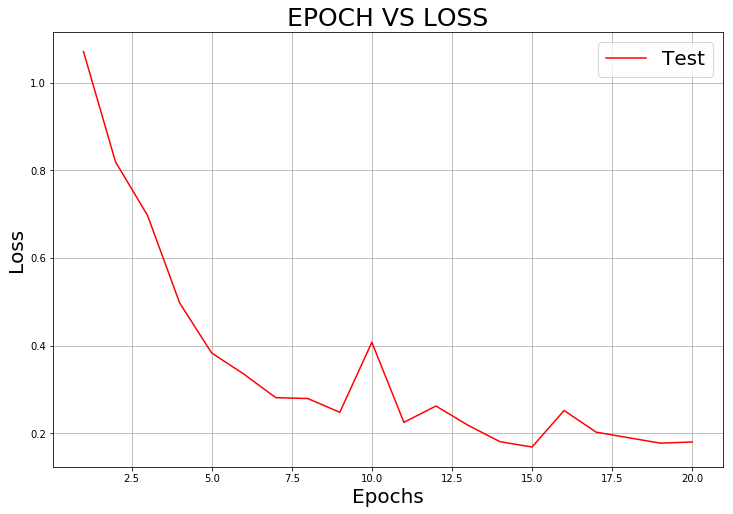

In [59]:
plotting(list(log_train["Epoch"]), list(log_train["Comb_Train_Loss"]), "EPOCH VS LOSS")

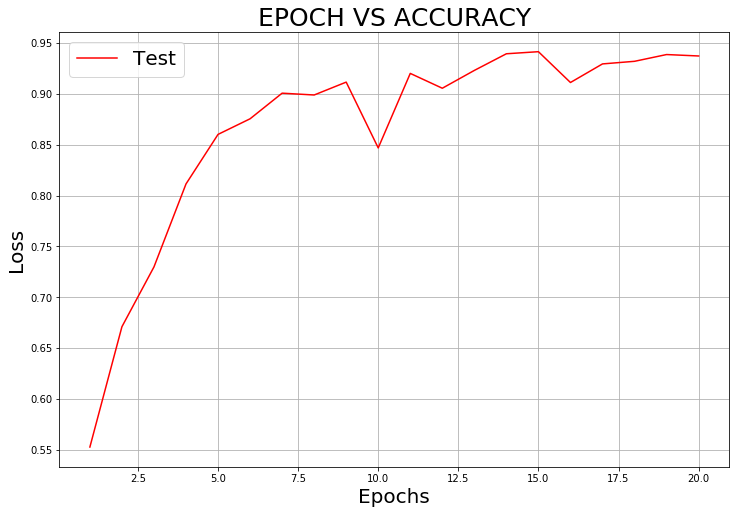

In [60]:
plotting(list(log_train["Epoch"]), list(log_train["Comb_Train_Accuracy"]), "EPOCH VS ACCURACY")


In [61]:
bottleneck_features.shape

(10, 10, 10, 512)

### Test

In [62]:
#model = load_model("./outputs_facedb/Model_Save/model.h5")
predicted_labels = []
true_labels = []
batch_size = 10
total_files = int(len(test_df) / batch_size) - 1 #here, I have added 2 because there are 30 files in Test_Humans
for i in range(1, total_files, 1):
    img_load = np.load("./outputs_facedb/Bottleneck_Features_test/bottleneck_{}.npy".format(i))
    img_label = np.load("./outputs_facedb/Bottleneck_Labels_test/bottleneck_labels_{}.npy".format(i))
    img_bundle = img_load.reshape(img_load.shape[0], img_load.shape[1]*img_load.shape[2]*img_load.shape[3])
    for j in range(img_bundle.shape[0]):
        img = img_bundle[j]
        img = img.reshape(1, img_bundle.shape[1])
        pred = model.predict(img)
        predicted_labels.append(pred[0].argmax())
        true_labels.append(img_label[j].argmax())
acc = accuracy_score(true_labels, predicted_labels)
print("Accuracy on Human Test Data = {}%".format(np.round(float(acc*100), 2)))

Accuracy on Human Test Data = 85.34%


In [63]:
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
    sns.set(font_scale=1.5)
    
    # confusionMatx = [[1, 2],
    #                  [3, 4]]
    # confusionMatx.T = [[1, 3],
    #                   [2, 4]]
    # confusionMatx.sum(axis = 1)  axis=0 corresponds to columns and axis=1 corresponds to rows in two diamensional array
    # confusionMatx.sum(axix =1) = [[3, 7]]
    # (confusionMatx.T)/(confusionMatx.sum(axis=1)) = [[1/3, 3/7]
    #                                                  [2/3, 4/7]]

    # (confusionMatx.T)/(confusionMatx.sum(axis=1)).T = [[1/3, 2/3]
    #                                                    [3/7, 4/7]]
    # sum of row elements = 1
    
    labels = ["NEUTRAL", "HAPPY", "SAD", "SURPRISE", "ANGRY", "DISGUST", "FEAR"]
    
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Precision Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Recall Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

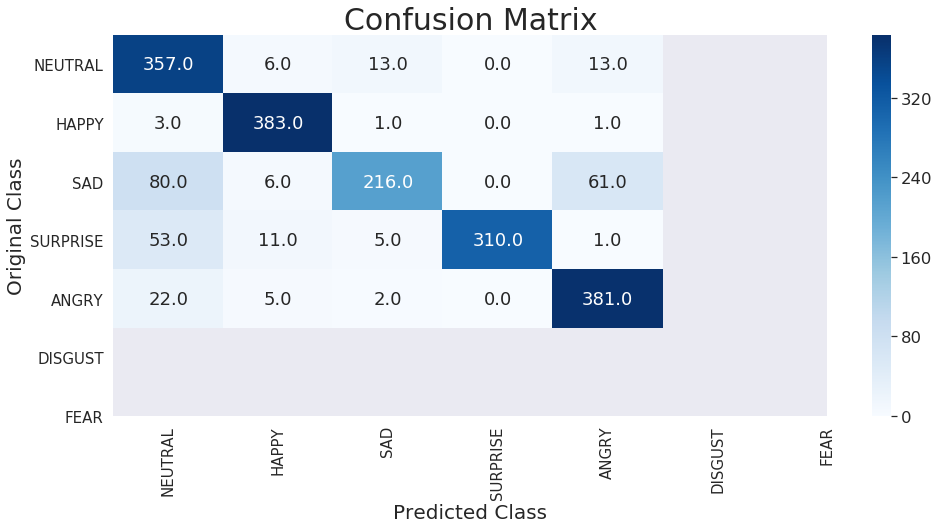

-----------------------------------------------------------------------------------------------------------------------------


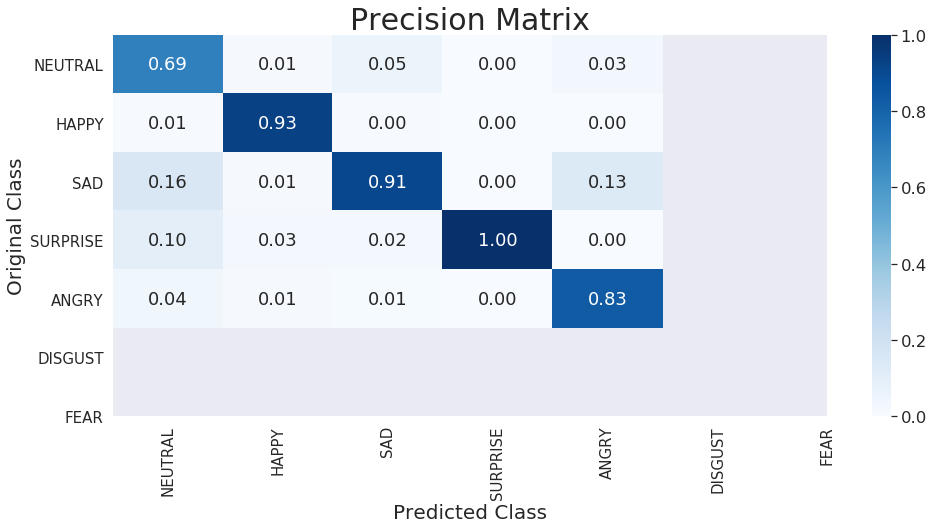

-----------------------------------------------------------------------------------------------------------------------------


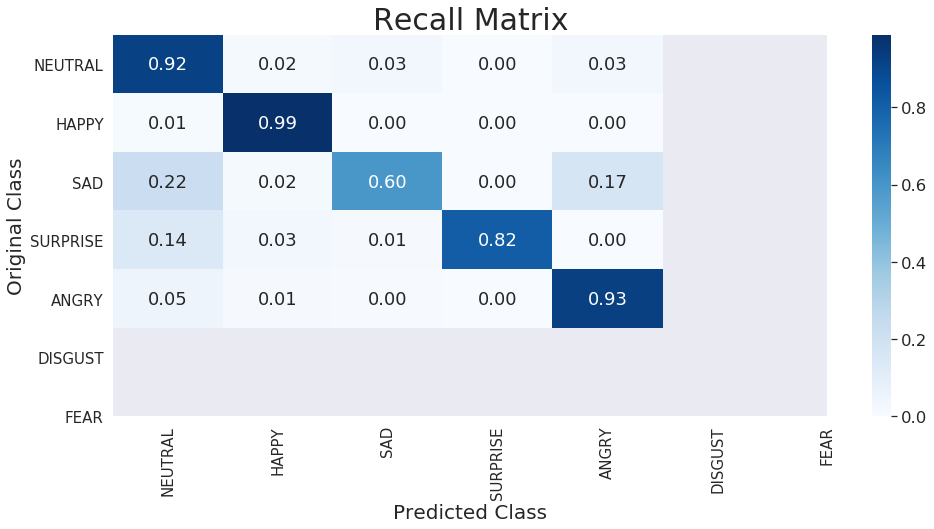

In [64]:
print_confusionMatrix(true_labels, predicted_labels)

In [65]:
# 0-neutral, 1-happy, 2-sad, 3-surprise, 4-angry, 5-disguest, 6-fear 

## Real world testing

In [66]:
EMOTION_DICT = {0:"neutral", 1:"happy", 2:"sad", 3:"surprise", 4:"angry"}#, 5:"disguest", 6:"fear"}
model_VGG = VGG16(weights='imagenet', include_top=False)
model_top = load_model("./outputs_facedb/Model_Save/model.h5")

In [67]:
def make_prediction(path):
    #converting image to gray scale and save it
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path, gray)
    
    #detect face in image, crop it then resize it then save it
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]
        cv2.imwrite(path, cv2.resize(face_clip, (350, 350)))
    if(len(faces)==0):
        cv2.imwrite(path, cv2.resize(img, (350, 350)))  #resizing image then saving it
    
    #read the processed image then make prediction and display the result
    read_image = cv2.imread(path)
    read_image = read_image.reshape(1, read_image.shape[0], read_image.shape[1], read_image.shape[2])
    read_image_final = read_image/255.0  #normalizing the image
    VGG_Pred = model_VGG.predict(read_image_final)  #creating bottleneck features of image using VGG-16.
    print(VGG_Pred.shape[1],VGG_Pred.shape[2],VGG_Pred.shape[3])
    VGG_Pred = VGG_Pred.reshape(1, VGG_Pred.shape[1]*VGG_Pred.shape[2]*VGG_Pred.shape[3])
    
    #VGG_Pred = VGG_Pred.reshape(1, 1*1*VGG_Pred.shape[3])
    
    top_pred = model_top.predict(VGG_Pred)  #making prediction from our own model.
    emotion_label = top_pred[0].argmax() 
    print("Predicted Expression Probabilities")
#     print("neutral: {}\nhappy: {}\nsad: {}\nsurprise: {}\nangry: {}\ndisguest: {}\nfear: {}\n\n".format(top_pred[0][0], top_pred[0][1], top_pred[0][2], top_pred[0][3], top_pred[0][4], top_pred[0][5], top_pred[0][6]))
#     print("Dominant Probability = "+str(EMOTION_DICT[emotion_label])+": "+str(max(top_pred[0])))

    print("neutral: {}\nhappy: {}\nsad: {}\nsurprise: {}\nangry: {}\n\n".format(top_pred[0][0], top_pred[0][1], top_pred[0][2], top_pred[0][3], top_pred[0][4]))
    print("Dominant Probability = "+str(EMOTION_DICT[emotion_label])+": "+str(max(top_pred[0])))
    
    return emotion_label

In [68]:
make_prediction('./test_images/6dfb5660c821203ebfc479951993a0a3.jpg')

10 10 512
Predicted Expression Probabilities
neutral: 4.630508101399755e-06
happy: 1.7423368262825534e-05
sad: 5.067023067795162e-08
surprise: 0.9999758005142212
angry: 2.141726554327761e-06


Dominant Probability = surprise: 0.9999758


3

## Realtime image prediction

In [69]:
new_test_df = pd.DataFrame()

for i in range(1,39):
    human_reaction = glob.glob("./test_images_all/*/*/*")
    tmp = pd.DataFrame({'location':human_reaction,
                        'labels':[emotion_label2(human_reaction[i].split('/')[-3]) for i in range(len(human_reaction))]},
                       index =range(len(human_reaction)) )
    new_test_df = new_test_df.append(tmp)
    
new_test_df['labels'] = new_test_df.labels.astype('int')
new_test_df.head()

,location,labels
0,./test_images_all/anger/human_angry_faces/huma...,4
1,./test_images_all/anger/human_angry_faces/huma...,4
2,./test_images_all/anger/human_angry_faces/huma...,4
3,./test_images_all/anger/human_angry_faces/huma...,4
4,./test_images_all/anger/human_angry_faces/huma...,4


In [70]:
pred_labels = []
for i in range(len(new_test_df)):
    path = new_test_df.location.iloc[i]
    pred_labels.append(make_prediction(path)) 
    
new_test_df['pred_labels'] = pred_labels

error = new_test_df.labels==new_test_df.pred_labels
new_test_df['evaluation'] = error
new_test_df.evaluation.value_counts()

10 10 512
Predicted Expression Probabilities
neutral: 0.09659180790185928
happy: 0.7283567190170288
sad: 0.03731928765773773
surprise: 0.002412597881630063
angry: 0.13531963527202606


Dominant Probability = happy: 0.7283567
10 10 512
Predicted Expression Probabilities
neutral: 0.06196824461221695
happy: 0.06746752560138702
sad: 0.19266840815544128
surprise: 0.0017942998092621565
angry: 0.6761015057563782


Dominant Probability = angry: 0.6761015
10 10 512
Predicted Expression Probabilities
neutral: 0.00015845318557694554
happy: 2.199030717520145e-07
sad: 0.0001891995925689116
surprise: 9.50634628793523e-08
angry: 0.9996520280838013


Dominant Probability = angry: 0.999652
10 10 512
Predicted Expression Probabilities
neutral: 0.8959125280380249
happy: 0.0033025292214006186
sad: 0.06822580844163895
surprise: 0.016324026510119438
angry: 0.01623520627617836


Dominant Probability = neutral: 0.8959125
10 10 512
Predicted Expression Probabilities
neutral: 0.07089453190565109
happy: 1.098146

10 10 512
Predicted Expression Probabilities
neutral: 7.829776222934015e-06
happy: 4.944063675793586e-06
sad: 9.749380296852905e-06
surprise: 0.9999774694442749
angry: 1.1984075953819229e-09


Dominant Probability = surprise: 0.99997747
10 10 512
Predicted Expression Probabilities
neutral: 2.3396913746698278e-12
happy: 4.32492486268643e-09
sad: 1.977910870298253e-15
surprise: 1.0
angry: 6.921287544828236e-13


Dominant Probability = surprise: 1.0
10 10 512
Predicted Expression Probabilities
neutral: 0.042477626353502274
happy: 0.017361469566822052
sad: 0.002897537313401699
surprise: 0.9275524616241455
angry: 0.009710913524031639


Dominant Probability = surprise: 0.92755246
10 10 512
Predicted Expression Probabilities
neutral: 0.4780912399291992
happy: 0.20865975320339203
sad: 0.06036830693483353
surprise: 0.008488115854561329
angry: 0.24439258873462677


Dominant Probability = neutral: 0.47809124
10 10 512
Predicted Expression Probabilities
neutral: 3.999042746727355e-06
happy: 0.9999

10 10 512
Predicted Expression Probabilities
neutral: 0.000922679144423455
happy: 2.7250616767560132e-05
sad: 0.00027568251243792474
surprise: 3.0579724352719495e-07
angry: 0.9987741112709045


Dominant Probability = angry: 0.9987741
10 10 512
Predicted Expression Probabilities
neutral: 6.217220516191446e-09
happy: 0.9999997615814209
sad: 4.1386061244708117e-10
surprise: 1.1005261372348807e-12
angry: 1.987266387004638e-07


Dominant Probability = happy: 0.99999976
10 10 512
Predicted Expression Probabilities
neutral: 4.630508101399755e-06
happy: 1.7423368262825534e-05
sad: 5.067023067795162e-08
surprise: 0.9999758005142212
angry: 2.141726554327761e-06


Dominant Probability = surprise: 0.9999758
10 10 512
Predicted Expression Probabilities
neutral: 0.5416132807731628
happy: 0.30376699566841125
sad: 0.041967589408159256
surprise: 0.06168954819440842
angry: 0.05096258595585823


Dominant Probability = neutral: 0.5416133
10 10 512
Predicted Expression Probabilities
neutral: 0.986497700214

10 10 512
Predicted Expression Probabilities
neutral: 0.12785521149635315
happy: 0.01632464863359928
sad: 0.34138360619544983
surprise: 0.01040178444236517
angry: 0.5040347576141357


Dominant Probability = angry: 0.50403476
10 10 512
Predicted Expression Probabilities
neutral: 0.4844880998134613
happy: 0.017210209742188454
sad: 0.00436645420268178
surprise: 0.49262535572052
angry: 0.0013097577029839158


Dominant Probability = surprise: 0.49262536
10 10 512
Predicted Expression Probabilities
neutral: 0.00220974488183856
happy: 0.09468233585357666
sad: 0.0017811350990086794
surprise: 1.4199767974787392e-06
angry: 0.9013253450393677


Dominant Probability = angry: 0.90132535
10 10 512
Predicted Expression Probabilities
neutral: 0.5451885461807251
happy: 0.0034346820320934057
sad: 0.4319113492965698
surprise: 0.0109958341345191
angry: 0.00846958626061678


Dominant Probability = neutral: 0.54518855
10 10 512
Predicted Expression Probabilities
neutral: 0.515373945236206
happy: 0.019835630

10 10 512
Predicted Expression Probabilities
neutral: 0.9832361340522766
happy: 0.00010163820843445137
sad: 0.005867515690624714
surprise: 0.004388773813843727
angry: 0.006406037136912346


Dominant Probability = neutral: 0.98323613
10 10 512
Predicted Expression Probabilities
neutral: 0.893193781375885
happy: 2.025698086072225e-05
sad: 0.00024542302708141506
surprise: 0.10652327537536621
angry: 1.7289508832618594e-05


Dominant Probability = neutral: 0.8931938
10 10 512
Predicted Expression Probabilities
neutral: 0.9141446352005005
happy: 0.0061026401817798615
sad: 0.04836209863424301
surprise: 0.018764397129416466
angry: 0.012626111507415771


Dominant Probability = neutral: 0.91414464
10 10 512
Predicted Expression Probabilities
neutral: 0.022339824587106705
happy: 0.0004908462287858129
sad: 0.10852961987257004
surprise: 0.0009120870381593704
angry: 0.8677276968955994


Dominant Probability = angry: 0.8677277
10 10 512
Predicted Expression Probabilities
neutral: 0.9946348667144775
h

10 10 512
Predicted Expression Probabilities
neutral: 4.386287764646113e-05
happy: 0.014751824550330639
sad: 2.4278410393208105e-08
surprise: 0.9852043390274048
angry: 5.6288371297341655e-08


Dominant Probability = surprise: 0.98520434
10 10 512
Predicted Expression Probabilities
neutral: 0.0908614993095398
happy: 0.0037573562003672123
sad: 0.07713588327169418
surprise: 0.0031449112575501204
angry: 0.8251003623008728


Dominant Probability = angry: 0.82510036
10 10 512
Predicted Expression Probabilities
neutral: 0.01946137845516205
happy: 0.8204516768455505
sad: 0.01004188135266304
surprise: 0.00017703713092487305
angry: 0.14986805617809296


Dominant Probability = happy: 0.8204517
10 10 512
Predicted Expression Probabilities
neutral: 0.9318063259124756
happy: 0.0401509627699852
sad: 0.004218545742332935
surprise: 0.0002924890723079443
angry: 0.023531606420874596


Dominant Probability = neutral: 0.9318063
10 10 512
Predicted Expression Probabilities
neutral: 0.9999234676361084
happy:

10 10 512
Predicted Expression Probabilities
neutral: 0.06819973140954971
happy: 0.12320594489574432
sad: 0.06420604139566422
surprise: 0.19801542162895203
angry: 0.5463727712631226


Dominant Probability = angry: 0.5463728
10 10 512
Predicted Expression Probabilities
neutral: 3.085531545821141e-07
happy: 0.999991774559021
sad: 4.6201407144508266e-08
surprise: 1.5754940407841644e-10
angry: 7.836312761355657e-06


Dominant Probability = happy: 0.9999918
10 10 512
Predicted Expression Probabilities
neutral: 0.0002187944483011961
happy: 0.9989608526229858
sad: 8.980504162536818e-07
surprise: 0.0008169021457433701
angry: 2.473798076607636e-06


Dominant Probability = happy: 0.99896085
10 10 512
Predicted Expression Probabilities
neutral: 0.0003769948671106249
happy: 3.3548578358022496e-05
sad: 0.0003974476712755859
surprise: 5.387010446611384e-07
angry: 0.9991914629936218


Dominant Probability = angry: 0.99919146
10 10 512
Predicted Expression Probabilities
neutral: 7.353129149123561e-06


10 10 512
Predicted Expression Probabilities
neutral: 0.001166516332887113
happy: 0.00010325042967451736
sad: 0.001690845238044858
surprise: 5.564428647630848e-06
angry: 0.9970338344573975


Dominant Probability = angry: 0.99703383
10 10 512
Predicted Expression Probabilities
neutral: 0.2433747947216034
happy: 0.33588504791259766
sad: 0.01011471264064312
surprise: 0.053012315183877945
angry: 0.35761314630508423


Dominant Probability = angry: 0.35761315
10 10 512
Predicted Expression Probabilities
neutral: 1.5737849707875284e-06
happy: 0.9999934434890747
sad: 1.09431361750012e-07
surprise: 1.9441888099436255e-09
angry: 4.912446001981152e-06


Dominant Probability = happy: 0.99999344
10 10 512
Predicted Expression Probabilities
neutral: 0.21374444663524628
happy: 0.06775075942277908
sad: 0.18515482544898987
surprise: 0.025173133239150047
angry: 0.5081768035888672


Dominant Probability = angry: 0.5081768
10 10 512
Predicted Expression Probabilities
neutral: 1.6880725706158728e-09
happy:

10 10 512
Predicted Expression Probabilities
neutral: 0.06196824461221695
happy: 0.06746752560138702
sad: 0.19266840815544128
surprise: 0.0017942998092621565
angry: 0.6761015057563782


Dominant Probability = angry: 0.6761015
10 10 512
Predicted Expression Probabilities
neutral: 0.00015845318557694554
happy: 2.199030717520145e-07
sad: 0.0001891995925689116
surprise: 9.50634628793523e-08
angry: 0.9996520280838013


Dominant Probability = angry: 0.999652
10 10 512
Predicted Expression Probabilities
neutral: 0.8959125280380249
happy: 0.0033025292214006186
sad: 0.06822580844163895
surprise: 0.016324026510119438
angry: 0.01623520627617836


Dominant Probability = neutral: 0.8959125
10 10 512
Predicted Expression Probabilities
neutral: 0.07089453190565109
happy: 1.0981469131365884e-05
sad: 0.02920500375330448
surprise: 4.7223929868778214e-05
angry: 0.8998422026634216


Dominant Probability = angry: 0.8998422
10 10 512
Predicted Expression Probabilities
neutral: 0.3271302878856659
happy: 0.18

10 10 512
Predicted Expression Probabilities
neutral: 2.3396913746698278e-12
happy: 4.32492486268643e-09
sad: 1.977910870298253e-15
surprise: 1.0
angry: 6.921287544828236e-13


Dominant Probability = surprise: 1.0
10 10 512
Predicted Expression Probabilities
neutral: 0.042477626353502274
happy: 0.017361469566822052
sad: 0.002897537313401699
surprise: 0.9275524616241455
angry: 0.009710913524031639


Dominant Probability = surprise: 0.92755246
10 10 512
Predicted Expression Probabilities
neutral: 0.4780912399291992
happy: 0.20865975320339203
sad: 0.06036830693483353
surprise: 0.008488115854561329
angry: 0.24439258873462677


Dominant Probability = neutral: 0.47809124
10 10 512
Predicted Expression Probabilities
neutral: 3.999042746727355e-06
happy: 0.9999821186065674
sad: 5.309405537445855e-07
surprise: 1.1099720254037493e-08
angry: 1.3372887224250007e-05


Dominant Probability = happy: 0.9999821
10 10 512
Predicted Expression Probabilities
neutral: 0.09659180790185928
happy: 0.728356719

10 10 512
Predicted Expression Probabilities
neutral: 6.217220516191446e-09
happy: 0.9999997615814209
sad: 4.1386061244708117e-10
surprise: 1.1005261372348807e-12
angry: 1.987266387004638e-07


Dominant Probability = happy: 0.99999976
10 10 512
Predicted Expression Probabilities
neutral: 4.630508101399755e-06
happy: 1.7423368262825534e-05
sad: 5.067023067795162e-08
surprise: 0.9999758005142212
angry: 2.141726554327761e-06


Dominant Probability = surprise: 0.9999758
10 10 512
Predicted Expression Probabilities
neutral: 0.5416132807731628
happy: 0.30376699566841125
sad: 0.041967589408159256
surprise: 0.06168954819440842
angry: 0.05096258595585823


Dominant Probability = neutral: 0.5416133
10 10 512
Predicted Expression Probabilities
neutral: 0.986497700214386
happy: 0.000278572115348652
sad: 0.00632221857085824
surprise: 0.004069949500262737
angry: 0.002831413410604


Dominant Probability = neutral: 0.9864977
10 10 512
Predicted Expression Probabilities
neutral: 7.829776222934015e-06
h

10 10 512
Predicted Expression Probabilities
neutral: 0.4844880998134613
happy: 0.017210209742188454
sad: 0.00436645420268178
surprise: 0.49262535572052
angry: 0.0013097577029839158


Dominant Probability = surprise: 0.49262536
10 10 512
Predicted Expression Probabilities
neutral: 0.00220974488183856
happy: 0.09468233585357666
sad: 0.0017811350990086794
surprise: 1.4199767974787392e-06
angry: 0.9013253450393677


Dominant Probability = angry: 0.90132535
10 10 512
Predicted Expression Probabilities
neutral: 0.5451885461807251
happy: 0.0034346820320934057
sad: 0.4319113492965698
surprise: 0.0109958341345191
angry: 0.00846958626061678


Dominant Probability = neutral: 0.54518855
10 10 512
Predicted Expression Probabilities
neutral: 0.515373945236206
happy: 0.01983563043177128
sad: 0.12577399611473083
surprise: 0.039354532957077026
angry: 0.2996618449687958


Dominant Probability = neutral: 0.51537395
10 10 512
Predicted Expression Probabilities
neutral: 0.000922679144423455
happy: 2.72506

10 10 512
Predicted Expression Probabilities
neutral: 0.893193781375885
happy: 2.025698086072225e-05
sad: 0.00024542302708141506
surprise: 0.10652327537536621
angry: 1.7289508832618594e-05


Dominant Probability = neutral: 0.8931938
10 10 512
Predicted Expression Probabilities
neutral: 0.9141446352005005
happy: 0.0061026401817798615
sad: 0.04836209863424301
surprise: 0.018764397129416466
angry: 0.012626111507415771


Dominant Probability = neutral: 0.91414464
10 10 512
Predicted Expression Probabilities
neutral: 0.022339824587106705
happy: 0.0004908462287858129
sad: 0.10852961987257004
surprise: 0.0009120870381593704
angry: 0.8677276968955994


Dominant Probability = angry: 0.8677277
10 10 512
Predicted Expression Probabilities
neutral: 0.9946348667144775
happy: 0.00021213207219261676
sad: 0.00229352293536067
surprise: 0.002201474504545331
angry: 0.0006580397603102028


Dominant Probability = neutral: 0.99463487
10 10 512
Predicted Expression Probabilities
neutral: 0.12785521149635315


10 10 512
Predicted Expression Probabilities
neutral: 0.0908614993095398
happy: 0.0037573562003672123
sad: 0.07713588327169418
surprise: 0.0031449112575501204
angry: 0.8251003623008728


Dominant Probability = angry: 0.82510036
10 10 512
Predicted Expression Probabilities
neutral: 0.01946137845516205
happy: 0.8204516768455505
sad: 0.01004188135266304
surprise: 0.00017703713092487305
angry: 0.14986805617809296


Dominant Probability = happy: 0.8204517
10 10 512
Predicted Expression Probabilities
neutral: 0.9318063259124756
happy: 0.0401509627699852
sad: 0.004218545742332935
surprise: 0.0002924890723079443
angry: 0.023531606420874596


Dominant Probability = neutral: 0.9318063
10 10 512
Predicted Expression Probabilities
neutral: 0.9999234676361084
happy: 1.8964762205087027e-07
sad: 1.1941618140554056e-05
surprise: 6.405724707292393e-05
angry: 3.3978167834902706e-07


Dominant Probability = neutral: 0.99992347
10 10 512
Predicted Expression Probabilities
neutral: 0.9832361340522766
happy

10 10 512
Predicted Expression Probabilities
neutral: 3.085531545821141e-07
happy: 0.999991774559021
sad: 4.6201407144508266e-08
surprise: 1.5754940407841644e-10
angry: 7.836312761355657e-06


Dominant Probability = happy: 0.9999918
10 10 512
Predicted Expression Probabilities
neutral: 0.0002187944483011961
happy: 0.9989608526229858
sad: 8.980504162536818e-07
surprise: 0.0008169021457433701
angry: 2.473798076607636e-06


Dominant Probability = happy: 0.99896085
10 10 512
Predicted Expression Probabilities
neutral: 0.0003769948671106249
happy: 3.3548578358022496e-05
sad: 0.0003974476712755859
surprise: 5.387010446611384e-07
angry: 0.9991914629936218


Dominant Probability = angry: 0.99919146
10 10 512
Predicted Expression Probabilities
neutral: 7.353129149123561e-06
happy: 0.999987006187439
sad: 6.366142315528123e-07
surprise: 1.0560499674738821e-07
angry: 4.865176379098557e-06


Dominant Probability = happy: 0.999987
10 10 512
Predicted Expression Probabilities
neutral: 4.3862877646461

10 10 512
Predicted Expression Probabilities
neutral: 0.2433747947216034
happy: 0.33588504791259766
sad: 0.01011471264064312
surprise: 0.053012315183877945
angry: 0.35761314630508423


Dominant Probability = angry: 0.35761315
10 10 512
Predicted Expression Probabilities
neutral: 1.5737849707875284e-06
happy: 0.9999934434890747
sad: 1.09431361750012e-07
surprise: 1.9441888099436255e-09
angry: 4.912446001981152e-06


Dominant Probability = happy: 0.99999344
10 10 512
Predicted Expression Probabilities
neutral: 0.21374444663524628
happy: 0.06775075942277908
sad: 0.18515482544898987
surprise: 0.025173133239150047
angry: 0.5081768035888672


Dominant Probability = angry: 0.5081768
10 10 512
Predicted Expression Probabilities
neutral: 1.6880725706158728e-09
happy: 1.0
sad: 1.1825936063747378e-10
surprise: 8.31310497870219e-13
angry: 1.0796995297823742e-08


Dominant Probability = happy: 1.0
10 10 512
Predicted Expression Probabilities
neutral: 0.06819973140954971
happy: 0.12320594489574432
s

10 10 512
Predicted Expression Probabilities
neutral: 0.00015845318557694554
happy: 2.199030717520145e-07
sad: 0.0001891995925689116
surprise: 9.50634628793523e-08
angry: 0.9996520280838013


Dominant Probability = angry: 0.999652
10 10 512
Predicted Expression Probabilities
neutral: 0.8959125280380249
happy: 0.0033025292214006186
sad: 0.06822580844163895
surprise: 0.016324026510119438
angry: 0.01623520627617836


Dominant Probability = neutral: 0.8959125
10 10 512
Predicted Expression Probabilities
neutral: 0.07089453190565109
happy: 1.0981469131365884e-05
sad: 0.02920500375330448
surprise: 4.7223929868778214e-05
angry: 0.8998422026634216


Dominant Probability = angry: 0.8998422
10 10 512
Predicted Expression Probabilities
neutral: 0.3271302878856659
happy: 0.1875200718641281
sad: 0.053635865449905396
surprise: 0.00274332775734365
angry: 0.4289705455303192


Dominant Probability = angry: 0.42897055
10 10 512
Predicted Expression Probabilities
neutral: 0.001166516332887113
happy: 0.00

10 10 512
Predicted Expression Probabilities
neutral: 0.042477626353502274
happy: 0.017361469566822052
sad: 0.002897537313401699
surprise: 0.9275524616241455
angry: 0.009710913524031639


Dominant Probability = surprise: 0.92755246
10 10 512
Predicted Expression Probabilities
neutral: 0.4780912399291992
happy: 0.20865975320339203
sad: 0.06036830693483353
surprise: 0.008488115854561329
angry: 0.24439258873462677


Dominant Probability = neutral: 0.47809124
10 10 512
Predicted Expression Probabilities
neutral: 3.999042746727355e-06
happy: 0.9999821186065674
sad: 5.309405537445855e-07
surprise: 1.1099720254037493e-08
angry: 1.3372887224250007e-05


Dominant Probability = happy: 0.9999821
10 10 512
Predicted Expression Probabilities
neutral: 0.09659180790185928
happy: 0.7283567190170288
sad: 0.03731928765773773
surprise: 0.002412597881630063
angry: 0.13531963527202606


Dominant Probability = happy: 0.7283567
10 10 512
Predicted Expression Probabilities
neutral: 0.06196824461221695
happy: 

10 10 512
Predicted Expression Probabilities
neutral: 4.630508101399755e-06
happy: 1.7423368262825534e-05
sad: 5.067023067795162e-08
surprise: 0.9999758005142212
angry: 2.141726554327761e-06


Dominant Probability = surprise: 0.9999758
10 10 512
Predicted Expression Probabilities
neutral: 0.5416132807731628
happy: 0.30376699566841125
sad: 0.041967589408159256
surprise: 0.06168954819440842
angry: 0.05096258595585823


Dominant Probability = neutral: 0.5416133
10 10 512
Predicted Expression Probabilities
neutral: 0.986497700214386
happy: 0.000278572115348652
sad: 0.00632221857085824
surprise: 0.004069949500262737
angry: 0.002831413410604


Dominant Probability = neutral: 0.9864977
10 10 512
Predicted Expression Probabilities
neutral: 7.829776222934015e-06
happy: 4.944063675793586e-06
sad: 9.749380296852905e-06
surprise: 0.9999774694442749
angry: 1.1984075953819229e-09


Dominant Probability = surprise: 0.99997747
10 10 512
Predicted Expression Probabilities
neutral: 2.3396913746698278e-1

10 10 512
Predicted Expression Probabilities
neutral: 0.00220974488183856
happy: 0.09468233585357666
sad: 0.0017811350990086794
surprise: 1.4199767974787392e-06
angry: 0.9013253450393677


Dominant Probability = angry: 0.90132535
10 10 512
Predicted Expression Probabilities
neutral: 0.5451885461807251
happy: 0.0034346820320934057
sad: 0.4319113492965698
surprise: 0.0109958341345191
angry: 0.00846958626061678


Dominant Probability = neutral: 0.54518855
10 10 512
Predicted Expression Probabilities
neutral: 0.515373945236206
happy: 0.01983563043177128
sad: 0.12577399611473083
surprise: 0.039354532957077026
angry: 0.2996618449687958


Dominant Probability = neutral: 0.51537395
10 10 512
Predicted Expression Probabilities
neutral: 0.000922679144423455
happy: 2.7250616767560132e-05
sad: 0.00027568251243792474
surprise: 3.0579724352719495e-07
angry: 0.9987741112709045


Dominant Probability = angry: 0.9987741
10 10 512
Predicted Expression Probabilities
neutral: 6.217220516191446e-09
happy: 

10 10 512
Predicted Expression Probabilities
neutral: 0.9141446352005005
happy: 0.0061026401817798615
sad: 0.04836209863424301
surprise: 0.018764397129416466
angry: 0.012626111507415771


Dominant Probability = neutral: 0.91414464
10 10 512
Predicted Expression Probabilities
neutral: 0.022339824587106705
happy: 0.0004908462287858129
sad: 0.10852961987257004
surprise: 0.0009120870381593704
angry: 0.8677276968955994


Dominant Probability = angry: 0.8677277
10 10 512
Predicted Expression Probabilities
neutral: 0.9946348667144775
happy: 0.00021213207219261676
sad: 0.00229352293536067
surprise: 0.002201474504545331
angry: 0.0006580397603102028


Dominant Probability = neutral: 0.99463487
10 10 512
Predicted Expression Probabilities
neutral: 0.12785521149635315
happy: 0.01632464863359928
sad: 0.34138360619544983
surprise: 0.01040178444236517
angry: 0.5040347576141357


Dominant Probability = angry: 0.50403476
10 10 512
Predicted Expression Probabilities
neutral: 0.4844880998134613
happy: 0.

10 10 512
Predicted Expression Probabilities
neutral: 0.01946137845516205
happy: 0.8204516768455505
sad: 0.01004188135266304
surprise: 0.00017703713092487305
angry: 0.14986805617809296


Dominant Probability = happy: 0.8204517
10 10 512
Predicted Expression Probabilities
neutral: 0.9318063259124756
happy: 0.0401509627699852
sad: 0.004218545742332935
surprise: 0.0002924890723079443
angry: 0.023531606420874596


Dominant Probability = neutral: 0.9318063
10 10 512
Predicted Expression Probabilities
neutral: 0.9999234676361084
happy: 1.8964762205087027e-07
sad: 1.1941618140554056e-05
surprise: 6.405724707292393e-05
angry: 3.3978167834902706e-07


Dominant Probability = neutral: 0.99992347
10 10 512
Predicted Expression Probabilities
neutral: 0.9832361340522766
happy: 0.00010163820843445137
sad: 0.005867515690624714
surprise: 0.004388773813843727
angry: 0.006406037136912346


Dominant Probability = neutral: 0.98323613
10 10 512
Predicted Expression Probabilities
neutral: 0.893193781375885
h

10 10 512
Predicted Expression Probabilities
neutral: 0.0002187944483011961
happy: 0.9989608526229858
sad: 8.980504162536818e-07
surprise: 0.0008169021457433701
angry: 2.473798076607636e-06


Dominant Probability = happy: 0.99896085
10 10 512
Predicted Expression Probabilities
neutral: 0.0003769948671106249
happy: 3.3548578358022496e-05
sad: 0.0003974476712755859
surprise: 5.387010446611384e-07
angry: 0.9991914629936218


Dominant Probability = angry: 0.99919146
10 10 512
Predicted Expression Probabilities
neutral: 7.353129149123561e-06
happy: 0.999987006187439
sad: 6.366142315528123e-07
surprise: 1.0560499674738821e-07
angry: 4.865176379098557e-06


Dominant Probability = happy: 0.999987
10 10 512
Predicted Expression Probabilities
neutral: 4.386287764646113e-05
happy: 0.014751824550330639
sad: 2.4278410393208105e-08
surprise: 0.9852043390274048
angry: 5.6288371297341655e-08


Dominant Probability = surprise: 0.98520434
10 10 512
Predicted Expression Probabilities
neutral: 0.090861499

10 10 512
Predicted Expression Probabilities
neutral: 1.5737849707875284e-06
happy: 0.9999934434890747
sad: 1.09431361750012e-07
surprise: 1.9441888099436255e-09
angry: 4.912446001981152e-06


Dominant Probability = happy: 0.99999344
10 10 512
Predicted Expression Probabilities
neutral: 0.21374444663524628
happy: 0.06775075942277908
sad: 0.18515482544898987
surprise: 0.025173133239150047
angry: 0.5081768035888672


Dominant Probability = angry: 0.5081768
10 10 512
Predicted Expression Probabilities
neutral: 1.6880725706158728e-09
happy: 1.0
sad: 1.1825936063747378e-10
surprise: 8.31310497870219e-13
angry: 1.0796995297823742e-08


Dominant Probability = happy: 1.0
10 10 512
Predicted Expression Probabilities
neutral: 0.06819973140954971
happy: 0.12320594489574432
sad: 0.06420604139566422
surprise: 0.19801542162895203
angry: 0.5463727712631226


Dominant Probability = angry: 0.5463728
10 10 512
Predicted Expression Probabilities
neutral: 3.085531545821141e-07
happy: 0.999991774559021
sad

10 10 512
Predicted Expression Probabilities
neutral: 0.8959125280380249
happy: 0.0033025292214006186
sad: 0.06822580844163895
surprise: 0.016324026510119438
angry: 0.01623520627617836


Dominant Probability = neutral: 0.8959125
10 10 512
Predicted Expression Probabilities
neutral: 0.07089453190565109
happy: 1.0981469131365884e-05
sad: 0.02920500375330448
surprise: 4.7223929868778214e-05
angry: 0.8998422026634216


Dominant Probability = angry: 0.8998422
10 10 512
Predicted Expression Probabilities
neutral: 0.3271302878856659
happy: 0.1875200718641281
sad: 0.053635865449905396
surprise: 0.00274332775734365
angry: 0.4289705455303192


Dominant Probability = angry: 0.42897055
10 10 512
Predicted Expression Probabilities
neutral: 0.001166516332887113
happy: 0.00010325042967451736
sad: 0.001690845238044858
surprise: 5.564428647630848e-06
angry: 0.9970338344573975


Dominant Probability = angry: 0.99703383
10 10 512
Predicted Expression Probabilities
neutral: 0.2433747947216034
happy: 0.335

10 10 512
Predicted Expression Probabilities
neutral: 0.4780912399291992
happy: 0.20865975320339203
sad: 0.06036830693483353
surprise: 0.008488115854561329
angry: 0.24439258873462677


Dominant Probability = neutral: 0.47809124
10 10 512
Predicted Expression Probabilities
neutral: 3.999042746727355e-06
happy: 0.9999821186065674
sad: 5.309405537445855e-07
surprise: 1.1099720254037493e-08
angry: 1.3372887224250007e-05


Dominant Probability = happy: 0.9999821
10 10 512
Predicted Expression Probabilities
neutral: 0.09659180790185928
happy: 0.7283567190170288
sad: 0.03731928765773773
surprise: 0.002412597881630063
angry: 0.13531963527202606


Dominant Probability = happy: 0.7283567
10 10 512
Predicted Expression Probabilities
neutral: 0.06196824461221695
happy: 0.06746752560138702
sad: 0.19266840815544128
surprise: 0.0017942998092621565
angry: 0.6761015057563782


Dominant Probability = angry: 0.6761015
10 10 512
Predicted Expression Probabilities
neutral: 0.00015845318557694554
happy: 2.1

10 10 512
Predicted Expression Probabilities
neutral: 0.5416132807731628
happy: 0.30376699566841125
sad: 0.041967589408159256
surprise: 0.06168954819440842
angry: 0.05096258595585823


Dominant Probability = neutral: 0.5416133
10 10 512
Predicted Expression Probabilities
neutral: 0.986497700214386
happy: 0.000278572115348652
sad: 0.00632221857085824
surprise: 0.004069949500262737
angry: 0.002831413410604


Dominant Probability = neutral: 0.9864977
10 10 512
Predicted Expression Probabilities
neutral: 7.829776222934015e-06
happy: 4.944063675793586e-06
sad: 9.749380296852905e-06
surprise: 0.9999774694442749
angry: 1.1984075953819229e-09


Dominant Probability = surprise: 0.99997747
10 10 512
Predicted Expression Probabilities
neutral: 2.3396913746698278e-12
happy: 4.32492486268643e-09
sad: 1.977910870298253e-15
surprise: 1.0
angry: 6.921287544828236e-13


Dominant Probability = surprise: 1.0
10 10 512
Predicted Expression Probabilities
neutral: 0.042477626353502274
happy: 0.0173614695668

10 10 512
Predicted Expression Probabilities
neutral: 0.5451885461807251
happy: 0.0034346820320934057
sad: 0.4319113492965698
surprise: 0.0109958341345191
angry: 0.00846958626061678


Dominant Probability = neutral: 0.54518855
10 10 512
Predicted Expression Probabilities
neutral: 0.515373945236206
happy: 0.01983563043177128
sad: 0.12577399611473083
surprise: 0.039354532957077026
angry: 0.2996618449687958


Dominant Probability = neutral: 0.51537395
10 10 512
Predicted Expression Probabilities
neutral: 0.000922679144423455
happy: 2.7250616767560132e-05
sad: 0.00027568251243792474
surprise: 3.0579724352719495e-07
angry: 0.9987741112709045


Dominant Probability = angry: 0.9987741
10 10 512
Predicted Expression Probabilities
neutral: 6.217220516191446e-09
happy: 0.9999997615814209
sad: 4.1386061244708117e-10
surprise: 1.1005261372348807e-12
angry: 1.987266387004638e-07


Dominant Probability = happy: 0.99999976
10 10 512
Predicted Expression Probabilities
neutral: 4.630508101399755e-06
ha

10 10 512
Predicted Expression Probabilities
neutral: 0.022339824587106705
happy: 0.0004908462287858129
sad: 0.10852961987257004
surprise: 0.0009120870381593704
angry: 0.8677276968955994


Dominant Probability = angry: 0.8677277
10 10 512
Predicted Expression Probabilities
neutral: 0.9946348667144775
happy: 0.00021213207219261676
sad: 0.00229352293536067
surprise: 0.002201474504545331
angry: 0.0006580397603102028


Dominant Probability = neutral: 0.99463487
10 10 512
Predicted Expression Probabilities
neutral: 0.12785521149635315
happy: 0.01632464863359928
sad: 0.34138360619544983
surprise: 0.01040178444236517
angry: 0.5040347576141357


Dominant Probability = angry: 0.50403476
10 10 512
Predicted Expression Probabilities
neutral: 0.4844880998134613
happy: 0.017210209742188454
sad: 0.00436645420268178
surprise: 0.49262535572052
angry: 0.0013097577029839158


Dominant Probability = surprise: 0.49262536
10 10 512
Predicted Expression Probabilities
neutral: 0.00220974488183856
happy: 0.09

10 10 512
Predicted Expression Probabilities
neutral: 0.9318063259124756
happy: 0.0401509627699852
sad: 0.004218545742332935
surprise: 0.0002924890723079443
angry: 0.023531606420874596


Dominant Probability = neutral: 0.9318063
10 10 512
Predicted Expression Probabilities
neutral: 0.9999234676361084
happy: 1.8964762205087027e-07
sad: 1.1941618140554056e-05
surprise: 6.405724707292393e-05
angry: 3.3978167834902706e-07


Dominant Probability = neutral: 0.99992347
10 10 512
Predicted Expression Probabilities
neutral: 0.9832361340522766
happy: 0.00010163820843445137
sad: 0.005867515690624714
surprise: 0.004388773813843727
angry: 0.006406037136912346


Dominant Probability = neutral: 0.98323613
10 10 512
Predicted Expression Probabilities
neutral: 0.893193781375885
happy: 2.025698086072225e-05
sad: 0.00024542302708141506
surprise: 0.10652327537536621
angry: 1.7289508832618594e-05


Dominant Probability = neutral: 0.8931938
10 10 512
Predicted Expression Probabilities
neutral: 0.91414463520

10 10 512
Predicted Expression Probabilities
neutral: 0.0003769948671106249
happy: 3.3548578358022496e-05
sad: 0.0003974476712755859
surprise: 5.387010446611384e-07
angry: 0.9991914629936218


Dominant Probability = angry: 0.99919146
10 10 512
Predicted Expression Probabilities
neutral: 7.353129149123561e-06
happy: 0.999987006187439
sad: 6.366142315528123e-07
surprise: 1.0560499674738821e-07
angry: 4.865176379098557e-06


Dominant Probability = happy: 0.999987
10 10 512
Predicted Expression Probabilities
neutral: 4.386287764646113e-05
happy: 0.014751824550330639
sad: 2.4278410393208105e-08
surprise: 0.9852043390274048
angry: 5.6288371297341655e-08


Dominant Probability = surprise: 0.98520434
10 10 512
Predicted Expression Probabilities
neutral: 0.0908614993095398
happy: 0.0037573562003672123
sad: 0.07713588327169418
surprise: 0.0031449112575501204
angry: 0.8251003623008728


Dominant Probability = angry: 0.82510036
10 10 512
Predicted Expression Probabilities
neutral: 0.01946137845516

10 10 512
Predicted Expression Probabilities
neutral: 0.21374444663524628
happy: 0.06775075942277908
sad: 0.18515482544898987
surprise: 0.025173133239150047
angry: 0.5081768035888672


Dominant Probability = angry: 0.5081768
10 10 512
Predicted Expression Probabilities
neutral: 1.6880725706158728e-09
happy: 1.0
sad: 1.1825936063747378e-10
surprise: 8.31310497870219e-13
angry: 1.0796995297823742e-08


Dominant Probability = happy: 1.0
10 10 512
Predicted Expression Probabilities
neutral: 0.06819973140954971
happy: 0.12320594489574432
sad: 0.06420604139566422
surprise: 0.19801542162895203
angry: 0.5463727712631226


Dominant Probability = angry: 0.5463728
10 10 512
Predicted Expression Probabilities
neutral: 3.085531545821141e-07
happy: 0.999991774559021
sad: 4.6201407144508266e-08
surprise: 1.5754940407841644e-10
angry: 7.836312761355657e-06


Dominant Probability = happy: 0.9999918
10 10 512
Predicted Expression Probabilities
neutral: 0.0002187944483011961
happy: 0.9989608526229858
sad

10 10 512
Predicted Expression Probabilities
neutral: 0.07089453190565109
happy: 1.0981469131365884e-05
sad: 0.02920500375330448
surprise: 4.7223929868778214e-05
angry: 0.8998422026634216


Dominant Probability = angry: 0.8998422
10 10 512
Predicted Expression Probabilities
neutral: 0.3271302878856659
happy: 0.1875200718641281
sad: 0.053635865449905396
surprise: 0.00274332775734365
angry: 0.4289705455303192


Dominant Probability = angry: 0.42897055
10 10 512
Predicted Expression Probabilities
neutral: 0.001166516332887113
happy: 0.00010325042967451736
sad: 0.001690845238044858
surprise: 5.564428647630848e-06
angry: 0.9970338344573975


Dominant Probability = angry: 0.99703383
10 10 512
Predicted Expression Probabilities
neutral: 0.2433747947216034
happy: 0.33588504791259766
sad: 0.01011471264064312
surprise: 0.053012315183877945
angry: 0.35761314630508423


Dominant Probability = angry: 0.35761315
10 10 512
Predicted Expression Probabilities
neutral: 1.5737849707875284e-06
happy: 0.99

10 10 512
Predicted Expression Probabilities
neutral: 3.999042746727355e-06
happy: 0.9999821186065674
sad: 5.309405537445855e-07
surprise: 1.1099720254037493e-08
angry: 1.3372887224250007e-05


Dominant Probability = happy: 0.9999821
10 10 512
Predicted Expression Probabilities
neutral: 0.09659180790185928
happy: 0.7283567190170288
sad: 0.03731928765773773
surprise: 0.002412597881630063
angry: 0.13531963527202606


Dominant Probability = happy: 0.7283567
10 10 512
Predicted Expression Probabilities
neutral: 0.06196824461221695
happy: 0.06746752560138702
sad: 0.19266840815544128
surprise: 0.0017942998092621565
angry: 0.6761015057563782


Dominant Probability = angry: 0.6761015
10 10 512
Predicted Expression Probabilities
neutral: 0.00015845318557694554
happy: 2.199030717520145e-07
sad: 0.0001891995925689116
surprise: 9.50634628793523e-08
angry: 0.9996520280838013


Dominant Probability = angry: 0.999652
10 10 512
Predicted Expression Probabilities
neutral: 0.8959125280380249
happy: 0.00

10 10 512
Predicted Expression Probabilities
neutral: 0.986497700214386
happy: 0.000278572115348652
sad: 0.00632221857085824
surprise: 0.004069949500262737
angry: 0.002831413410604


Dominant Probability = neutral: 0.9864977
10 10 512
Predicted Expression Probabilities
neutral: 7.829776222934015e-06
happy: 4.944063675793586e-06
sad: 9.749380296852905e-06
surprise: 0.9999774694442749
angry: 1.1984075953819229e-09


Dominant Probability = surprise: 0.99997747
10 10 512
Predicted Expression Probabilities
neutral: 2.3396913746698278e-12
happy: 4.32492486268643e-09
sad: 1.977910870298253e-15
surprise: 1.0
angry: 6.921287544828236e-13


Dominant Probability = surprise: 1.0
10 10 512
Predicted Expression Probabilities
neutral: 0.042477626353502274
happy: 0.017361469566822052
sad: 0.002897537313401699
surprise: 0.9275524616241455
angry: 0.009710913524031639


Dominant Probability = surprise: 0.92755246
10 10 512
Predicted Expression Probabilities
neutral: 0.4780912399291992
happy: 0.2086597532

10 10 512
Predicted Expression Probabilities
neutral: 0.515373945236206
happy: 0.01983563043177128
sad: 0.12577399611473083
surprise: 0.039354532957077026
angry: 0.2996618449687958


Dominant Probability = neutral: 0.51537395
10 10 512
Predicted Expression Probabilities
neutral: 0.000922679144423455
happy: 2.7250616767560132e-05
sad: 0.00027568251243792474
surprise: 3.0579724352719495e-07
angry: 0.9987741112709045


Dominant Probability = angry: 0.9987741
10 10 512
Predicted Expression Probabilities
neutral: 6.217220516191446e-09
happy: 0.9999997615814209
sad: 4.1386061244708117e-10
surprise: 1.1005261372348807e-12
angry: 1.987266387004638e-07


Dominant Probability = happy: 0.99999976
10 10 512
Predicted Expression Probabilities
neutral: 4.630508101399755e-06
happy: 1.7423368262825534e-05
sad: 5.067023067795162e-08
surprise: 0.9999758005142212
angry: 2.141726554327761e-06


Dominant Probability = surprise: 0.9999758
10 10 512
Predicted Expression Probabilities
neutral: 0.5416132807731

10 10 512
Predicted Expression Probabilities
neutral: 0.9946348667144775
happy: 0.00021213207219261676
sad: 0.00229352293536067
surprise: 0.002201474504545331
angry: 0.0006580397603102028


Dominant Probability = neutral: 0.99463487
10 10 512
Predicted Expression Probabilities
neutral: 0.12785521149635315
happy: 0.01632464863359928
sad: 0.34138360619544983
surprise: 0.01040178444236517
angry: 0.5040347576141357


Dominant Probability = angry: 0.50403476
10 10 512
Predicted Expression Probabilities
neutral: 0.4844880998134613
happy: 0.017210209742188454
sad: 0.00436645420268178
surprise: 0.49262535572052
angry: 0.0013097577029839158


Dominant Probability = surprise: 0.49262536
10 10 512
Predicted Expression Probabilities
neutral: 0.00220974488183856
happy: 0.09468233585357666
sad: 0.0017811350990086794
surprise: 1.4199767974787392e-06
angry: 0.9013253450393677


Dominant Probability = angry: 0.90132535
10 10 512
Predicted Expression Probabilities
neutral: 0.5451885461807251
happy: 0.00

10 10 512
Predicted Expression Probabilities
neutral: 0.9999234676361084
happy: 1.8964762205087027e-07
sad: 1.1941618140554056e-05
surprise: 6.405724707292393e-05
angry: 3.3978167834902706e-07


Dominant Probability = neutral: 0.99992347
10 10 512
Predicted Expression Probabilities
neutral: 0.9832361340522766
happy: 0.00010163820843445137
sad: 0.005867515690624714
surprise: 0.004388773813843727
angry: 0.006406037136912346


Dominant Probability = neutral: 0.98323613
10 10 512
Predicted Expression Probabilities
neutral: 0.893193781375885
happy: 2.025698086072225e-05
sad: 0.00024542302708141506
surprise: 0.10652327537536621
angry: 1.7289508832618594e-05


Dominant Probability = neutral: 0.8931938
10 10 512
Predicted Expression Probabilities
neutral: 0.9141446352005005
happy: 0.0061026401817798615
sad: 0.04836209863424301
surprise: 0.018764397129416466
angry: 0.012626111507415771


Dominant Probability = neutral: 0.91414464
10 10 512
Predicted Expression Probabilities
neutral: 0.022339824

10 10 512
Predicted Expression Probabilities
neutral: 7.353129149123561e-06
happy: 0.999987006187439
sad: 6.366142315528123e-07
surprise: 1.0560499674738821e-07
angry: 4.865176379098557e-06


Dominant Probability = happy: 0.999987
10 10 512
Predicted Expression Probabilities
neutral: 4.386287764646113e-05
happy: 0.014751824550330639
sad: 2.4278410393208105e-08
surprise: 0.9852043390274048
angry: 5.6288371297341655e-08


Dominant Probability = surprise: 0.98520434
10 10 512
Predicted Expression Probabilities
neutral: 0.0908614993095398
happy: 0.0037573562003672123
sad: 0.07713588327169418
surprise: 0.0031449112575501204
angry: 0.8251003623008728


Dominant Probability = angry: 0.82510036
10 10 512
Predicted Expression Probabilities
neutral: 0.01946137845516205
happy: 0.8204516768455505
sad: 0.01004188135266304
surprise: 0.00017703713092487305
angry: 0.14986805617809296


Dominant Probability = happy: 0.8204517
10 10 512
Predicted Expression Probabilities
neutral: 0.9318063259124756
happ

10 10 512
Predicted Expression Probabilities
neutral: 1.6880725706158728e-09
happy: 1.0
sad: 1.1825936063747378e-10
surprise: 8.31310497870219e-13
angry: 1.0796995297823742e-08


Dominant Probability = happy: 1.0
10 10 512
Predicted Expression Probabilities
neutral: 0.06819973140954971
happy: 0.12320594489574432
sad: 0.06420604139566422
surprise: 0.19801542162895203
angry: 0.5463727712631226


Dominant Probability = angry: 0.5463728
10 10 512
Predicted Expression Probabilities
neutral: 3.085531545821141e-07
happy: 0.999991774559021
sad: 4.6201407144508266e-08
surprise: 1.5754940407841644e-10
angry: 7.836312761355657e-06


Dominant Probability = happy: 0.9999918
10 10 512
Predicted Expression Probabilities
neutral: 0.0002187944483011961
happy: 0.9989608526229858
sad: 8.980504162536818e-07
surprise: 0.0008169021457433701
angry: 2.473798076607636e-06


Dominant Probability = happy: 0.99896085
10 10 512
Predicted Expression Probabilities
neutral: 0.0003769948671106249
happy: 3.354857835802

10 10 512
Predicted Expression Probabilities
neutral: 0.3271302878856659
happy: 0.1875200718641281
sad: 0.053635865449905396
surprise: 0.00274332775734365
angry: 0.4289705455303192


Dominant Probability = angry: 0.42897055
10 10 512
Predicted Expression Probabilities
neutral: 0.001166516332887113
happy: 0.00010325042967451736
sad: 0.001690845238044858
surprise: 5.564428647630848e-06
angry: 0.9970338344573975


Dominant Probability = angry: 0.99703383
10 10 512
Predicted Expression Probabilities
neutral: 0.2433747947216034
happy: 0.33588504791259766
sad: 0.01011471264064312
surprise: 0.053012315183877945
angry: 0.35761314630508423


Dominant Probability = angry: 0.35761315
10 10 512
Predicted Expression Probabilities
neutral: 1.5737849707875284e-06
happy: 0.9999934434890747
sad: 1.09431361750012e-07
surprise: 1.9441888099436255e-09
angry: 4.912446001981152e-06


Dominant Probability = happy: 0.99999344
10 10 512
Predicted Expression Probabilities
neutral: 0.21374444663524628
happy: 0.0

10 10 512
Predicted Expression Probabilities
neutral: 0.09659180790185928
happy: 0.7283567190170288
sad: 0.03731928765773773
surprise: 0.002412597881630063
angry: 0.13531963527202606


Dominant Probability = happy: 0.7283567
10 10 512
Predicted Expression Probabilities
neutral: 0.06196824461221695
happy: 0.06746752560138702
sad: 0.19266840815544128
surprise: 0.0017942998092621565
angry: 0.6761015057563782


Dominant Probability = angry: 0.6761015
10 10 512
Predicted Expression Probabilities
neutral: 0.00015845318557694554
happy: 2.199030717520145e-07
sad: 0.0001891995925689116
surprise: 9.50634628793523e-08
angry: 0.9996520280838013


Dominant Probability = angry: 0.999652
10 10 512
Predicted Expression Probabilities
neutral: 0.8959125280380249
happy: 0.0033025292214006186
sad: 0.06822580844163895
surprise: 0.016324026510119438
angry: 0.01623520627617836


Dominant Probability = neutral: 0.8959125
10 10 512
Predicted Expression Probabilities
neutral: 0.07089453190565109
happy: 1.098146

10 10 512
Predicted Expression Probabilities
neutral: 7.829776222934015e-06
happy: 4.944063675793586e-06
sad: 9.749380296852905e-06
surprise: 0.9999774694442749
angry: 1.1984075953819229e-09


Dominant Probability = surprise: 0.99997747
10 10 512
Predicted Expression Probabilities
neutral: 2.3396913746698278e-12
happy: 4.32492486268643e-09
sad: 1.977910870298253e-15
surprise: 1.0
angry: 6.921287544828236e-13


Dominant Probability = surprise: 1.0
10 10 512
Predicted Expression Probabilities
neutral: 0.042477626353502274
happy: 0.017361469566822052
sad: 0.002897537313401699
surprise: 0.9275524616241455
angry: 0.009710913524031639


Dominant Probability = surprise: 0.92755246
10 10 512
Predicted Expression Probabilities
neutral: 0.4780912399291992
happy: 0.20865975320339203
sad: 0.06036830693483353
surprise: 0.008488115854561329
angry: 0.24439258873462677


Dominant Probability = neutral: 0.47809124
10 10 512
Predicted Expression Probabilities
neutral: 3.999042746727355e-06
happy: 0.9999

10 10 512
Predicted Expression Probabilities
neutral: 0.000922679144423455
happy: 2.7250616767560132e-05
sad: 0.00027568251243792474
surprise: 3.0579724352719495e-07
angry: 0.9987741112709045


Dominant Probability = angry: 0.9987741
10 10 512
Predicted Expression Probabilities
neutral: 6.217220516191446e-09
happy: 0.9999997615814209
sad: 4.1386061244708117e-10
surprise: 1.1005261372348807e-12
angry: 1.987266387004638e-07


Dominant Probability = happy: 0.99999976
10 10 512
Predicted Expression Probabilities
neutral: 4.630508101399755e-06
happy: 1.7423368262825534e-05
sad: 5.067023067795162e-08
surprise: 0.9999758005142212
angry: 2.141726554327761e-06


Dominant Probability = surprise: 0.9999758
10 10 512
Predicted Expression Probabilities
neutral: 0.5416132807731628
happy: 0.30376699566841125
sad: 0.041967589408159256
surprise: 0.06168954819440842
angry: 0.05096258595585823


Dominant Probability = neutral: 0.5416133
10 10 512
Predicted Expression Probabilities
neutral: 0.986497700214

True     798
False    760
Name: evaluation, dtype: int64

In [71]:
a = new_test_df.evaluation.value_counts()
print('-I- Accuracy = ',a[True]/(a[True]+a[False]))

-I- Accuracy =  0.5121951219512195
